# Santandar Classification

In [1]:
import numpy as np
import pandas as panda
from matplotlib import pyplot as plot
import seaborn as sns

import pandas as panda
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,label_binarize

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RepeatedStratifiedKFold,learning_curve

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, \
        classification_report,confusion_matrix,average_precision_score
from sklearn.linear_model import Perceptron, LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plot
from itertools import cycle
import numpy as np 
from scipy import interp
import seaborn as sns
import itertools, time, datetime
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import mutual_info_classif,f_classif
from numpy import bincount, linspace, mean, std, arange, squeeze

import warnings

warnings.simplefilter('ignore')
%matplotlib inline


In [2]:
np.random.seed(143)

In [2]:
train_data = panda.read_csv('data/train.csv')


In [3]:
train_data.target.value_counts(), train_data.shape

(0    179902
 1     20098
 Name: target, dtype: int64, (200000, 202))

In [4]:
train_data['target'] = train_data.target.astype(np.int64)

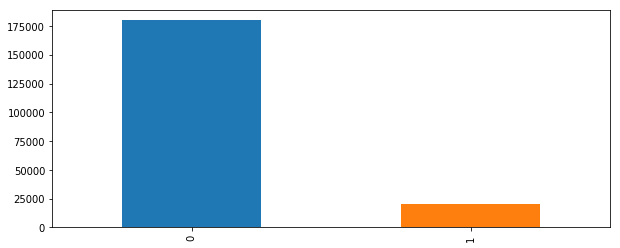

In [5]:
plot.figure(figsize=(10,4))
train_data.target.value_counts().plot(kind='bar')
plot.show()

In [6]:
train_data[[i for i in train_data.columns.tolist() if i not in ['target','id']]].describe(include='all').T

count  unique           top freq        mean       std      min  \
ID_code  200000  200000  train_113370    1         NaN       NaN      NaN   
var_0    200000     NaN           NaN  NaN     10.6799   3.04005   0.4084   
var_1    200000     NaN           NaN  NaN    -1.62762   4.05004 -15.0434   
var_2    200000     NaN           NaN  NaN     10.7152   2.64089   2.1171   
var_3    200000     NaN           NaN  NaN     6.79653   2.04332  -0.0402   
var_4    200000     NaN           NaN  NaN     11.0783   1.62315   5.0748   
var_5    200000     NaN           NaN  NaN    -5.06532   7.86327 -32.5626   
var_6    200000     NaN           NaN  NaN     5.40895  0.866607   2.3473   
var_7    200000     NaN           NaN  NaN     16.5458   3.41808   5.3497   
var_8    200000     NaN           NaN  NaN    0.284162   3.33263 -10.5055   
var_9    200000     NaN           NaN  NaN     7.56724   1.23507   3.9705   
var_10   200000     NaN           NaN  NaN     0.39434   5.50079 -20.7313   
var_11   200000     NaN           NaN  NaN     -3.2456   5.97025  -26.095   
var_12   200000     NaN           NaN  NaN      14.024  0.190059  13.4346   
var_13   200000     NaN           NaN  NaN     8.53023   4.63954  -6.0111   
var_14   200000     NaN           NaN  NaN     7.53761   2.24791   1.0133   
var_15   200000     NaN           NaN  NaN     14.5731  0.411711  13.0769   
var_16   200000     NaN           NaN  NaN     9.33326   2.55742   0.6351   
var_17   200000     NaN           NaN  NaN    -5.69673   6.71261 -33.3802   
var_18   200000     NaN           NaN  NaN      15.244   7.85137 -10.6642   
var_19   200000     NaN           NaN  NaN     12.4386   7.99669 -12.4025   
var_20   200000     NaN           NaN  NaN     13.2909   5.87625  -5.4322   
var_21   200000     NaN           NaN  NaN     17.2579   8.19656  -10.089   
var_22   200000     NaN           NaN  NaN     4.30543   2.84796  -5.3225   
var_23   200000     NaN           NaN  NaN     3.01954  0.526893   1.2098   
var_24   200000     NaN           NaN  NaN     10.5844   3.77725  -0.6784   
var_25   200000     NaN           NaN  NaN     13.6675  0.285535    12.72   
var_26   200000     NaN           NaN  NaN    -4.05513   5.92221 -24.2431   
var_27   200000     NaN           NaN  NaN    -1.13791   1.52371  -6.1668   
var_28   200000     NaN           NaN  NaN     5.53298  0.783367   2.0896   
...         ...     ...           ...  ...         ...       ...      ...   
var_170  200000     NaN           NaN  NaN -0.00496206   4.42462  -14.506   
var_171  200000     NaN           NaN  NaN   -0.831777   5.37801 -22.4793   
var_172  200000     NaN           NaN  NaN     19.8171   8.67417 -11.4533   
var_173  200000     NaN           NaN  NaN   -0.677967   5.96667 -22.7487   
var_174  200000     NaN           NaN  NaN     20.2107   7.13643  -2.9953   
var_175  200000     NaN           NaN  NaN     11.6406   2.89217   3.2415   
var_176  200000     NaN           NaN  NaN    -2.79958   7.51394 -29.1165   
var_177  200000     NaN           NaN  NaN     11.8829   2.62889   4.9521   
var_178  200000     NaN           NaN  NaN    -1.01406   8.57981 -29.2734   
var_179  200000     NaN           NaN  NaN     2.59144   2.79896  -7.8561   
var_180  200000     NaN           NaN  NaN    -2.74167   5.26124 -22.0374   
var_181  200000     NaN           NaN  NaN     10.0855   1.37186   5.4165   
var_182  200000     NaN           NaN  NaN    0.719109   8.96343 -26.0011   
var_183  200000     NaN           NaN  NaN     8.76909   4.47492  -4.8082   
var_184  200000     NaN           NaN  NaN     12.7567   9.31828 -18.4897   
var_185  200000     NaN           NaN  NaN    -3.98326   4.72517 -22.5833   
var_186  200000     NaN           NaN  NaN     8.97027   3.18976  -3.0223   
var_187  200000     NaN           NaN  NaN     -10.335   11.5747 -47.7536   
var_188  200000     NaN           NaN  NaN     15.3772    3.9446   4.4123   
var_189  200000     NaN           NaN  NaN    0.746072  0.976348  -2.5543   
var_19

In [8]:
data_type = train_data.dtypes.to_frame().reset_index()
data_type.columns  = ['col_name','col_type']
data_type[data_type.col_type==np.object].head()

col_name col_type
0  ID_code   object

In [9]:
train_data.isnull().any().sum()

0

In [15]:
col_names = [i for i in train_data.columns if i not in ['target','ID_code']]

In [11]:
def draw_relevant_plots(table, columns):
    
    
    fig, axes = plot.subplots(1, 5, figsize=(10, 7), sharex=True)
    count = 0
    for col in columns:
        
        ax = axes[count]
        sns.distplot(table[col], ax = axes[count])
        
        count+= 1
    plot.show()  
    
#     plot.figure(figsize = (10,4))
#     data = table[columns]
#     data = panda.concat([data,table['target']], axis = 1)
#     correlation_map = np.corrcoef(data.values.T)
#     sns.heatmap(correlation_map,
#                 cbar = True,
#                 annot=True,
#                 square = True,
#                 fmt = '.2f',
#                 annot_kws = {'size':15},
#                 yticklabels = data.columns.tolist(),
#                 xticklabels = data.columns.tolist(),
#                )
#     plot.show()
        

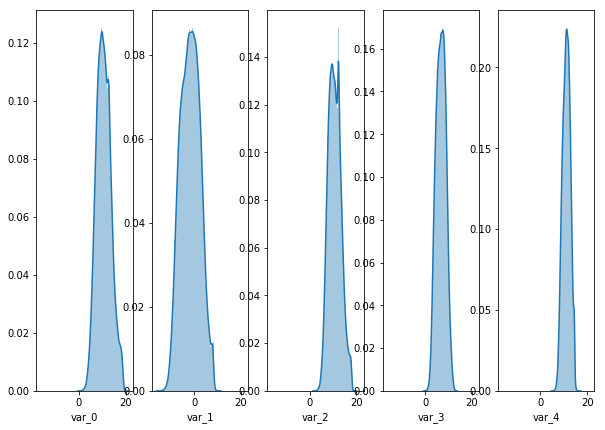

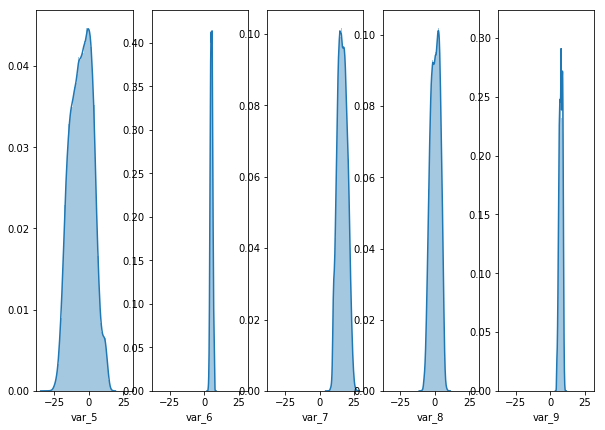

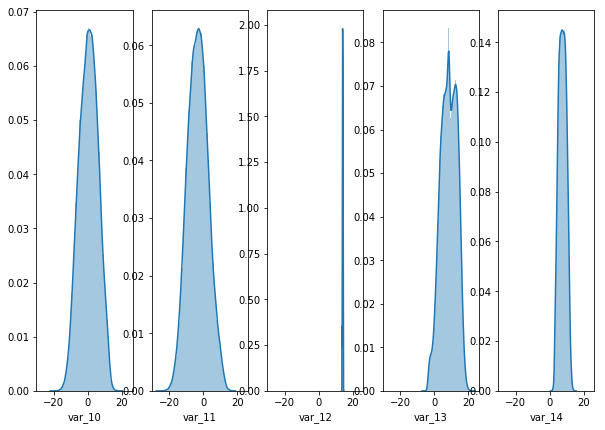

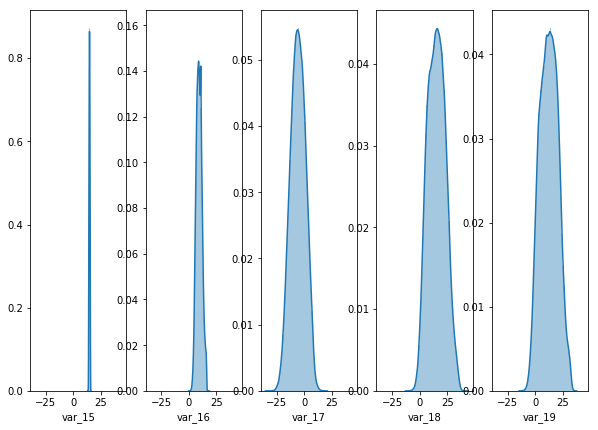

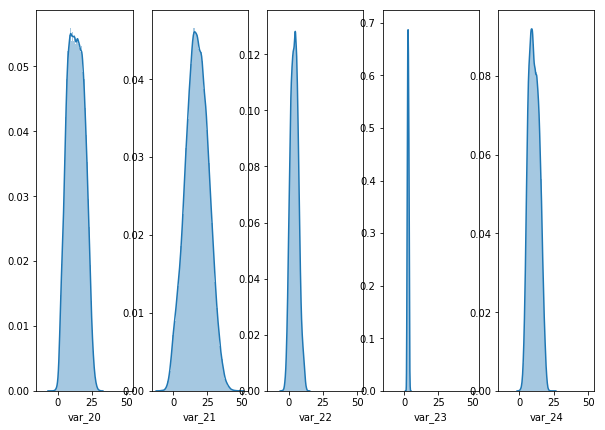

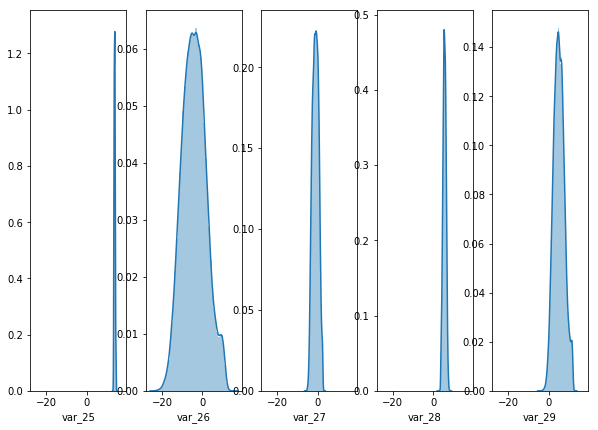

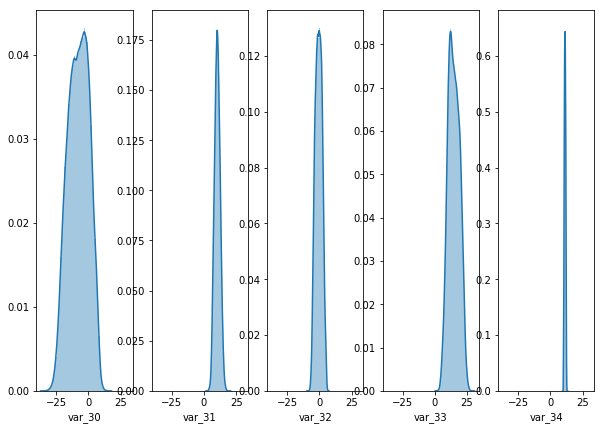

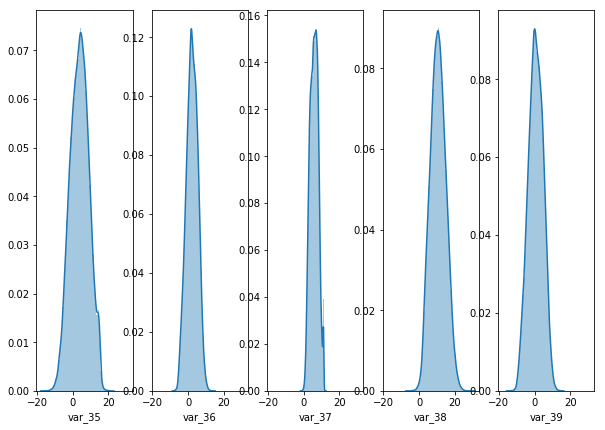

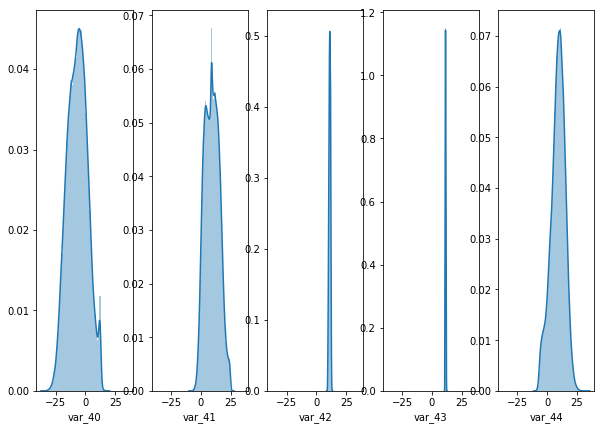

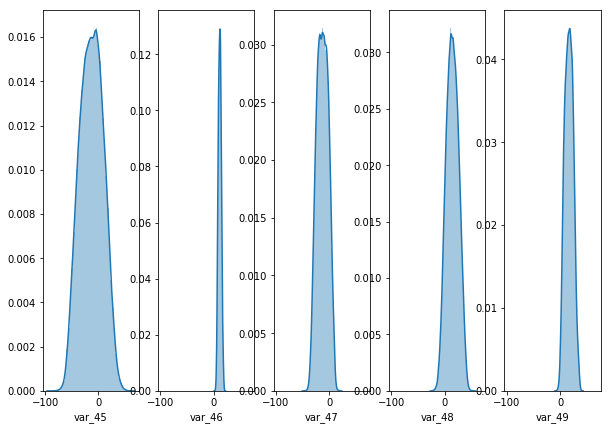

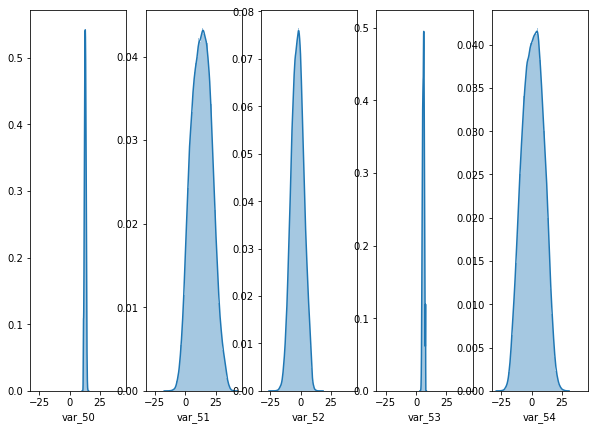

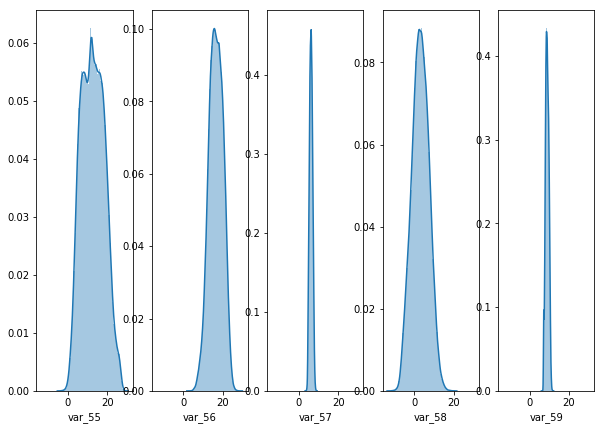

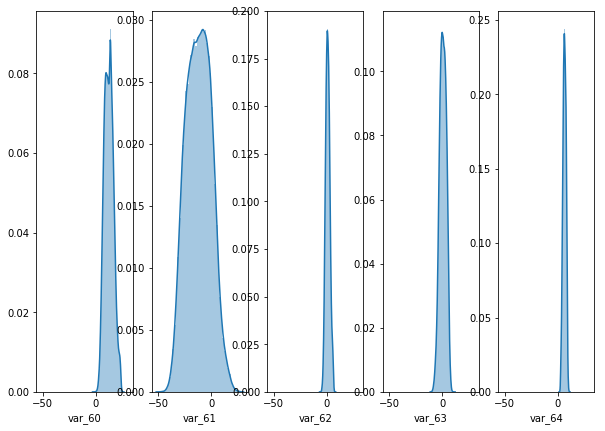

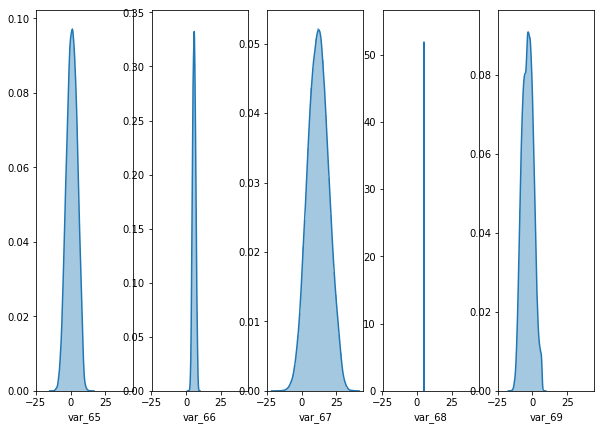

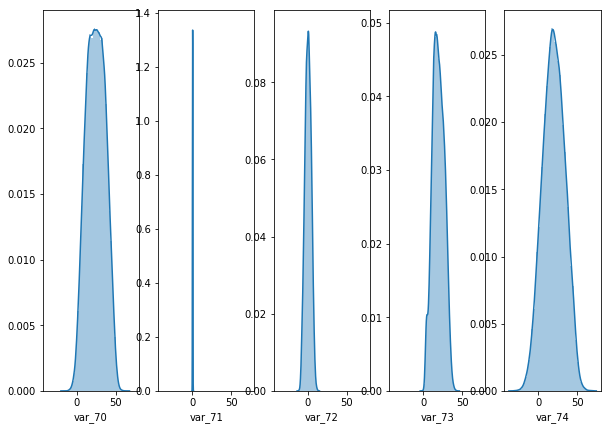

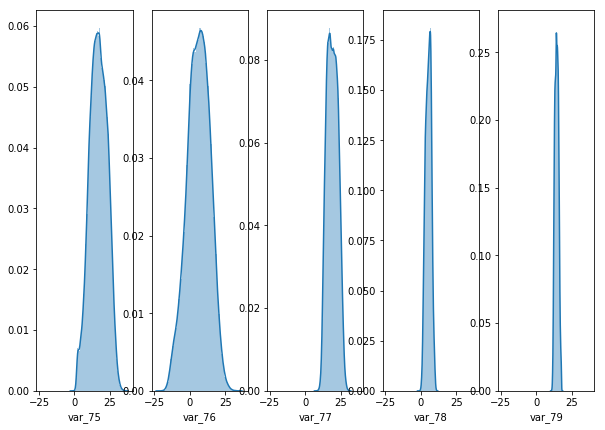

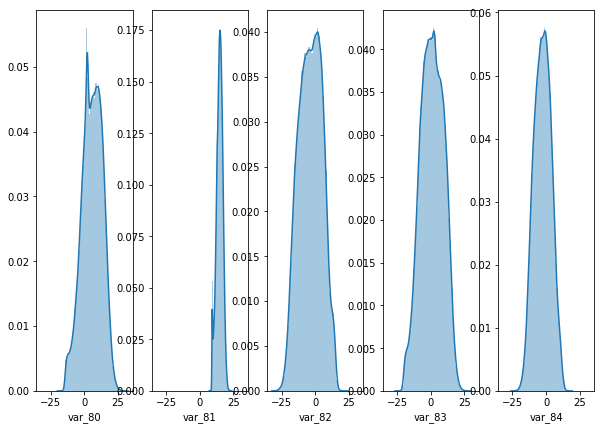

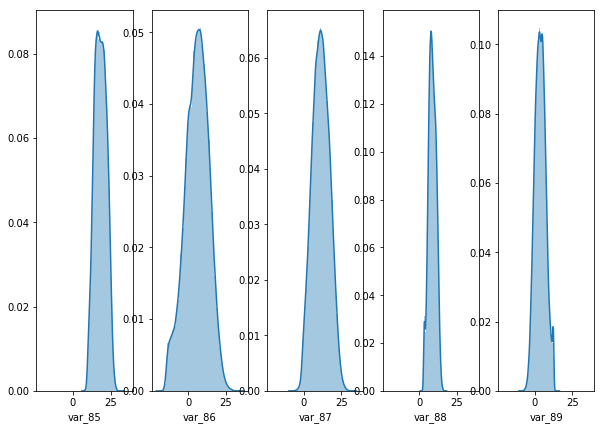

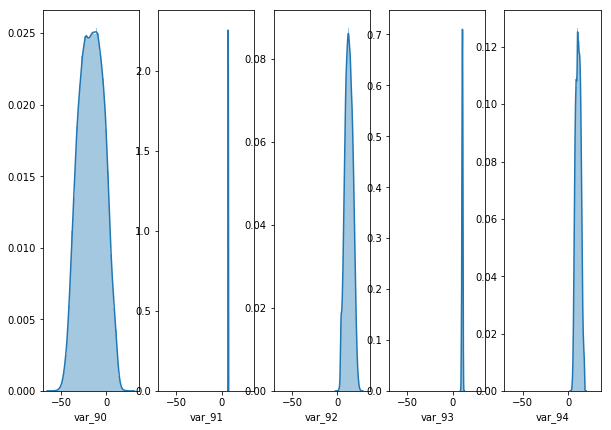

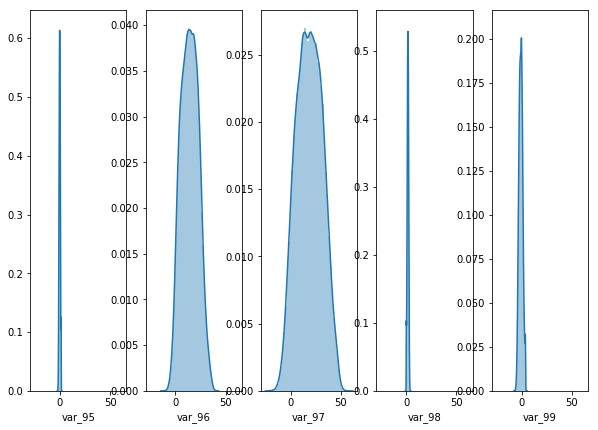

In [16]:
col_chunks = [col_names[i:i+5] for i in range(0,len(col_names)-100,5)]

for item in col_chunks:
    draw_relevant_plots(train_data, item)

In [18]:
train_data[col_names].var()

var_0        9.241909
var_1       16.402858
var_2        6.974322
var_3        4.175153
var_4        2.634614
var_5       61.830963
var_6        0.751008
var_7       11.683241
var_8       11.106446
var_9        1.525398
var_10      30.258724
var_11      35.643922
var_12       0.036123
var_13      21.525290
var_14       5.053091
var_15       0.169506
var_16       6.540402
var_17      45.059166
var_18      61.644015
var_19      63.947112
var_20      34.530360
var_21      67.183656
var_22       8.110864
var_23       0.277617
var_24      14.267582
var_25       0.081530
var_26      35.072569
var_27       2.321705
var_28       0.613664
var_29       6.843150
              ...    
var_170     19.577270
var_171     28.922975
var_172     75.241236
var_173     35.601200
var_174     50.928585
var_175      8.364631
var_176     56.459280
var_177      6.911087
var_178     73.613144
var_179      7.834157
var_180     27.680674
var_181      1.882006
var_182     80.343150
var_183     20.024944
var_184   

In [19]:
from scipy import stats
def calculateCorrelationCoefficientsAndpValues(x_data, y_data, xlabel):
    
    pearson_coef, p_value = stats.pearsonr(x_data, y_data)
    print("The Pearson Correlation Coefficient for %s is %s with a P-value of P = %s" %(xlabel,pearson_coef, p_value))
    
    return (pearson_coef,p_value)

In [22]:
pearson_coeff = []
p_value = []
col_name = []

for col in col_names:
    
    x,y = calculateCorrelationCoefficientsAndpValues(train_data[col], train_data['target'], col)
    pearson_coeff.append(x)
    p_value.append(y)
    col_name.append(col)
    
pearson_table = panda.DataFrame({'column_name':col_name , 'pearson_coeff':pearson_coeff, 'p_value': p_value})
pearson_table.sort_values(by=['p_value'], ascending=True).head(25)

The Pearson Correlation Coefficient for var_0 is 0.05238959177142545 with a P-value of P = 1.4765021255959596e-121
The Pearson Correlation Coefficient for var_1 is 0.050342628834275024 with a P-value of P = 2.2044174088536296e-112
The Pearson Correlation Coefficient for var_2 is 0.055870347841898794 with a P-value of P = 5.34625599023323e-138
The Pearson Correlation Coefficient for var_3 is 0.011055223745083545 with a P-value of P = 7.647031506576318e-07
The Pearson Correlation Coefficient for var_4 is 0.010914638494705328 with a P-value of P = 1.053943322625881e-06
The Pearson Correlation Coefficient for var_5 is 0.030978627406269024 with a P-value of P = 1.149124099821388e-43
The Pearson Correlation Coefficient for var_6 is 0.06673084561274083 with a P-value of P = 4.028115612203267e-196
The Pearson Correlation Coefficient for var_7 is -0.0030248095569074557 with a P-value of P = 0.17614171184519622
The Pearson Correlation Coefficient for var_8 is 0.0195842709080987 with a P-value of

The Pearson Correlation Coefficient for var_83 is -0.020527989923034156 with a P-value of P = 4.258936305437667e-20
The Pearson Correlation Coefficient for var_84 is 0.012362675256975196 with a P-value of P = 3.2218405885957464e-08
The Pearson Correlation Coefficient for var_85 is -0.02451271941622825 with a P-value of P = 5.692627114571275e-28
The Pearson Correlation Coefficient for var_86 is -0.03912624004375641 with a P-value of P = 1.3266522465335551e-68
The Pearson Correlation Coefficient for var_87 is -0.035860197236998535 with a P-value of P = 6.478895165821362e-58
The Pearson Correlation Coefficient for var_88 is -0.020677398793940233 with a P-value of P = 2.2842294274441342e-20
The Pearson Correlation Coefficient for var_89 is 0.03936861796249661 with a P-value of P = 1.9613821979615523e-69
The Pearson Correlation Coefficient for var_90 is 0.02939546171573839 with a P-value of P = 1.7287570600246648e-39
The Pearson Correlation Coefficient for var_91 is 0.04012717220493177 with

The Pearson Correlation Coefficient for var_154 is -0.04610603991724704 with a P-value of P = 1.4737704359391744e-94
The Pearson Correlation Coefficient for var_155 is 0.03723950571511123 with a P-value of P = 2.57366364573044e-62
The Pearson Correlation Coefficient for var_156 is -0.020997282005594888 with a P-value of P = 5.9294297920811504e-21
The Pearson Correlation Coefficient for var_157 is 0.032642479888505445 with a P-value of P = 2.7288385182151453e-48
The Pearson Correlation Coefficient for var_158 is -0.0038165673371201385 with a P-value of P = 0.08785619266571075
The Pearson Correlation Coefficient for var_159 is 0.015278173956857105 with a P-value of P = 8.317831480562964e-12
The Pearson Correlation Coefficient for var_160 is -0.005135072067810889 with a P-value of P = 0.021648746781639448
The Pearson Correlation Coefficient for var_161 is 0.004167812286671537 with a P-value of P = 0.062335922491054435
The Pearson Correlation Coefficient for var_162 is 0.03264700367254838 

column_name  pearson_coeff        p_value
81       var_81      -0.080917  1.126150e-287
139     var_139      -0.074080  2.486493e-241
12       var_12      -0.069489  1.558868e-212
6         var_6       0.066731  4.028116e-196
110     var_110       0.064275  4.490800e-182
146     var_146      -0.063644  1.509306e-178
53       var_53       0.063399  3.460925e-177
26       var_26       0.062422  7.989553e-172
76       var_76      -0.061917  4.386462e-169
174     var_174      -0.061669  9.597976e-168
22       var_22       0.060558  8.085207e-162
21       var_21      -0.058483  4.919570e-151
99       var_99       0.058367  1.914466e-150
166     var_166      -0.057773  1.961445e-147
80       var_80      -0.057609  1.306437e-146
190     var_190       0.055973  1.679043e-138
2         var_2       0.055870  5.346256e-138
165     var_165      -0.055734  2.472094e-137
13       var_13      -0.055156  1.539395e-134
148     var_148      -0.055011  7.677968e-134
133     var_133       0.054548  1.261092e-131
198     var_198      -0.053000  2.313569e-124
34       var_34      -0.052692  6.058501e-123
0         var_0       0.052390  1.476502e-121
1         var_1       0.050343  2.204417e-112

In [24]:
pearson_table[(pearson_table.pearson_coeff>0.2) | (pearson_table.pearson_coeff<-0.2)].sort_values(by=['pearson_coeff'], ascending=False)

Empty DataFrame
Columns: [column_name, pearson_coeff, p_value]
Index: []

In [16]:
reqd_columns = pearson_table[(pearson_table.pearson_coeff>0.1) | (pearson_table.pearson_coeff<-0.1)].sort_values(by=['pearson_coeff'], ascending=False).column_name.values.tolist()
reqd_columns[:5], len(reqd_columns)

(['33', '65', '24', '183', '199'], 50)

There are a couple of observations that we can make out of the above diagrams:


1. Almost none have any significant outliers
2. Pearsons correlation coeff for each indedepent variable with target variable is pretty low
3. There are no categorical data

#### Based on above data analysis, we are going to attempt 3 things

1. create a baseline model out of gridsearch for the data using the usual suspects of classifiers. 


2. Plot learning curve and auc/roc scores for each


3. try dimensionality reduction techniques such as PCA,LDA and t-SNE and run on baseline models created in step 1.


4. try SMOTE and run on the same model created in point 1 and compare scores



### STEP 1: Run handful of usual suspect classifiers using selected 50 features giving highest coeff scores

<br><br>

In [25]:
class CodeTimer:
    
    """
        Utility custom contextual class for calculating the time 
        taken for a certain code block to execute
    
    """
    def __init__(self, name=None):
        self.name = " '"  + name + "'" if name else ''

    def __enter__(self):
        self.start = time.clock()

    def __exit__(self, exc_type, exc_value, traceback):
        self.took = (time.clock() - self.start) * 1000.0
        time_taken = datetime.timedelta(milliseconds = self.took)
        print('Code block' + self.name + ' took(HH:MM:SS): ' + str(time_taken))
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plot.ylabel('True label')
    plot.xlabel('Predicted label')
#     plot.tight_layout()
    plot.show()

In [26]:

def plotLearningCurve(_x_train, _y_train, learning_model_pipeline,  model_name, k_fold = 10, training_sample_sizes = linspace(0.1,1.0,10), jobsInParallel = 1):
    
    training_size, training_score, testing_score = learning_curve(estimator = learning_model_pipeline, \
                                                                X = _x_train, \
                                                                y = _y_train, \
                                                                train_sizes = training_sample_sizes, \
                                                                cv = k_fold, \
                                                                n_jobs = jobsInParallel) 


    training_mean = mean(training_score, axis = 1)
    training_std_deviation = std(training_score, axis = 1)
    testing_std_deviation = std(testing_score, axis = 1)
    testing_mean = mean(testing_score, axis = 1 )

    ## we have got the estimator in this case the perceptron running in 10 fold validation with 
    ## equal division of sizes betwwen .1 and 1. After execution, we get the number of training sizes used, 
    ## the training scores for those sizes and the test scores for those sizes. we will plot a scatter plot 
    ## to see the accuracy results and check for bias vs variance

    # training_size : essentially 10 sets of say a1, a2, a3,,...a10 sizes (this comes from train_size parameter, here we have given linespace for equal distribution betwwen 0.1 and 1 for 10 such values)
    # training_score : training score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    # testing_score : testing score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    ## the mean and std deviation for each are calculated simply to show ranges in the graph

    plot.plot(training_size, training_mean, label= "Training Data", marker= '+', color = 'blue', markersize = 8)
    plot.fill_between(training_size, training_mean+ training_std_deviation, training_mean-training_std_deviation, color='blue', alpha =0.12 )

    plot.plot(training_size, testing_mean, label= "Testing/Validation Data", marker= '*', color = 'green', markersize = 8)
    plot.fill_between(training_size, testing_mean+ training_std_deviation, testing_mean-training_std_deviation, color='green', alpha =0.14 )

    plot.title("Scoring of our training and testing data vs sample sizes for model:"+model_name)
    plot.xlabel("Number of Samples")
    plot.ylabel("Accuracy")
    plot.legend(loc= 'best')
    plot.show()
    
def plot_roc_auc_curve(false_positive_rate, true_positive_rate, model_name):
        
    plot.figure(figsize=(10,3))
    plot.plot(list(false_positive_rate), list(true_positive_rate),  label = "ROC Curve for model: "+model_name)     
    plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
    plot.plot([0, 0, 1], [0,1, 1], ':', label = 'Perfect Score')
    auc_score = auc(false_positive_rate, true_positive_rate)
    plot.title('ROC Curve for model: %s with AUC %.2f'%(model_name, auc_score))
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.legend(loc='best')
    plot.show()
    
    
def plot_precision_recall_curve(precision, recall, model_name):
    
    plot.figure(figsize=(10,3))
    plot.plot(list(recall), list(precision),  label = "Precision/Recall Curve for model: "+model_name)     
#     plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing') #
    plot.title('Precision Recall Curve for model: %s'%model_name)
    plot.xlabel('Recall')
    plot.ylabel('Precision')
    plot.legend(loc='best')
    plot.show()


    


In [27]:
def runGridSearchAndPredict(pipeline,model_name, x_train, y_train, x_test, y_test, param_grid, n_jobs = 1, cv = 10, score = 'accuracy'):
#     pass

    response =  {}
    training_timer       = CodeTimer('training')
    testing_timer        = CodeTimer('testing')
    learning_curve_timer = CodeTimer('learning_curve')
    predict_proba_timer  = CodeTimer('predict_proba')
    
    with training_timer:
        
        gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, n_jobs = n_jobs, scoring = score)

        search = gridsearch.fit(x_train,y_train)

        print("Grid Search Best parameters ", search.best_params_)
        print("Grid Search Best score ", search.best_score_)

    with testing_timer:
        y_prediction = gridsearch.predict(x_test)
            
    print("F1 score %s" %f1_score(y_test,y_prediction, average ='weighted'))
    print("Classification report  \n %s" %(classification_report(y_test, y_prediction)))
    
    with learning_curve_timer:
        plotLearningCurve(x_train, y_train, search.best_estimator_, model_name)
#         _matrix = confusion_matrix(y_true = _y_test ,y_pred = y_prediction, labels = list(range(_y_test.shape[1])))
        _matrix = confusion_matrix(y_true = y_test ,y_pred = y_prediction, labels = list(set(y_test)))
        classes = list(set(y_test))
        plot_confusion_matrix(_matrix, classes, title = "Confusion matrix for model:"+model_name)
        
    with predict_proba_timer:

        if hasattr(gridsearch.best_estimator_, 'predict_proba'):
            
            print('inside decision function')
            y_probability = gridsearch.predict_proba(x_test)
            number_of_classes = len(np.unique(y_train))
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probability[:, 1])
            response['roc_auc_score'] = roc_auc_score(y_test, y_probability[:,1])
            response['roc_curve'] = (false_positive_rate, true_positive_rate)  
            response['roc_curve_false_positive_rate'] = false_positive_rate
            response['roc_curve_true_positive_rate'] = true_positive_rate
            precision, recall, _ = precision_recall_curve(y_test, y_probability[:,1])
            plot_roc_auc_curve(false_positive_rate, true_positive_rate, model_name)
            plot_precision_recall_curve(precision, recall, model_name)
            
        else: ## eg SVM, Perceptron doesnt have predict_proba method
            
            response['roc_auc_score'] = 0
            response['roc_curve'] = 0
            response['roc_curve_false_positive_rate'] = 0
            response['roc_curve_true_positive_rate'] = 0
    
    response['learning_curve_time'] = learning_curve_timer.took
    response['testing_time'] = testing_timer.took
    response['_y_prediction'] = y_prediction
#     response['accuracy_score'] = accuracy_score(y_test,y_prediction)
    response['training_time'] = training_timer.took
    response['f1_score']  = f1_score(y_test, y_prediction, average ='weighted')
    response['f1_score_micro']  = f1_score(y_test, y_prediction, average ='micro')
    response['f1_score_macro']  = f1_score(y_test, y_prediction, average ='macro')
    response['best_estimator'] = search.best_estimator_
    response['confusion_matrix'] = _matrix
    
    return response


def plotROCCurveAcrossModels(positive_rates_sequence, model_name):
    
    plot.figure(figsize=(10,5))
    for plot_values, label_name in zip(positive_rates_sequence, model_name):
        
        plot.plot(list(plot_values[0]), list(plot_values[1]),  label = "ROC Curve for model: "+label_name)
        
    plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing') #
    plot.title('ROC Curve across models')
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.legend(loc='best')
    plot.show()

In [28]:

def execute( _x_train,
             _y_train,
             _x_test,
             _y_test, 
            classifiers, 
            classifier_names, 
            classifier_param_grid,
            cv  = 10 , 
            score = 'accuracy',
            scaler = StandardScaler()
           ):
    
    '''
    This method will run your data sets against the model specified 
    Models will be fed through a pipeline where the first step would be to
    execute a scaling operation.
    
    Method will also call additional lower level methods in order to plot
    precision curve, roc curve, learning curve and will also prepare a confusion matrix
    
    :returns: dict containing execution metrics such as time taken, accuracy scores
    :returntype: dict
    
    '''

    timer = CodeTimer(name='overalltime')
    model_metrics = {}

    with timer:
        for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):

            pipeline_steps = [('scaler', scaler),(model_name, model)] if scaler is not None else [(model_name, model)]
            pipeline = Pipeline(pipeline_steps)

            result = runGridSearchAndPredict(pipeline, 
                                             model_name,
                                             _x_train,
                                             _y_train,
                                             _x_test,
                                             _y_test, 
                                             model_param_grid ,
                                             cv = cv,
                                             score = score)

            _y_prediction = result['_y_prediction']

            model_metrics[model_name] = {}
            model_metrics[model_name]['confusion_matrix'] = result.get('confusion_matrix')
            model_metrics[model_name]['training_time'] = result.get('training_time')
            model_metrics[model_name]['testing_time'] = result.get('testing_time')
            model_metrics[model_name]['learning_curve_time'] = result.get('learning_curve_time')
            model_metrics[model_name]['f1_score'] = result.get('f1_score')
            model_metrics[model_name]['f1_score_macro'] = result.get('f1_score_macro')
            model_metrics[model_name]['f1_score_micro'] = result.get('f1_score_micro')
            model_metrics[model_name]['roc_auc_score'] = result.get('roc_auc_score')
            model_metrics[model_name]['roc_curve_true_positive_rate'] = result.get('roc_curve_true_positive_rate')
            model_metrics[model_name]['roc_curve_false_positive_rate'] = result.get('roc_curve_false_positive_rate')

            model_metrics[model_name]['best_estimator'] = result.get('best_estimator')


    print(timer.took)
    
    return model_metrics


In [29]:

classifiers = [
    Perceptron(random_state = 1),
    LogisticRegression(random_state = 1),
    LogisticRegression(random_state = 1, solver='liblinear'),
    LogisticRegression(random_state = 1, solver='newton-cg'),
    LogisticRegression(random_state = 1, solver='sag'),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state = 1),
    KNeighborsClassifier(metric = 'minkowski'),
    RidgeClassifier(random_state = 123), 
    SVC(kernel="linear"),
    SVC(),
    ExtraTreeClassifier(random_state = 123),
    GaussianProcessClassifier(random_state = 123),
    BernoulliNB(),
    BaggingClassifier(base_estimator = LogisticRegression(random_state = 1)),
    BaggingClassifier(base_estimator = BernoulliNB()),
    GradientBoostingClassifier(random_state= 123),
    LGBMClassifier(objective = 'binary'),
    XGBClassifier(objective = 'binary:logistic')
]


classifier_names = [
            'perceptron',
            'logisticregression',
            'logisticregression_liblinear_l2',
            'logisticregression_newton_cg',
            'logisticregression_sag',
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'ridge',
            'linear_svc',
            'gamma_svc',
            'extra_trees',
            'gaussian_process',
            'bernoulli',
            'bagging_logistic',
            'bagging_bernoulli',
            'gradient_boosting_classifier',
            'lgbm_classifier',
            'xgb'
]

classifier_param_grid = [
            
            {'perceptron__max_iter': [5,10,30], 'perceptron__eta0': [.1]},
            {
             'logisticregression__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression__penalty':['l1','l2'],
             'logisticregression__solver':['saga','liblinear']
            },
            {
             'logisticregression_liblinear_l2__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression_liblinear_l2__penalty':['l2'],
             'logisticregression_liblinear_l2__dual':[True]
            },
            {
             'logisticregression_newton_cg__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression_newton_cg__penalty':['l2'],
            },
            {
             'logisticregression_sag__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression_sag__penalty':['l2'],
            },
    
            {'decisiontreeclassifier__max_depth':[6,8,10],
             'decisiontreeclassifier__criterion':['gini','entropy'],
             'decisiontreeclassifier__max_features':['auto','sqrt','log2'],
            },
            {'randomforestclassifier__n_estimators':[6,8,12],'randomforestclassifier__criterion': ['gini','entropy']} ,
            {'kneighborsclassifier__n_neighbors':[4,6,10]},
            {'ridge__alpha':[1,1.2,0.9],'ridge__max_iter':[100,300,500]},
            {'linear_svc__C':[0.025]},
            {'gamma_svc__gamma':[2,4],'gamma_svc__C':[1,5]},
            {'extra_trees__max_depth':[6,8,12],'extra_trees__criterion': ['gini','entropy']} ,
            {'gaussian_process__max_iter_predict':[200,400]} ,
            {'bernoulli__alpha':[0.2,0.6,1.2]} ,
            {'bagging_logistic__base_estimator__C':[1.2,0.02,2.2,4], 
             'bagging_logistic__base_estimator__penalty':['l1','l2'],
             'bagging_logistic__n_estimators': [5,8,10]
            },
            {'bagging_bernoulli__base_estimator__alpha':[1.2,0.02,2.2,4], 
             'bagging_bernoulli__n_estimators': [5,8,10]
            },
            {
                'gradient_boosting_classifier__loss':['deviance','exponential'],
                'gradient_boosting_classifier__learning_rate':[0.5,1.2],
                'gradient_boosting_classifier__n_estimators':[100,500,1000],
                'gradient_boosting_classifier__criterion':['friedman_mse','mse','mae'],
                'gradient_boosting_classifier__max_depth':[6,8,16,20],
            },
            {
                 'lgbm_classifier__num_leaves':[25,], \
#                  'lgbm_classifier__min_data_in_leaf':[20],\
                 'lgbm_classifier__max_depth':[20,], \
                 'lgbm_classifier__learning_rate' : [0.01,],\
                 'lgbm_classifier__min_child_samples' :[2,], \
                 'lgbm_classifier__n_estimators' : [5000,], \
                 'lgbm_classifier__num_boost_round' : [100], \
                 'lgbm_classifier__feature_fraction' : [0.9,], \
                 'lgbm_classifier__bagging_freq' : [1,], \
                 'lgbm_classifier__bagging_seed' : [123], \
            },
             {
                'xgb__max_depth':[6,8,10],
                 'xgb__learning_rate':[0.1,0.5,1,2],
                 'xgb__n_estimators':[100,400,1000],             
                 'xgb__booster':['gbtree','dart'],
                 'xgb__subsample':[0.5, 0.2,0.8]
            },
    
]


In [30]:
# x = train_data[[i for i in train_data.columns.tolist() if i not in ['target','id']]]
# x = train_data[reqd_columns[:51]]
x = train_data[col_names]
y = train_data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y , stratify = y, test_size = 0.3, random_state = 123)

In [31]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state =123)
score= 'roc_auc'

Grid Search Best parameters  {'perceptron__eta0': 0.1, 'perceptron__max_iter': 10}
Grid Search Best score  0.7643731734775238
Code block 'training' took(HH:MM:SS): 0:01:11.872964
Code block 'testing' took(HH:MM:SS): 0:00:00.247606
F1 score 0.8659425789665216
Classification report  
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     53971
           1       0.33      0.28      0.30      6029

   micro avg       0.87      0.87      0.87     60000
   macro avg       0.63      0.61      0.62     60000
weighted avg       0.86      0.87      0.87     60000



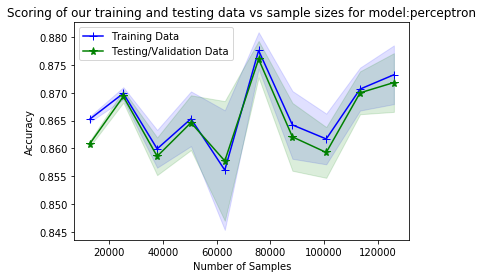

Confusion matrix, without normalization
[[50573  3398]
 [ 4348  1681]]


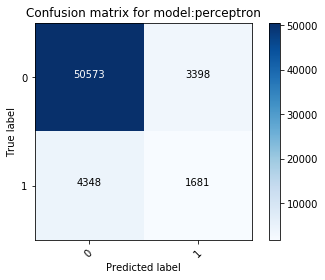

Code block 'learning_curve' took(HH:MM:SS): 0:03:58.613414
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000034
Grid Search Best parameters  {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Grid Search Best score  0.8598650389512131
Code block 'training' took(HH:MM:SS): 0:15:42.810209
Code block 'testing' took(HH:MM:SS): 0:00:00.153894
F1 score 0.8963687225414734
Classification report  
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53971
           1       0.69      0.26      0.38      6029

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.81      0.63      0.67     60000
weighted avg       0.90      0.91      0.90     60000



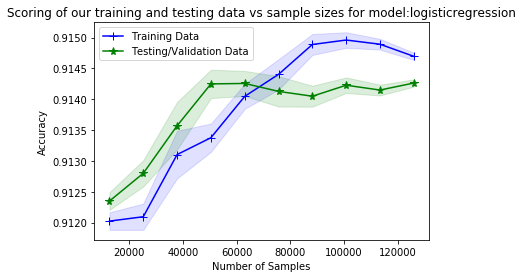

Confusion matrix, without normalization
[[53254   717]
 [ 4437  1592]]


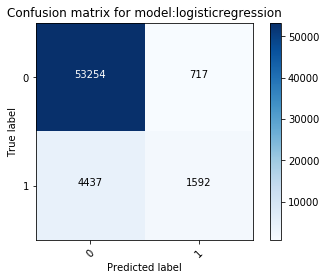

Code block 'learning_curve' took(HH:MM:SS): 0:02:58.714735
inside decision function


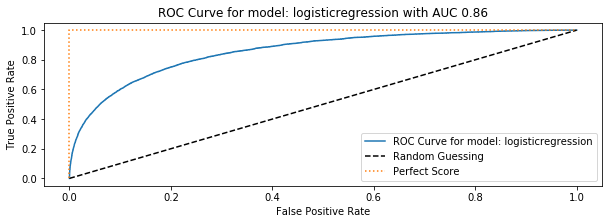

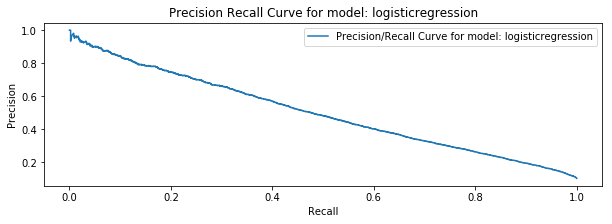

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.478185
Grid Search Best parameters  {'logisticregression_liblinear_l2__C': 0.01, 'logisticregression_liblinear_l2__dual': True, 'logisticregression_liblinear_l2__penalty': 'l2'}
Grid Search Best score  0.8598651123395642
Code block 'training' took(HH:MM:SS): 0:04:07.683044
Code block 'testing' took(HH:MM:SS): 0:00:00.162572
F1 score 0.8963959046905787
Classification report  
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53971
           1       0.69      0.26      0.38      6029

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.81      0.63      0.67     60000
weighted avg       0.90      0.91      0.90     60000



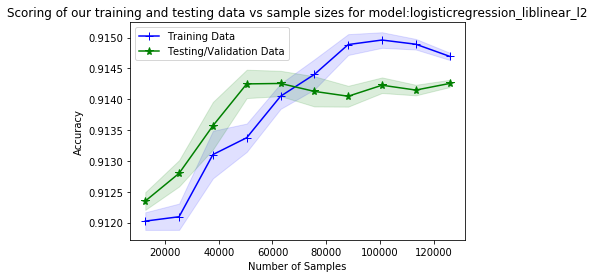

Confusion matrix, without normalization
[[53254   717]
 [ 4436  1593]]


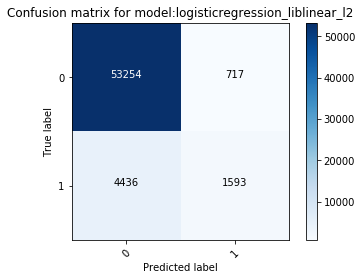

Code block 'learning_curve' took(HH:MM:SS): 0:03:50.876271
inside decision function


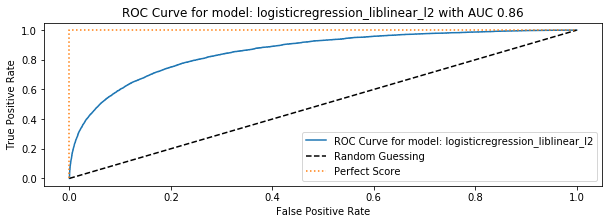

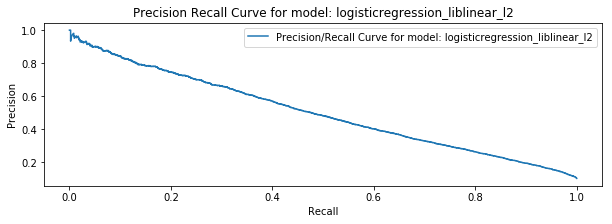

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.487994
Grid Search Best parameters  {'logisticregression_newton_cg__C': 0.01, 'logisticregression_newton_cg__penalty': 'l2'}
Grid Search Best score  0.8598584232793892
Code block 'training' took(HH:MM:SS): 0:03:03.640223
Code block 'testing' took(HH:MM:SS): 0:00:00.146999
F1 score 0.8964848819683513
Classification report  
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53971
           1       0.69      0.27      0.38      6029

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.81      0.63      0.67     60000
weighted avg       0.90      0.91      0.90     60000



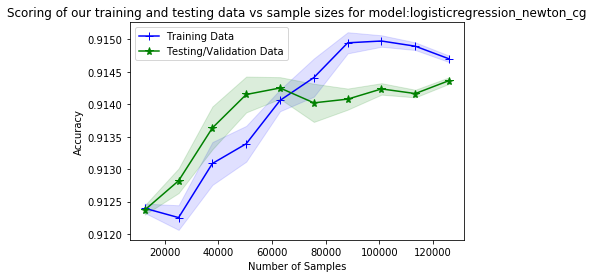

Confusion matrix, without normalization
[[53240   731]
 [ 4426  1603]]


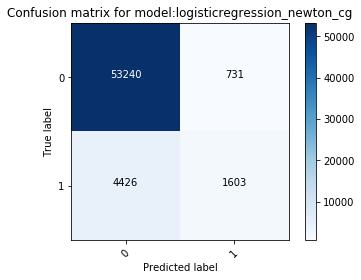

Code block 'learning_curve' took(HH:MM:SS): 0:05:43.153529
inside decision function


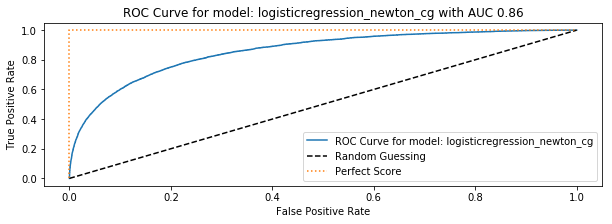

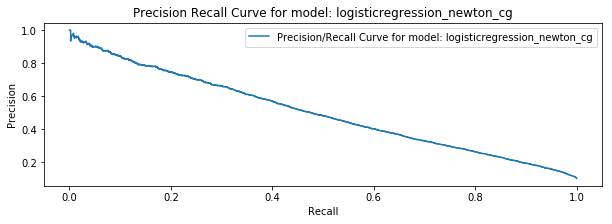

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.470064
Grid Search Best parameters  {'logisticregression_sag__C': 0.01, 'logisticregression_sag__penalty': 'l2'}
Grid Search Best score  0.8598581636431877
Code block 'training' took(HH:MM:SS): 0:05:07.999084
Code block 'testing' took(HH:MM:SS): 0:00:00.124414
F1 score 0.8964848819683513
Classification report  
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53971
           1       0.69      0.27      0.38      6029

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.81      0.63      0.67     60000
weighted avg       0.90      0.91      0.90     60000



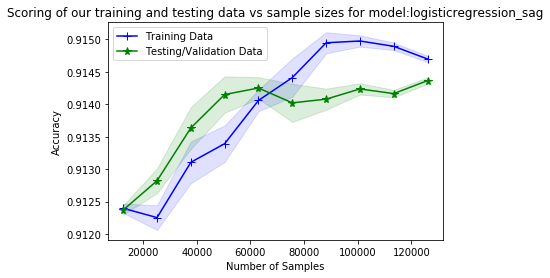

Confusion matrix, without normalization
[[53240   731]
 [ 4426  1603]]


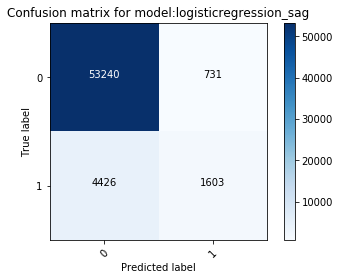

Code block 'learning_curve' took(HH:MM:SS): 0:07:12.247784
inside decision function


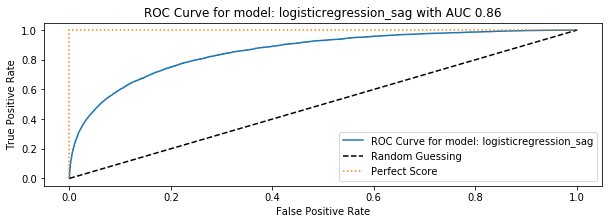

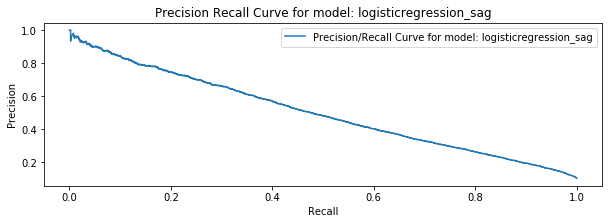

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.691487
Grid Search Best parameters  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': 'auto'}
Grid Search Best score  0.6381621581196796
Code block 'training' took(HH:MM:SS): 0:04:43.845825
Code block 'testing' took(HH:MM:SS): 0:00:00.157885
F1 score 0.8558419384176399
Classification report  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     53971
           1       0.30      0.04      0.06      6029

   micro avg       0.89      0.89      0.89     60000
   macro avg       0.60      0.51      0.50     60000
weighted avg       0.84      0.89      0.86     60000



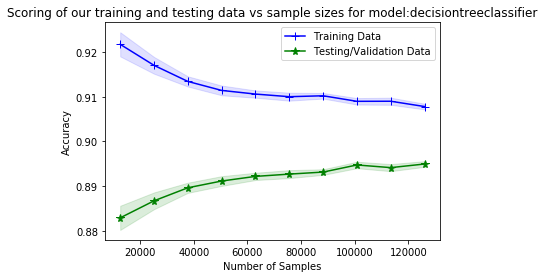

Confusion matrix, without normalization
[[53482   489]
 [ 5815   214]]


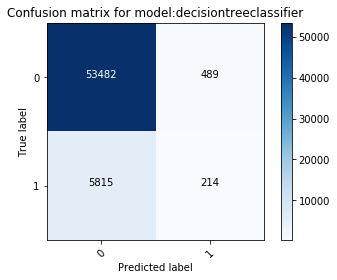

Code block 'learning_curve' took(HH:MM:SS): 0:03:19.779304
inside decision function


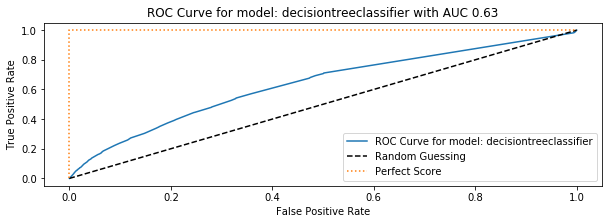

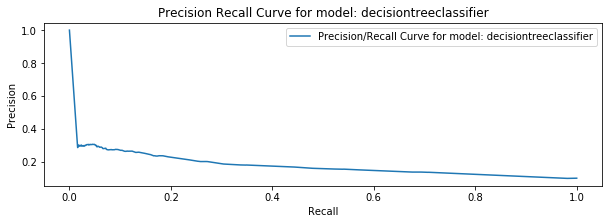

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.375555
Grid Search Best parameters  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 12}
Grid Search Best score  0.7074548614341766
Code block 'training' took(HH:MM:SS): 0:19:48.267858
Code block 'testing' took(HH:MM:SS): 0:00:00.578278
F1 score 0.8546726343051159
Classification report  
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     53971
           1       0.62      0.01      0.03      6029

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.76      0.51      0.49     60000
weighted avg       0.87      0.90      0.85     60000



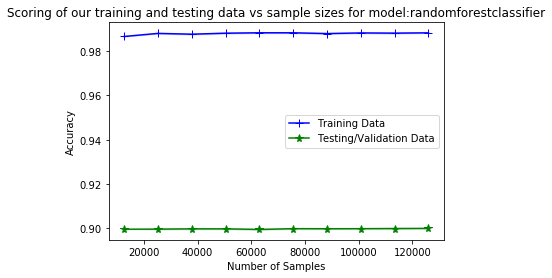

Confusion matrix, without normalization
[[53924    47]
 [ 5951    78]]


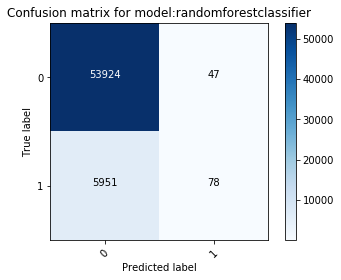

Code block 'learning_curve' took(HH:MM:SS): 0:56:31.302748
inside decision function


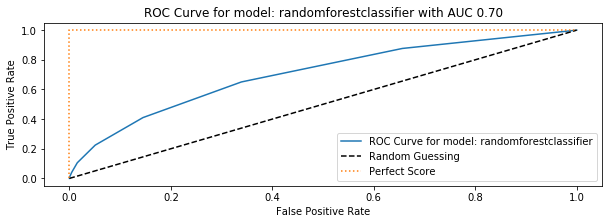

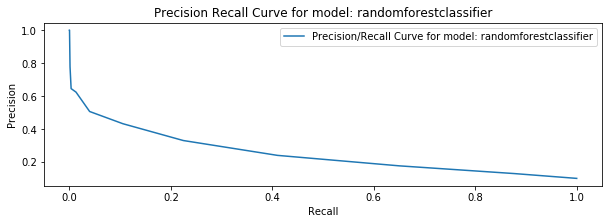

Code block 'predict_proba' took(HH:MM:SS): 0:00:01.002297


In [ ]:
response = execute(
        x_train,
        y_train,
        x_test,
        y_test,
        classifiers,
        classifier_names,
        classifier_param_grid,
        cv=cv,
        score=score,
        scaler=StandardScaler())

In [ ]:
results = panda.DataFrame(response).transpose()
results.head()
results[['f1_score',
         'f1_score_macro',
         'f1_score_micro',
         'learning_curve_time',
         'roc_auc_score',
         'testing_time',
         'training_time',
        ]]\
.sort_values(by=['roc_auc_score',],ascending=False)

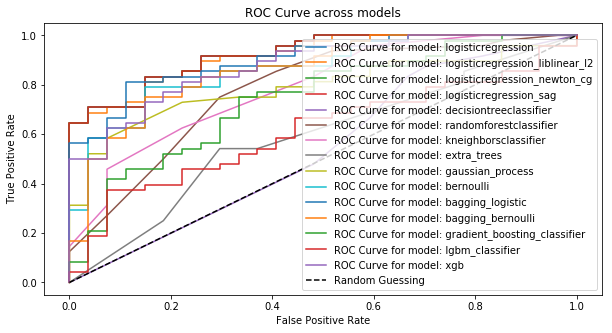

In [217]:

roc_rates = []
model_name = []
for index, key in enumerate(response):
    
    
    estimator = response.get(key)
    if estimator.get('roc_auc_score')!=0:
        roc_curve_true_positive_rate = estimator.get('roc_curve_true_positive_rate')
        roc_curve_false_positive_rate = estimator.get('roc_curve_false_positive_rate')
        roc_rates.append([roc_curve_false_positive_rate,roc_curve_true_positive_rate])
        model_name.append(key)

plotROCCurveAcrossModels(roc_rates,model_name) 



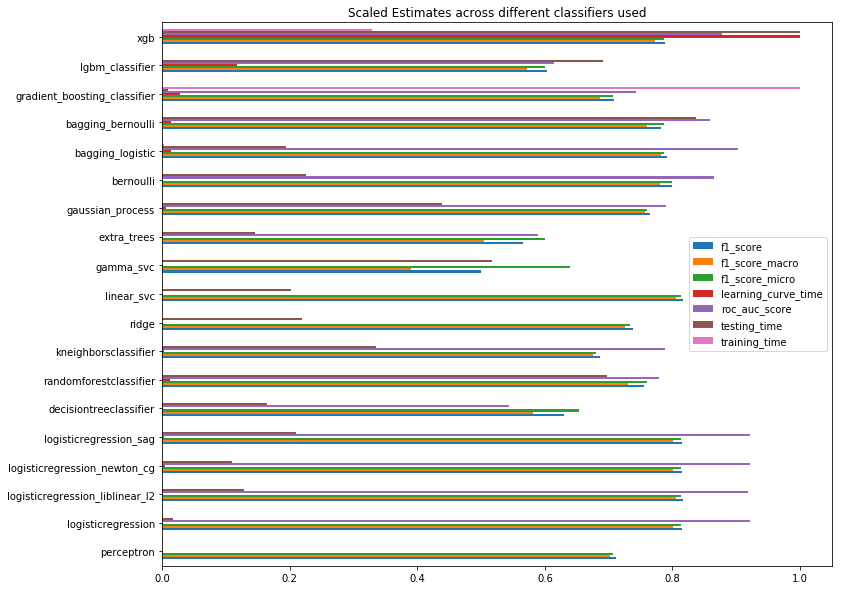

In [218]:
results['learning_curve_time'] = results['learning_curve_time'].astype('float64')
results['testing_time'] = results['testing_time'].astype('float64')
results['training_time'] = results['training_time'].astype('float64')
results['f1_score'] = results['f1_score'].astype('float64')
results['f1_score_micro'] = results['f1_score_micro'].astype('float64')
results['f1_score_macro'] = results['f1_score_macro'].astype('float64')
results['roc_auc_score'] = results['roc_auc_score'].astype('float64')
# results['roc_auc_macro'] = results['roc_auc_macro'].astype('float64')

#scaling time parameters between 0 and 1
results['learning_curve_time'] = (results['learning_curve_time']- results['learning_curve_time'].min())/(results['learning_curve_time'].max()- results['learning_curve_time'].min())
results['testing_time'] = (results['testing_time']- results['testing_time'].min())/(results['testing_time'].max()- results['testing_time'].min())
results['training_time'] = (results['training_time']- results['training_time'].min())/(results['training_time'].max()- results['training_time'].min())

results.plot(kind='barh',figsize=(12, 10))
plot.title("Scaled Estimates across different classifiers used")
plot.show()

### Conclusion:

1. We got highest scores of ROC/AUC 0.92 in logistic regression with l2 parameter

2. From the learning curve, we also see that overfitting tendency is less


In [ ]:
test_data = panda.read_csv('data/test.csv')

test_data_x = test_data[reqd_columns]


### STEP 2: Run Dimensionality technique, specifically t-SNE

<br><br>

In [220]:

## perplexity parameters were tuned
tsne = TSNE(perplexity=35, learning_rate=15)
scaler = StandardScaler()
x_train_tsne = tsne.fit_transform(scaler.fit_transform(x_train))
x_test_tsne = tsne.fit_transform(scaler.fit_transform(x_test))

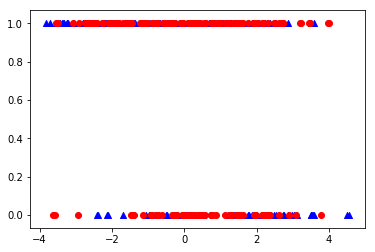

In [221]:
# plot.scatter(x_train_tsne[:,0]x_train_tsne[:,0], x_train_tsne[:,1])
plot.scatter(x_train_tsne[:,0], y_train,  marker='^', c='blue')
plot.scatter(x_train_tsne[:,1], y_train,  marker='o', c='red')
plot.show()
# x_train_tsne[:,1].shape, y_train.shape

Grid Search Best parameters  {'perceptron__eta0': 0.1, 'perceptron__max_iter': 30}
Grid Search Best score  0.7025287755722539
Code block 'training' took(HH:MM:SS): 0:00:00.093815
Code block 'testing' took(HH:MM:SS): 0:00:00.000167
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



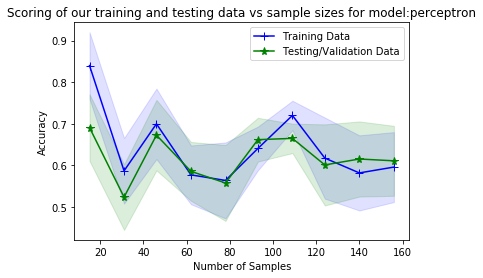

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


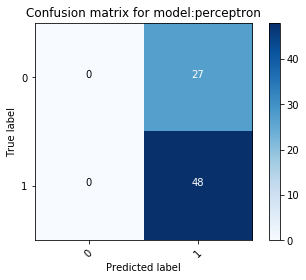

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.875237
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000029
Grid Search Best parameters  {'logisticregression__C': 1.2, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Grid Search Best score  0.7605662453488542
Code block 'training' took(HH:MM:SS): 0:00:00.801185
Code block 'testing' took(HH:MM:SS): 0:00:00.000251
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



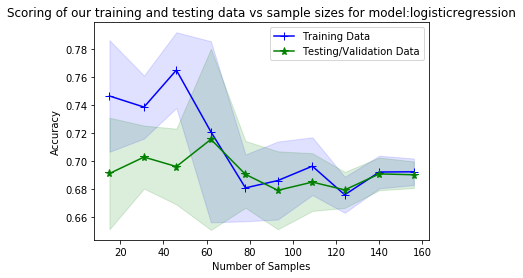

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


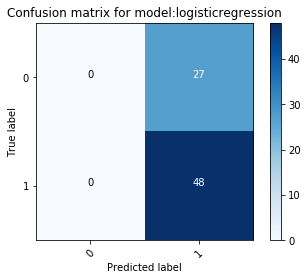

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.824075
inside decision function


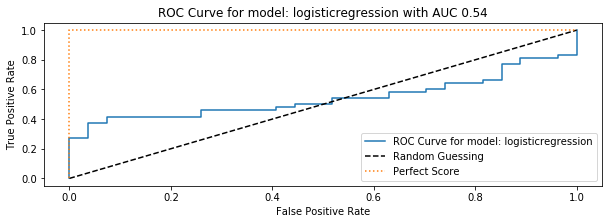

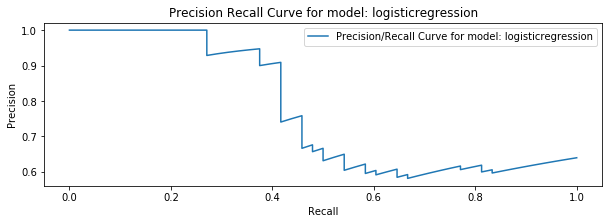

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.457935
Grid Search Best parameters  {'logisticregression_liblinear_l2__C': 1.2, 'logisticregression_liblinear_l2__dual': True, 'logisticregression_liblinear_l2__penalty': 'l2'}
Grid Search Best score  0.7578029217159652
Code block 'training' took(HH:MM:SS): 0:00:00.221655
Code block 'testing' took(HH:MM:SS): 0:00:00.000249
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



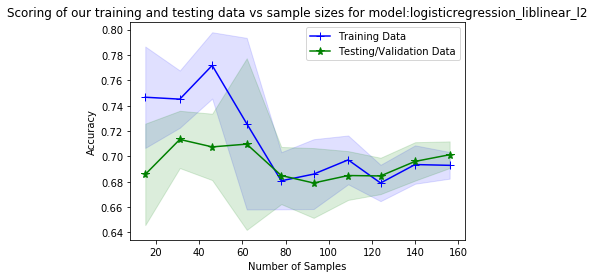

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


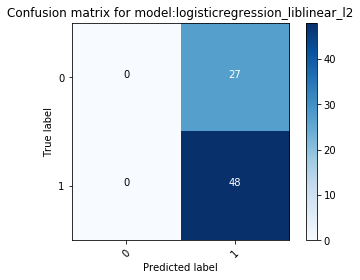

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.894620
inside decision function


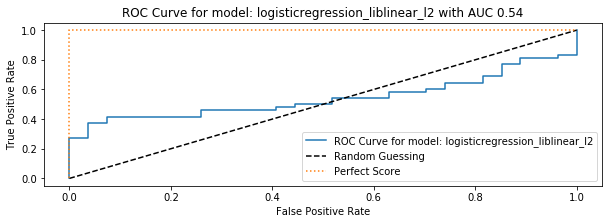

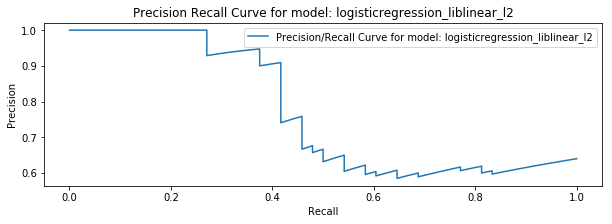

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.468413
Grid Search Best parameters  {'logisticregression_newton_cg__C': 0.05, 'logisticregression_newton_cg__penalty': 'l2'}
Grid Search Best score  0.7598303146129234
Code block 'training' took(HH:MM:SS): 0:00:00.782147
Code block 'testing' took(HH:MM:SS): 0:00:00.000243
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



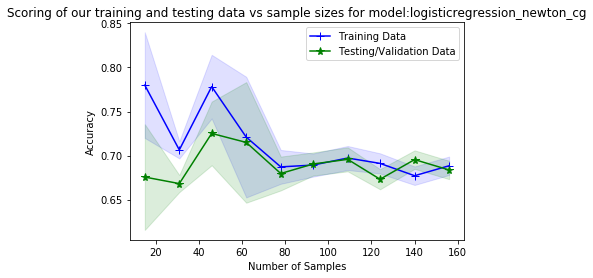

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


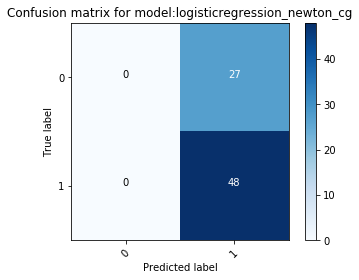

Code block 'learning_curve' took(HH:MM:SS): 0:00:02.522258
inside decision function


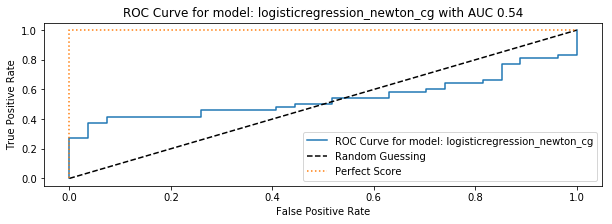

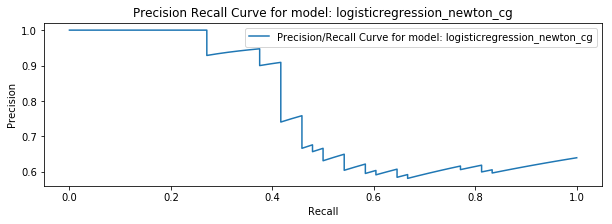

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.577934
Grid Search Best parameters  {'logisticregression_sag__C': 0.05, 'logisticregression_sag__penalty': 'l2'}
Grid Search Best score  0.7598303146129234
Code block 'training' took(HH:MM:SS): 0:00:00.234329
Code block 'testing' took(HH:MM:SS): 0:00:00.000206
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



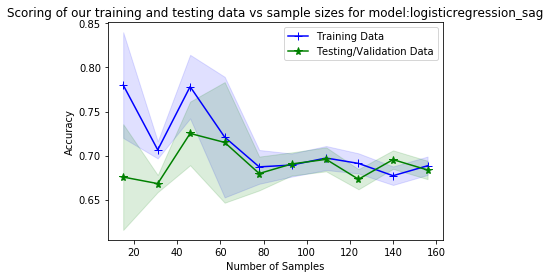

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


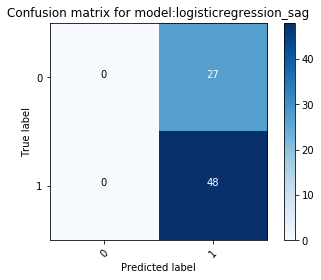

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.906294
inside decision function


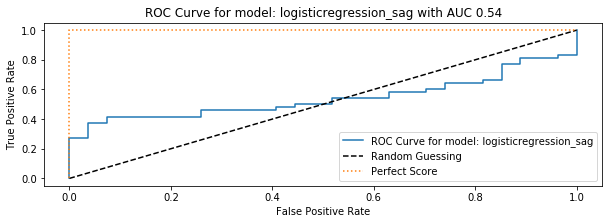

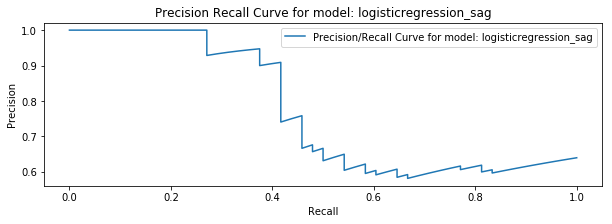

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.419948
Grid Search Best parameters  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__max_features': 'log2'}
Grid Search Best score  0.7764835164835165
Code block 'training' took(HH:MM:SS): 0:00:00.545406
Code block 'testing' took(HH:MM:SS): 0:00:00.000247
F1 score 0.5664830508474576
Classification report  
               precision    recall  f1-score   support

           0       0.60      0.11      0.19        27
           1       0.66      0.96      0.78        48

   micro avg       0.65      0.65      0.65        75
   macro avg       0.63      0.53      0.48        75
weighted avg       0.64      0.65      0.57        75



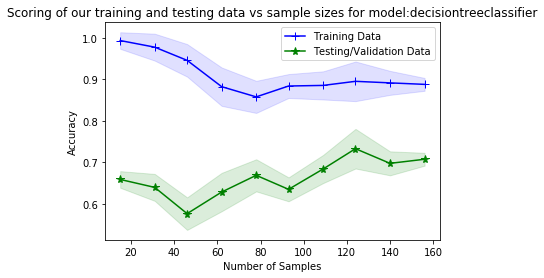

Confusion matrix, without normalization
[[ 3 24]
 [ 2 46]]


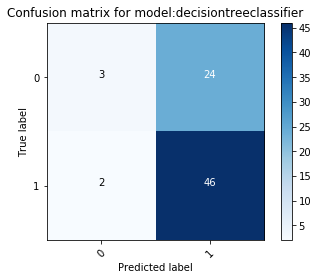

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.781119
inside decision function


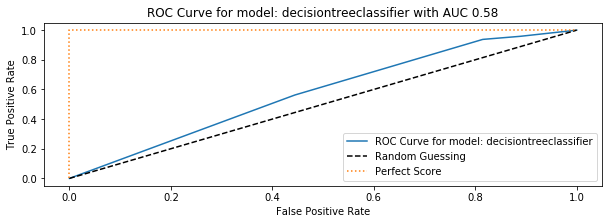

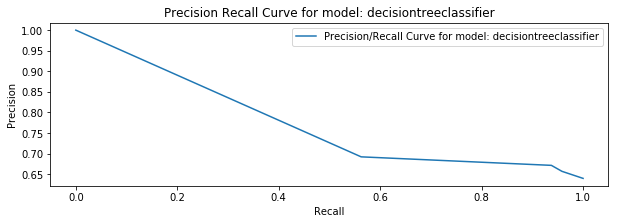

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.466123
Grid Search Best parameters  {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 8}
Grid Search Best score  0.7928818283166109
Code block 'training' took(HH:MM:SS): 0:00:00.672940
Code block 'testing' took(HH:MM:SS): 0:00:00.001810
F1 score 0.5493333333333333
Classification report  
               precision    recall  f1-score   support

           0       0.67      0.07      0.13        27
           1       0.65      0.98      0.78        48

   micro avg       0.65      0.65      0.65        75
   macro avg       0.66      0.53      0.46        75
weighted avg       0.66      0.65      0.55        75



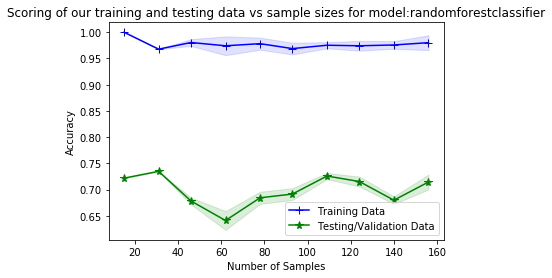

Confusion matrix, without normalization
[[ 2 25]
 [ 1 47]]


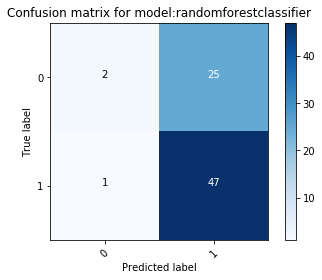

Code block 'learning_curve' took(HH:MM:SS): 0:00:02.240760
inside decision function


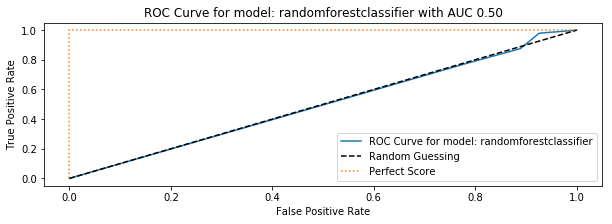

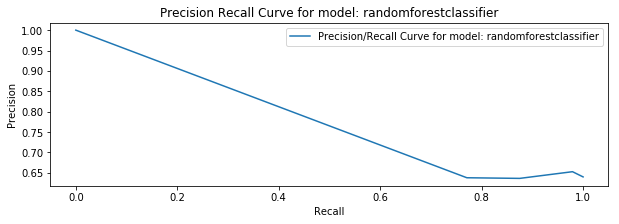

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.475887
Grid Search Best parameters  {'kneighborsclassifier__n_neighbors': 10}
Grid Search Best score  0.8147949152296978
Code block 'training' took(HH:MM:SS): 0:00:00.132983
Code block 'testing' took(HH:MM:SS): 0:00:00.001844
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



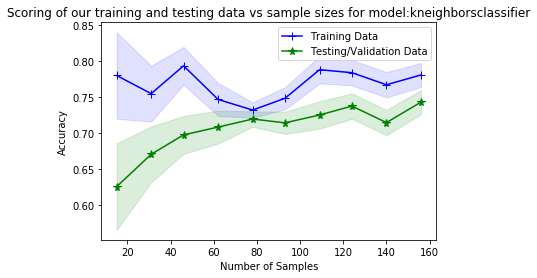

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


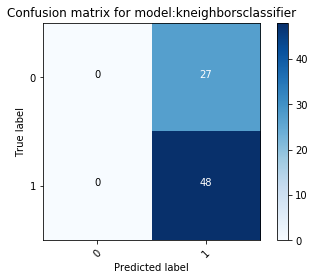

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.114165
inside decision function


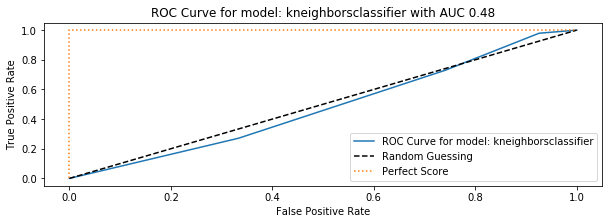

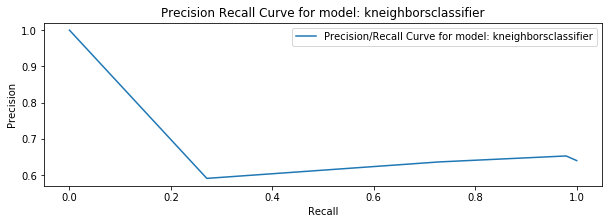

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.449537
Grid Search Best parameters  {'ridge__alpha': 1, 'ridge__max_iter': 100}
Grid Search Best score  0.7577662916793351
Code block 'training' took(HH:MM:SS): 0:00:00.384265
Code block 'testing' took(HH:MM:SS): 0:00:00.000250
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



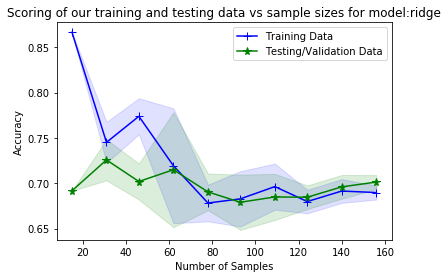

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


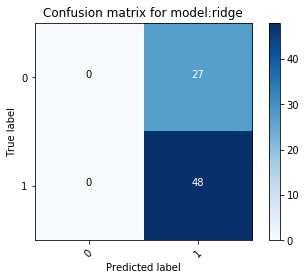

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.973324
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000027
Grid Search Best parameters  {'linear_svc__C': 0.025}
Grid Search Best score  0.7577522477522478
Code block 'training' took(HH:MM:SS): 0:00:00.044211
Code block 'testing' took(HH:MM:SS): 0:00:00.000715
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



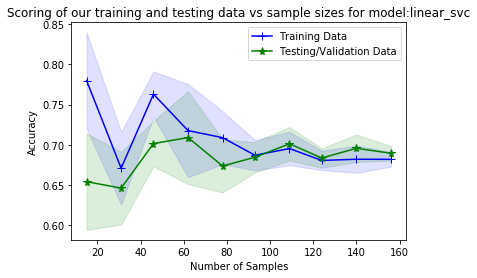

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


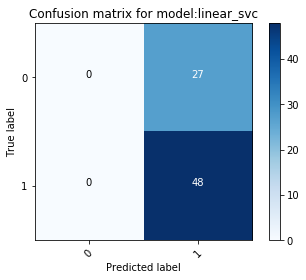

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.824199
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000048
Grid Search Best parameters  {'gamma_svc__C': 1, 'gamma_svc__gamma': 2}
Grid Search Best score  0.7751727982162764
Code block 'training' took(HH:MM:SS): 0:00:00.201821
Code block 'testing' took(HH:MM:SS): 0:00:00.001293
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



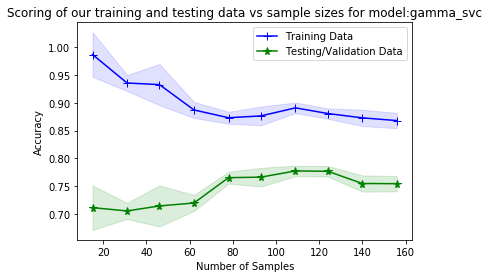

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


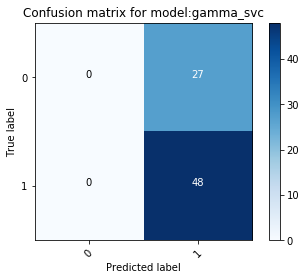

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.926339
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000028
Grid Search Best parameters  {'extra_trees__criterion': 'gini', 'extra_trees__max_depth': 6}
Grid Search Best score  0.7303940262635913
Code block 'training' took(HH:MM:SS): 0:00:00.186641
Code block 'testing' took(HH:MM:SS): 0:00:00.000271
F1 score 0.5220176688515247
Classification report  
               precision    recall  f1-score   support

           0       0.50      0.04      0.07        27
           1       0.64      0.98      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.57      0.51      0.42        75
weighted avg       0.59      0.64      0.52        75



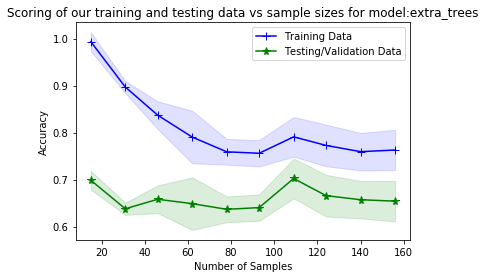

Confusion matrix, without normalization
[[ 1 26]
 [ 1 47]]


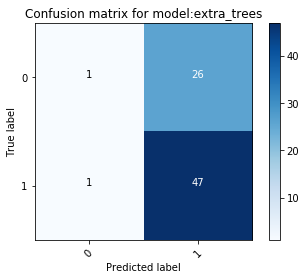

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.763399
inside decision function


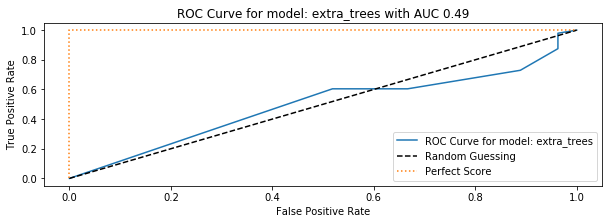

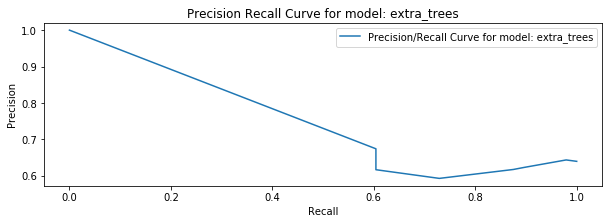

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.476272
Grid Search Best parameters  {'gaussian_process__max_iter_predict': 200}
Grid Search Best score  0.8334584256323385
Code block 'training' took(HH:MM:SS): 0:00:00.262148
Code block 'testing' took(HH:MM:SS): 0:00:00.000660
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



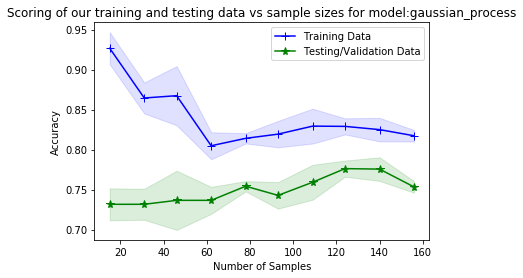

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


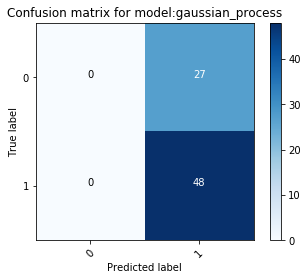

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.810638
inside decision function


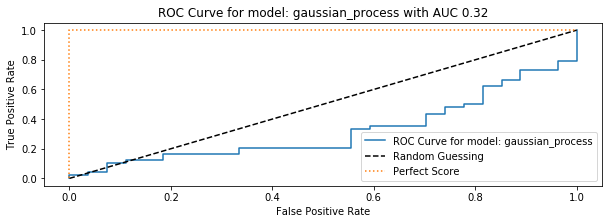

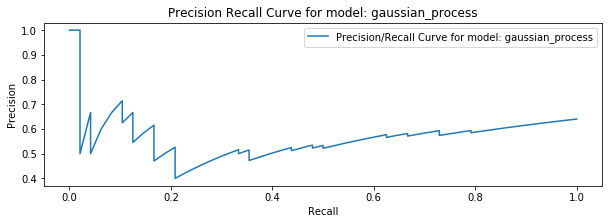

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.564720
Grid Search Best parameters  {'bernoulli__alpha': 0.2}
Grid Search Best score  0.7079832486354225
Code block 'training' took(HH:MM:SS): 0:00:00.114346
Code block 'testing' took(HH:MM:SS): 0:00:00.000787
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



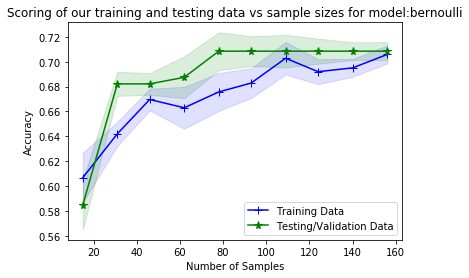

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


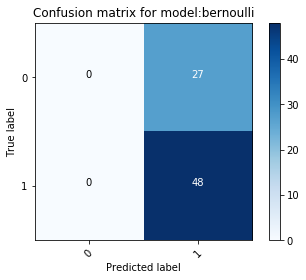

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.865422
inside decision function


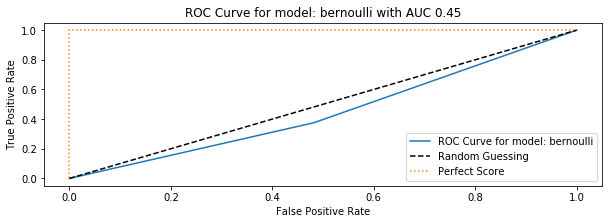

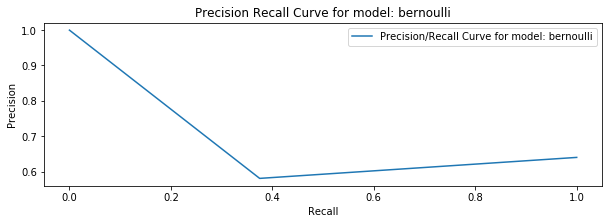

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.452622
Grid Search Best parameters  {'bagging_logistic__base_estimator__C': 1.2, 'bagging_logistic__base_estimator__penalty': 'l2', 'bagging_logistic__n_estimators': 8}
Grid Search Best score  0.7645108514673733
Code block 'training' took(HH:MM:SS): 0:00:02.626842
Code block 'testing' took(HH:MM:SS): 0:00:00.002515
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



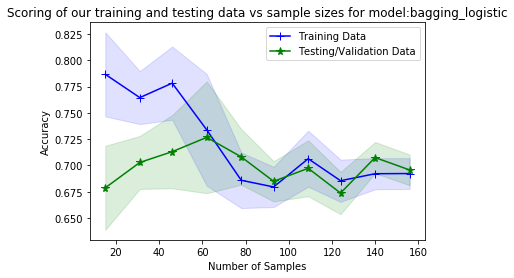

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


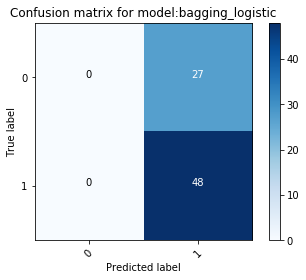

Code block 'learning_curve' took(HH:MM:SS): 0:00:02.401102
inside decision function


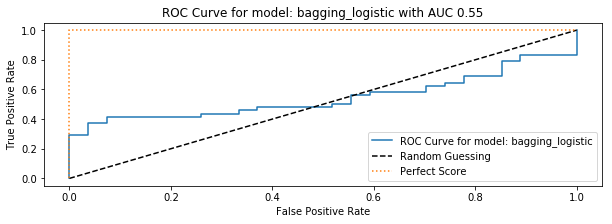

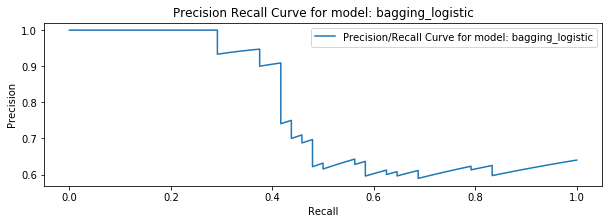

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.457570
Grid Search Best parameters  {'bagging_bernoulli__base_estimator__alpha': 1.2, 'bagging_bernoulli__n_estimators': 5}
Grid Search Best score  0.7079832486354225
Code block 'training' took(HH:MM:SS): 0:00:01.570932
Code block 'testing' took(HH:MM:SS): 0:00:00.003652
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



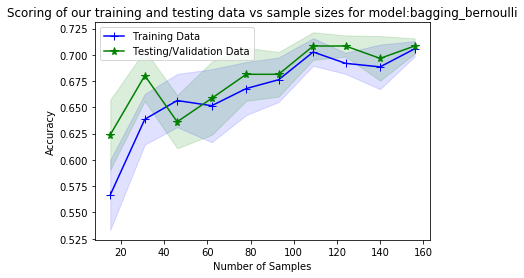

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


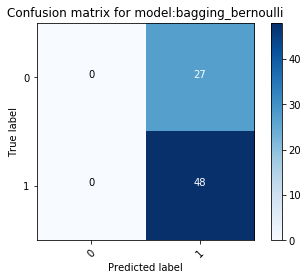

Code block 'learning_curve' took(HH:MM:SS): 0:00:02.154009
inside decision function


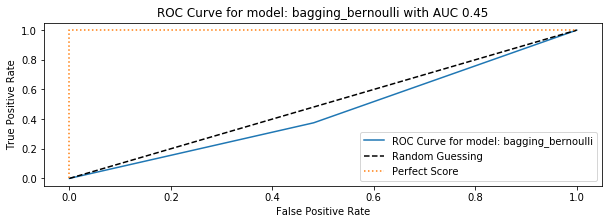

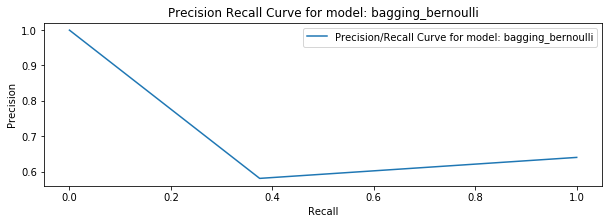

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.470847
Grid Search Best parameters  {'gradient_boosting_classifier__criterion': 'friedman_mse', 'gradient_boosting_classifier__learning_rate': 1.2, 'gradient_boosting_classifier__loss': 'exponential', 'gradient_boosting_classifier__max_depth': 6, 'gradient_boosting_classifier__n_estimators': 100}
Grid Search Best score  0.8030040249605467
Code block 'training' took(HH:MM:SS): 0:04:13.501643
Code block 'testing' took(HH:MM:SS): 0:00:00.000603
F1 score 0.5490466531440161
Classification report  
               precision    recall  f1-score   support

           0       0.43      0.11      0.18        27
           1       0.65      0.92      0.76        48

   micro avg       0.63      0.63      0.63        75
   macro avg       0.54      0.51      0.47        75
weighted avg       0.57      0.63      0.55        75



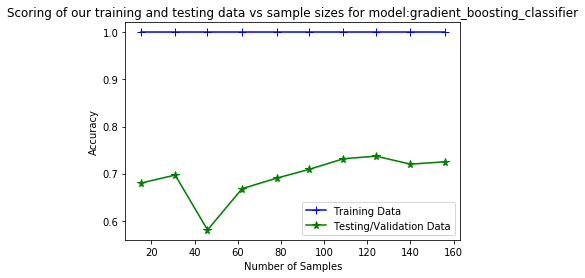

Confusion matrix, without normalization
[[ 3 24]
 [ 4 44]]


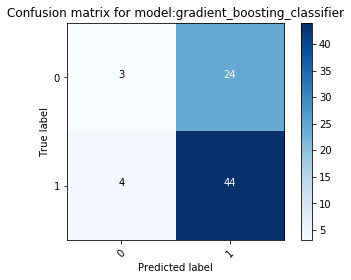

Code block 'learning_curve' took(HH:MM:SS): 0:00:06.299052
inside decision function


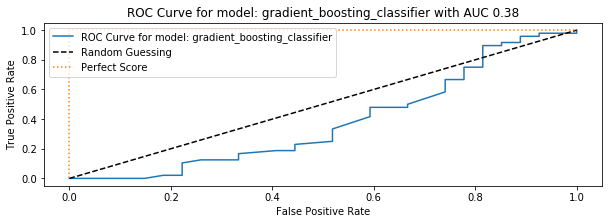

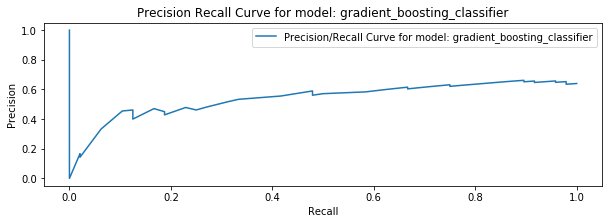

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.542011
Grid Search Best parameters  {'lgbm_classifier__bagging_freq': 1, 'lgbm_classifier__bagging_seed': 123, 'lgbm_classifier__feature_fraction': 0.9, 'lgbm_classifier__learning_rate': 0.01, 'lgbm_classifier__max_depth': 20, 'lgbm_classifier__min_child_samples': 2, 'lgbm_classifier__n_estimators': 5000, 'lgbm_classifier__num_boost_round': 100, 'lgbm_classifier__num_leaves': 25}
Grid Search Best score  0.6805304116173682
Code block 'training' took(HH:MM:SS): 0:00:00.355492
Code block 'testing' took(HH:MM:SS): 0:00:00.001657
F1 score 0.5412415288696123
Classification report  
               precision    recall  f1-score   support

           0       0.50      0.07      0.13        27
           1       0.65      0.96      0.77        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.57      0.52      0.45        75
weighted avg       0.59      0.64      0.54        75



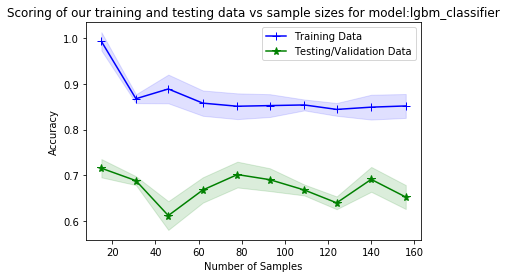

Confusion matrix, without normalization
[[ 2 25]
 [ 2 46]]


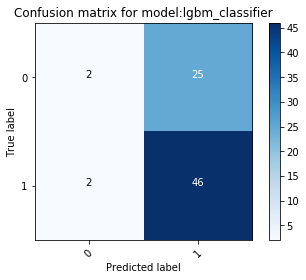

Code block 'learning_curve' took(HH:MM:SS): 0:00:04.859330
inside decision function


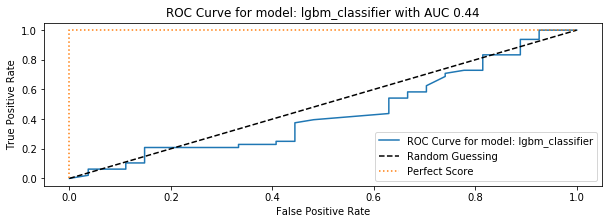

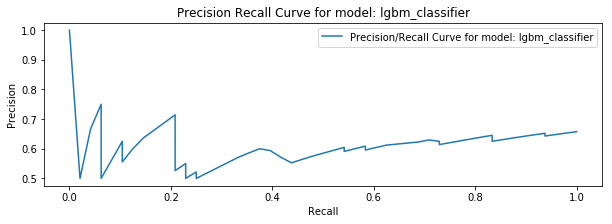

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.569494
Grid Search Best parameters  {'xgb__booster': 'gbtree', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
Grid Search Best score  0.8067938583155975
Code block 'training' took(HH:MM:SS): 0:07:41.112260
Code block 'testing' took(HH:MM:SS): 0:00:00.000622
F1 score 0.4931147540983606
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      0.98      0.77        48

   micro avg       0.63      0.63      0.63        75
   macro avg       0.32      0.49      0.39        75
weighted avg       0.41      0.63      0.49        75



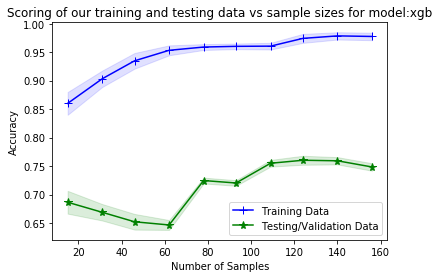

Confusion matrix, without normalization
[[ 0 27]
 [ 1 47]]


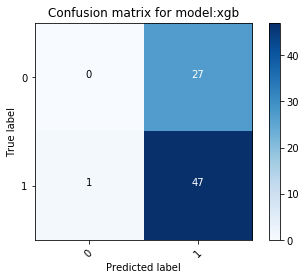

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.343429
inside decision function


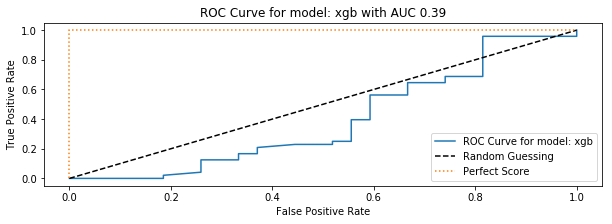

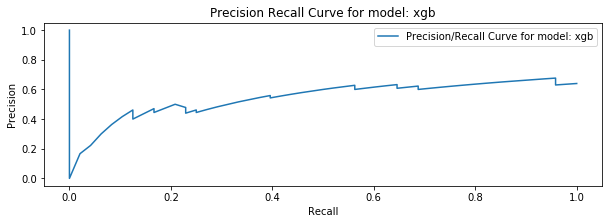

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.257274
Code block 'overalltime' took(HH:MM:SS): 0:12:44.595936
764595.9362025787


In [222]:

##runing without scaling, since scaling was already done prior to tsne
response = execute(
        x_train_tsne,
        y_train,
        x_test_tsne,
        y_test,
        classifiers,
        classifier_names,
        classifier_param_grid,
        cv=cv,
        score=score,
        scaler=None)

In [223]:
results = panda.DataFrame(response).transpose()
results.head()
results[['f1_score',
         'f1_score_macro',
         'f1_score_micro',
         'learning_curve_time',
         'roc_auc_score',
         'testing_time',
         'training_time',
        ]]\
.sort_values(by=['roc_auc_score',],ascending=False)

f1_score f1_score_macro f1_score_micro  \
decisiontreeclassifier           0.566483       0.483581       0.653333   
bagging_logistic                 0.499512       0.390244           0.64   
logisticregression_liblinear_l2  0.499512       0.390244           0.64   
logisticregression_newton_cg     0.499512       0.390244           0.64   
logisticregression_sag           0.499512       0.390244           0.64   
logisticregression               0.499512       0.390244           0.64   
randomforestclassifier           0.549333       0.458333       0.653333   
extra_trees                      0.522018       0.422913           0.64   
kneighborsclassifier             0.499512       0.390244           0.64   
bagging_bernoulli                0.499512       0.390244           0.64   
bernoulli                        0.499512       0.390244           0.64   
lgbm_classifier                  0.541242       0.451071           0.64   
xgb                              0.493115       0.385246       0.626667   
gradient_boosting_classifier     0.549047       0.467546       0.626667   
gaussian_process                 0.499512       0.390244           0.64   
perceptron                       0.499512       0.390244           0.64   
gamma_svc                        0.499512       0.390244           0.64   
ridge                            0.499512       0.390244           0.64   
linear_svc                       0.499512       0.390244           0.64   

                                learning_curve_time roc_auc_score  \
decisiontreeclassifier                      781.119       0.58179   
bagging_logistic                             2401.1      0.546296   
logisticregression_liblinear_l2              894.62      0.542438   
logisticregression_newton_cg                2522.26      0.541667   
logisticregression_sag                      906.294      0.541667   
logisticregression                          824.075      0.541667   
randomforestclassifier                      2240.76      0.498843   
extra_trees                                 763.399      0.490355   
kneighborsclassifier                        1114.17      0.480324   
bagging_bernoulli                           2154.01      0.446759   
bernoulli                                   865.422      0.446759   
lgbm_classifier                             4859.33      0.439815   
xgb                                         1343.43      0.392747   
gradient_boosting_classifier                6299.05      0.383488   
gaussian_process                            1810.64      0.321759   
perceptron                                  875.237             0   
gamma_svc                                   926.339             0   
ridge                                       973.324             0   
linear_svc                                  824.199             0   

                                testing_time training_time  
decisiontreeclassifier              0.246898       545.406  
bagging_logistic                     2.51506       2626.84  
logisticregression_liblinear_l2     0.249173       221.655  
logisticregression_newton_cg        0.242915       782.147  
logisticregression_sag              0.205938       234.329  
logisticregression                  0.251449       801.185  
randomforestclassifier                1.8102        672.94  
extra_trees                         0.270791       186.641  
kneighborsclassifier                 1.84434       132.983  
bagging_bernoulli                    3.65226       1570.93  
bernoulli                           0.786773       114.346  
lgbm_classifier                       1.6566       355.492  
xgb                                 0.622364        461112  
gradient_boosting_classifier        0.603022        253502  
gaussian_process                    0.659911       262.148  
perceptron                          0.167253       93.8148  
gamma_svc                            1.29251       201.821  
ridge                               0.250311       38

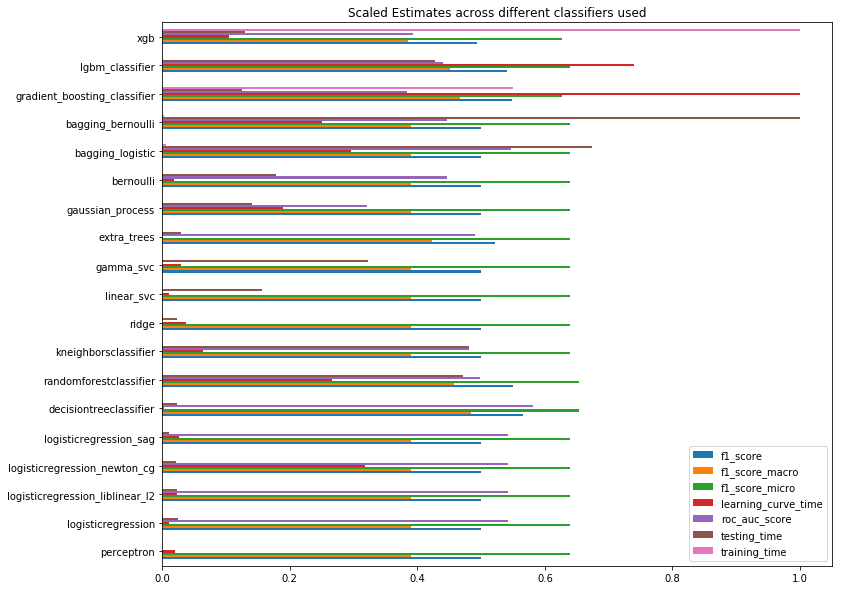

In [224]:
results['learning_curve_time'] = results['learning_curve_time'].astype('float64')
results['testing_time'] = results['testing_time'].astype('float64')
results['training_time'] = results['training_time'].astype('float64')
results['f1_score'] = results['f1_score'].astype('float64')
results['f1_score_micro'] = results['f1_score_micro'].astype('float64')
results['f1_score_macro'] = results['f1_score_macro'].astype('float64')
results['roc_auc_score'] = results['roc_auc_score'].astype('float64')
# results['roc_auc_macro'] = results['roc_auc_macro'].astype('float64')

#scaling time parameters between 0 and 1
results['learning_curve_time'] = (results['learning_curve_time']- results['learning_curve_time'].min())/(results['learning_curve_time'].max()- results['learning_curve_time'].min())
results['testing_time'] = (results['testing_time']- results['testing_time'].min())/(results['testing_time'].max()- results['testing_time'].min())
results['training_time'] = (results['training_time']- results['training_time'].min())/(results['training_time'].max()- results['training_time'].min())

results.plot(kind='barh',figsize=(12, 10))
plot.title("Scaled Estimates across different classifiers used")
plot.show()

### Conclusion: dimensionality reduction gives worse predictions

### STEP 3: Upsampling / Downsampling Techniques

<br><br>

In [233]:

classifiers = [
    Perceptron(random_state = 1),
    LogisticRegression(random_state = 1),
    LogisticRegression(random_state = 1, solver='liblinear'),
    LogisticRegression(random_state = 1, solver='newton-cg'),
    LogisticRegression(random_state = 1, solver='sag'),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state = 1),
    KNeighborsClassifier(metric = 'minkowski'),
    RidgeClassifier(random_state = 123), 
    SVC(kernel="linear"),
    SVC(),
    ExtraTreeClassifier(random_state = 123),
    GaussianProcessClassifier(random_state = 123),
    BernoulliNB(),
    BaggingClassifier(base_estimator = LogisticRegression(random_state = 1)),
    BaggingClassifier(base_estimator = BernoulliNB()),
 
]


classifier_names = [
            'perceptron',
            'logisticregression',
            'logisticregression_liblinear_l2',
            'logisticregression_newton_cg',
            'logisticregression_sag',
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'ridge',
            'linear_svc',
            'gamma_svc',
            'extra_trees',
            'gaussian_process',
            'bernoulli',
            'bagging_logistic',
            'bagging_bernoulli',
 
]

classifier_param_grid = [
            
            {'perceptron__max_iter': [5,10,30], 'perceptron__eta0': [.1]},
            {
             'logisticregression__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression__penalty':['l1','l2'],
             'logisticregression__solver':['saga','liblinear']
            },
            {
             'logisticregression_liblinear_l2__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression_liblinear_l2__penalty':['l2'],
             'logisticregression_liblinear_l2__dual':[True]
            },
            {
             'logisticregression_newton_cg__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression_newton_cg__penalty':['l2'],
            },
            {
             'logisticregression_sag__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression_sag__penalty':['l2'],
            },
    
            {'decisiontreeclassifier__max_depth':[6,8,10],
             'decisiontreeclassifier__criterion':['gini','entropy'],
             'decisiontreeclassifier__max_features':['auto','sqrt','log2'],
            },
            {'randomforestclassifier__n_estimators':[6,8,12],'randomforestclassifier__criterion': ['gini','entropy']} ,
            {'kneighborsclassifier__n_neighbors':[4,6,10]},
            {'ridge__alpha':[1,1.2,0.9],'ridge__max_iter':[100,300,500]},
            {'linear_svc__C':[0.025]},
            {'gamma_svc__gamma':[2,4],'gamma_svc__C':[1,5]},
            {'extra_trees__max_depth':[6,8,12],'extra_trees__criterion': ['gini','entropy']} ,
            {'gaussian_process__max_iter_predict':[200,400]} ,
            {'bernoulli__alpha':[0.2,0.6,1.2]} ,
            {'bagging_logistic__base_estimator__C':[1.2,0.02,2.2,4], 
             'bagging_logistic__base_estimator__penalty':['l1','l2'],
             'bagging_logistic__n_estimators': [5,8,10]
            },
            {'bagging_bernoulli__base_estimator__alpha':[1.2,0.02,2.2,4], 
             'bagging_bernoulli__n_estimators': [5,8,10]
            },
    
]


In [225]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from imblearn.combine import SMOTETomek

In [228]:

tl = TomekLinks(return_indices=True, ratio='majority')
_x_train_tomek, _y_train_tomek, id_tl = tl.fit_sample(x_train, y_train)

smt = SMOTETomek(ratio='auto')
_x_train_smt, _y_train_smt = smt.fit_sample(x_train, y_train)

smote = SMOTE(ratio='minority')
x_train_smote, y_train_smote = smote.fit_sample(x_train,y_train)





In [231]:
_x_train_tomek.shape, _y_train_tomek.shape,x_test.shape,y_test.shape

((168, 50), (168,), (75, 50), (75,))

Grid Search Best parameters  {'perceptron__eta0': 0.1, 'perceptron__max_iter': 10}
Grid Search Best score  0.9337879382522241
Code block 'training' took(HH:MM:SS): 0:00:00.052679
Code block 'testing' took(HH:MM:SS): 0:00:00.000906
F1 score 0.8039408866995075
Classification report  
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        27
           1       0.92      0.75      0.83        48

   micro avg       0.80      0.80      0.80        75
   macro avg       0.79      0.82      0.79        75
weighted avg       0.83      0.80      0.80        75



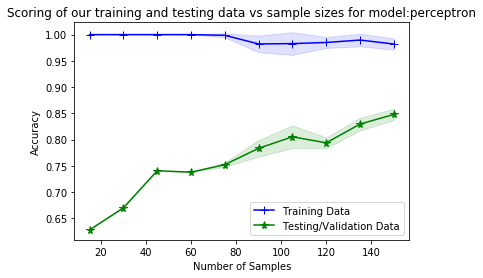

Confusion matrix, without normalization
[[24  3]
 [12 36]]


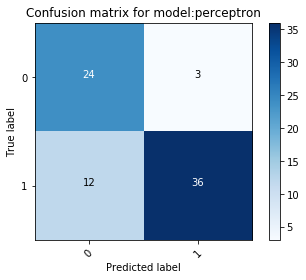

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.339510
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000015
Grid Search Best parameters  {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Grid Search Best score  0.9482546223617652
Code block 'training' took(HH:MM:SS): 0:00:00.675344
Code block 'testing' took(HH:MM:SS): 0:00:00.000531
F1 score 0.8622549019607844
Classification report  
               precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.85      0.96      0.90        48

   micro avg       0.87      0.87      0.87        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.87      0.87      0.86        75



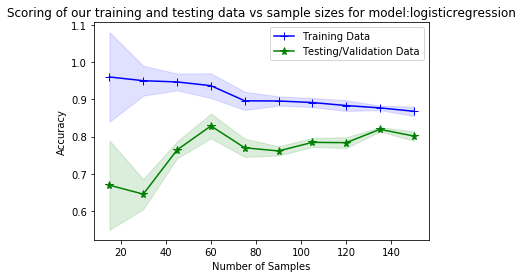

Confusion matrix, without normalization
[[19  8]
 [ 2 46]]


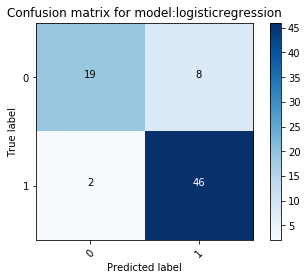

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.457327
inside decision function


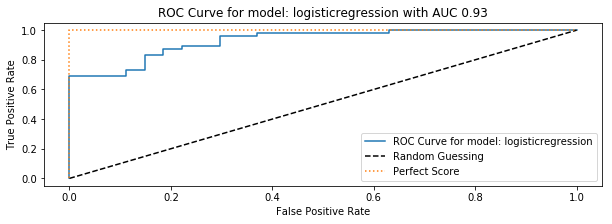

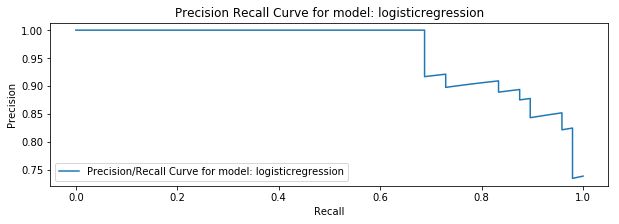

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.218815
Grid Search Best parameters  {'logisticregression_liblinear_l2__C': 0.05, 'logisticregression_liblinear_l2__dual': True, 'logisticregression_liblinear_l2__penalty': 'l2'}
Grid Search Best score  0.9399856096284668
Code block 'training' took(HH:MM:SS): 0:00:00.097525
Code block 'testing' took(HH:MM:SS): 0:00:00.000529
F1 score 0.8170639534883721
Classification report  
               precision    recall  f1-score   support

           0       0.68      0.93      0.78        27
           1       0.95      0.75      0.84        48

   micro avg       0.81      0.81      0.81        75
   macro avg       0.81      0.84      0.81        75
weighted avg       0.85      0.81      0.82        75



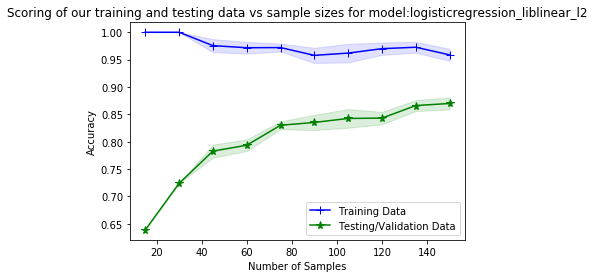

Confusion matrix, without normalization
[[25  2]
 [12 36]]


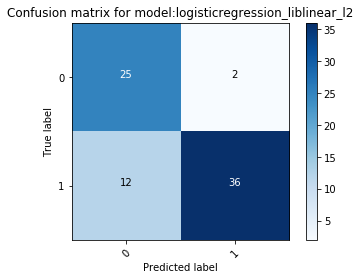

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.330571
inside decision function


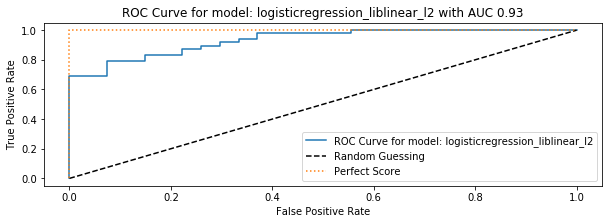

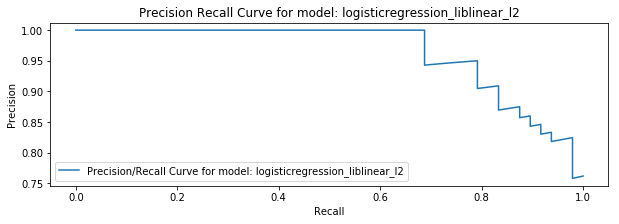

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.220637
Grid Search Best parameters  {'logisticregression_newton_cg__C': 0.01, 'logisticregression_newton_cg__penalty': 'l2'}
Grid Search Best score  0.9482546223617652
Code block 'training' took(HH:MM:SS): 0:00:00.182870
Code block 'testing' took(HH:MM:SS): 0:00:00.000920
F1 score 0.8622549019607844
Classification report  
               precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.85      0.96      0.90        48

   micro avg       0.87      0.87      0.87        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.87      0.87      0.86        75



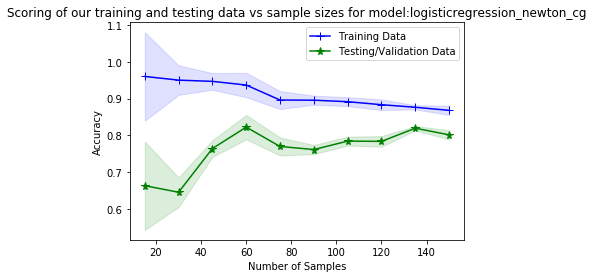

Confusion matrix, without normalization
[[19  8]
 [ 2 46]]


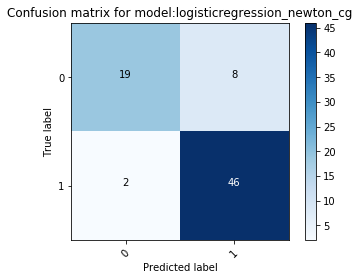

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.619588
inside decision function


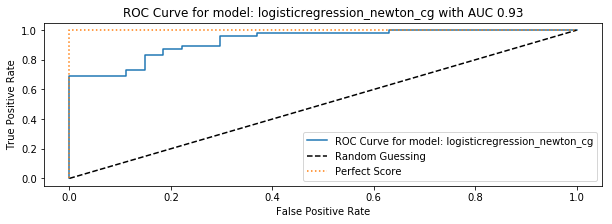

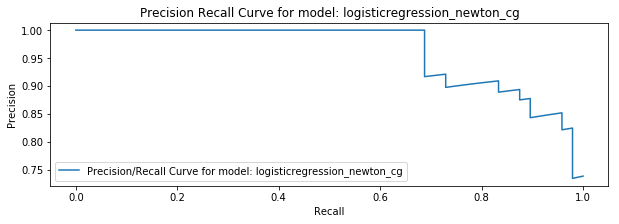

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.223656
Grid Search Best parameters  {'logisticregression_sag__C': 0.01, 'logisticregression_sag__penalty': 'l2'}
Grid Search Best score  0.9482546223617652
Code block 'training' took(HH:MM:SS): 0:00:00.211075
Code block 'testing' took(HH:MM:SS): 0:00:00.000592
F1 score 0.8622549019607844
Classification report  
               precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.85      0.96      0.90        48

   micro avg       0.87      0.87      0.87        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.87      0.87      0.86        75



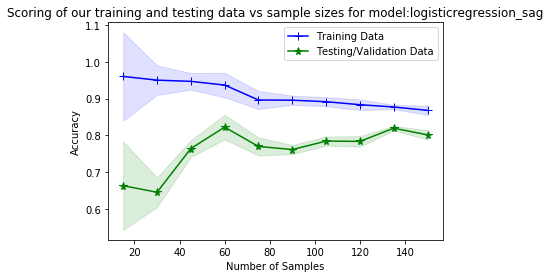

Confusion matrix, without normalization
[[19  8]
 [ 2 46]]


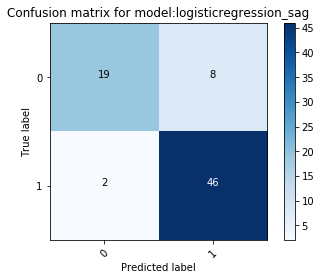

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.406595
inside decision function


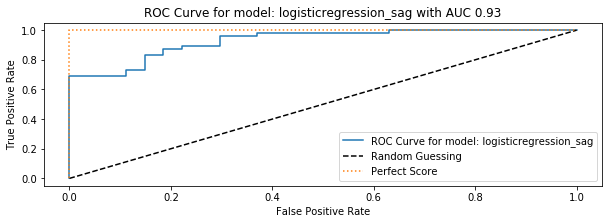

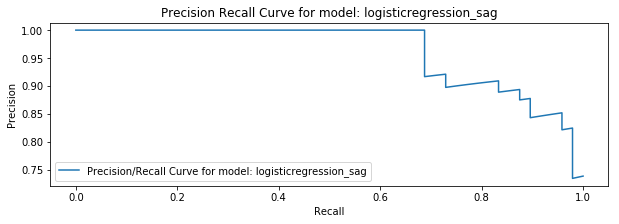

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.220858
Grid Search Best parameters  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__max_features': 'log2'}
Grid Search Best score  0.6806563971742543
Code block 'training' took(HH:MM:SS): 0:00:00.238240
Code block 'testing' took(HH:MM:SS): 0:00:00.000516
F1 score 0.5268571428571428
Classification report  
               precision    recall  f1-score   support

           0       0.40      0.63      0.49        27
           1       0.69      0.46      0.55        48

   micro avg       0.52      0.52      0.52        75
   macro avg       0.54      0.54      0.52        75
weighted avg       0.58      0.52      0.53        75



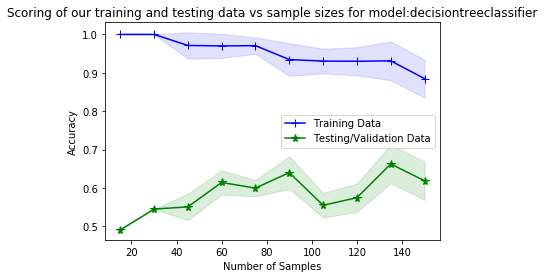

Confusion matrix, without normalization
[[17 10]
 [26 22]]


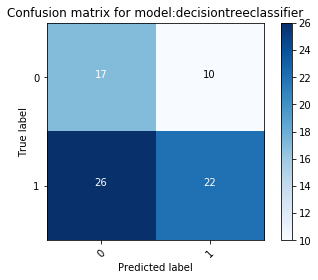

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.328039
inside decision function


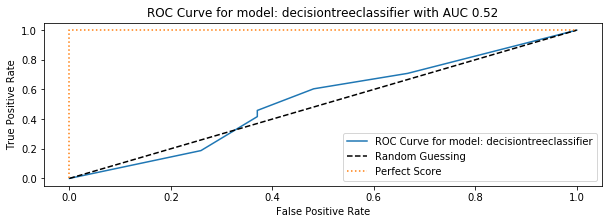

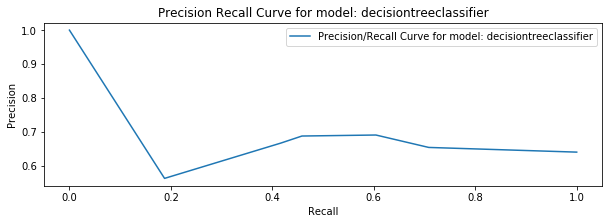

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.217208
Grid Search Best parameters  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 12}
Grid Search Best score  0.7787480376766092
Code block 'training' took(HH:MM:SS): 0:00:00.334806
Code block 'testing' took(HH:MM:SS): 0:00:00.001439
F1 score 0.7630584707646177
Classification report  
               precision    recall  f1-score   support

           0       0.65      0.74      0.69        27
           1       0.84      0.77      0.80        48

   micro avg       0.76      0.76      0.76        75
   macro avg       0.74      0.76      0.75        75
weighted avg       0.77      0.76      0.76        75



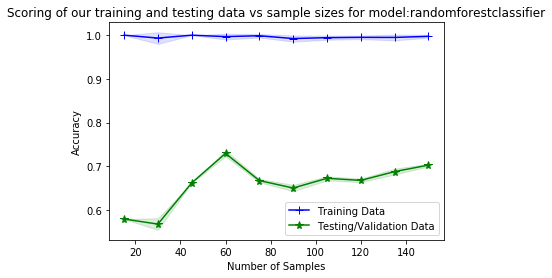

Confusion matrix, without normalization
[[20  7]
 [11 37]]


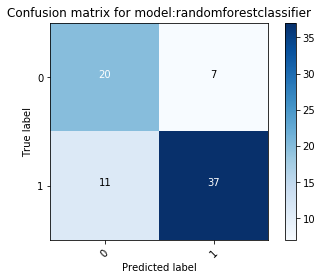

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.250706
inside decision function


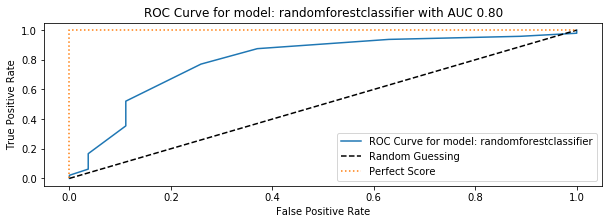

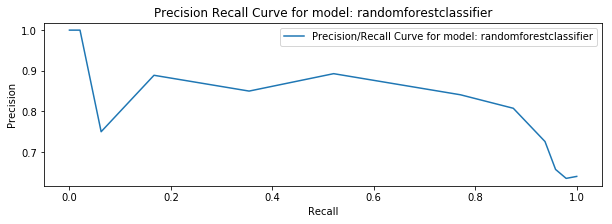

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.216972
Grid Search Best parameters  {'kneighborsclassifier__n_neighbors': 10}
Grid Search Best score  0.8810723007151579
Code block 'training' took(HH:MM:SS): 0:00:00.081319
Code block 'testing' took(HH:MM:SS): 0:00:00.002018
F1 score 0.6856241032998566
Classification report  
               precision    recall  f1-score   support

           0       0.54      0.81      0.65        27
           1       0.85      0.60      0.71        48

   micro avg       0.68      0.68      0.68        75
   macro avg       0.69      0.71      0.68        75
weighted avg       0.74      0.68      0.69        75



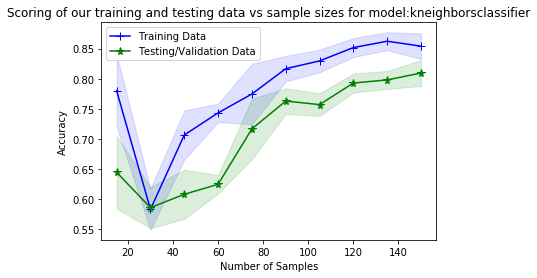

Confusion matrix, without normalization
[[22  5]
 [19 29]]


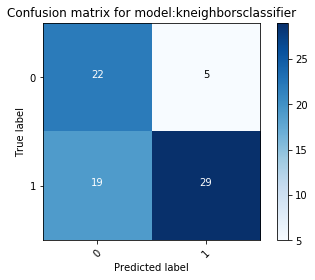

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.520127
inside decision function


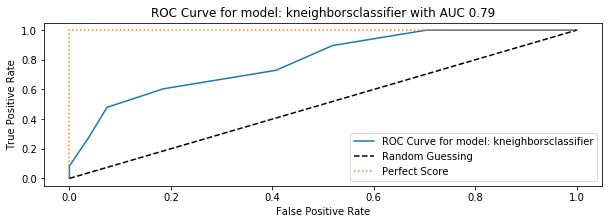

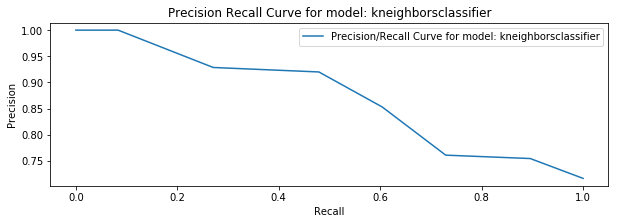

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.219076
Grid Search Best parameters  {'ridge__alpha': 1, 'ridge__max_iter': 100}
Grid Search Best score  0.9006355747427176
Code block 'training' took(HH:MM:SS): 0:00:00.144822
Code block 'testing' took(HH:MM:SS): 0:00:00.000726
F1 score 0.7384164222873901
Classification report  
               precision    recall  f1-score   support

           0       0.60      0.78      0.68        27
           1       0.85      0.71      0.77        48

   micro avg       0.73      0.73      0.73        75
   macro avg       0.72      0.74      0.73        75
weighted avg       0.76      0.73      0.74        75



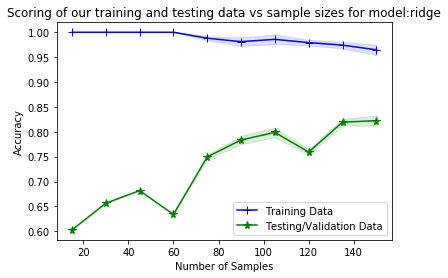

Confusion matrix, without normalization
[[21  6]
 [14 34]]


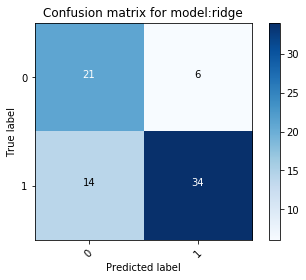

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.404127
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000015
Grid Search Best parameters  {'linear_svc__C': 0.025}
Grid Search Best score  0.9399474533403106
Code block 'training' took(HH:MM:SS): 0:00:00.024812
Code block 'testing' took(HH:MM:SS): 0:00:00.000968
F1 score 0.8292493946731235
Classification report  
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.91      0.81      0.86        48

   micro avg       0.83      0.83      0.83        75
   macro avg       0.81      0.83      0.82        75
weighted avg       0.84      0.83      0.83        75



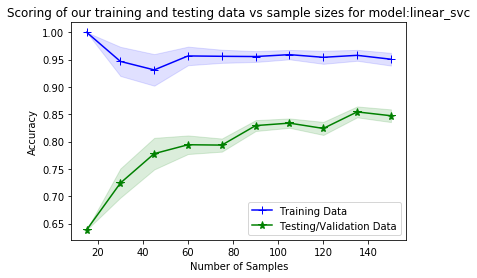

Confusion matrix, without normalization
[[23  4]
 [ 9 39]]


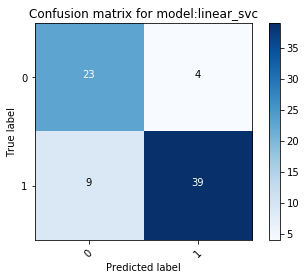

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.374081
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000016
Grid Search Best parameters  {'gamma_svc__C': 1, 'gamma_svc__gamma': 2}
Grid Search Best score  0.5
Code block 'training' took(HH:MM:SS): 0:00:00.112982
Code block 'testing' took(HH:MM:SS): 0:00:00.001322
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



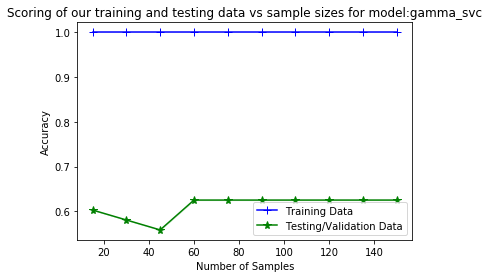

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


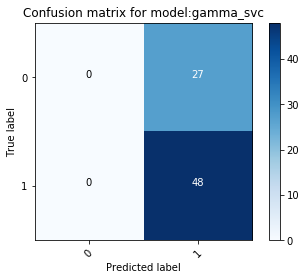

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.423486
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000016
Grid Search Best parameters  {'extra_trees__criterion': 'entropy', 'extra_trees__max_depth': 8}
Grid Search Best score  0.6298022414093842
Code block 'training' took(HH:MM:SS): 0:00:00.083051
Code block 'testing' took(HH:MM:SS): 0:00:00.000658
F1 score 0.4852971137521222
Classification report  
               precision    recall  f1-score   support

           0       0.30      0.33      0.32        27
           1       0.60      0.56      0.58        48

   micro avg       0.48      0.48      0.48        75
   macro avg       0.45      0.45      0.45        75
weighted avg       0.49      0.48      0.49        75



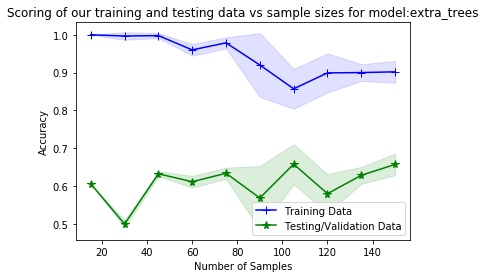

Confusion matrix, without normalization
[[ 9 18]
 [21 27]]


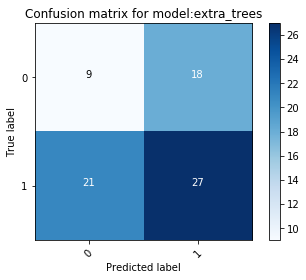

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.361750
inside decision function


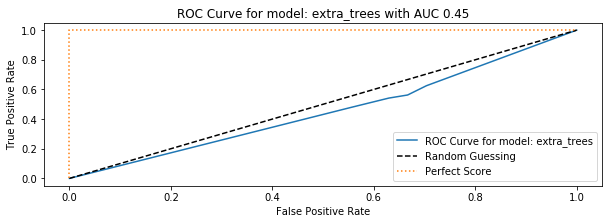

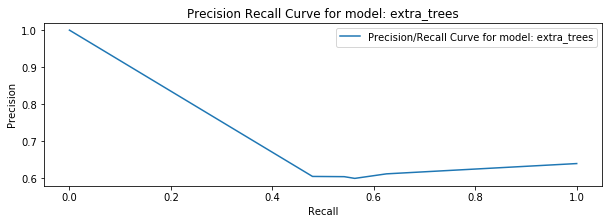

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.212546
Grid Search Best parameters  {'gaussian_process__max_iter_predict': 200}
Grid Search Best score  0.7632075266003839
Code block 'training' took(HH:MM:SS): 0:00:00.137398
Code block 'testing' took(HH:MM:SS): 0:00:00.001746
F1 score 0.7108571428571429
Classification report  
               precision    recall  f1-score   support

           0       0.56      0.89      0.69        27
           1       0.91      0.60      0.72        48

   micro avg       0.71      0.71      0.71        75
   macro avg       0.73      0.75      0.71        75
weighted avg       0.78      0.71      0.71        75



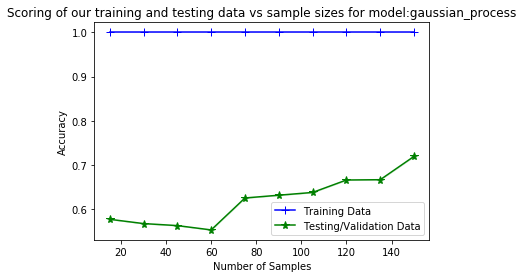

Confusion matrix, without normalization
[[24  3]
 [19 29]]


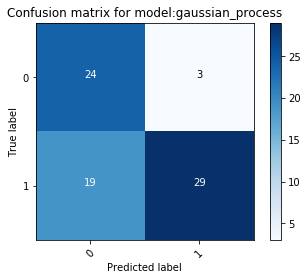

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.790005
inside decision function


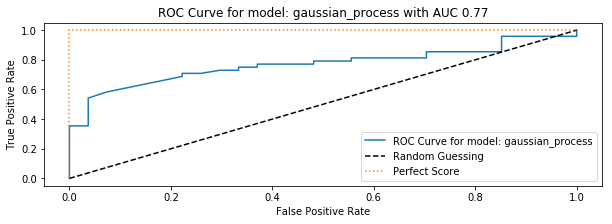

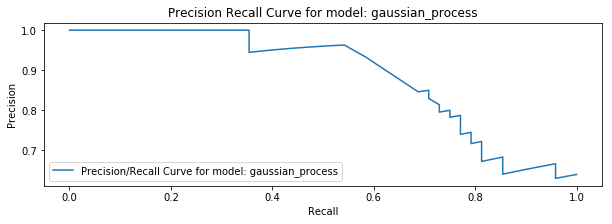

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.243839
Grid Search Best parameters  {'bernoulli__alpha': 0.2}
Grid Search Best score  0.8927263212977499
Code block 'training' took(HH:MM:SS): 0:00:00.049007
Code block 'testing' took(HH:MM:SS): 0:00:00.001103
F1 score 0.7866666666666666
Classification report  
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        27
           1       0.83      0.83      0.83        48

   micro avg       0.79      0.79      0.79        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.79      0.79      0.79        75



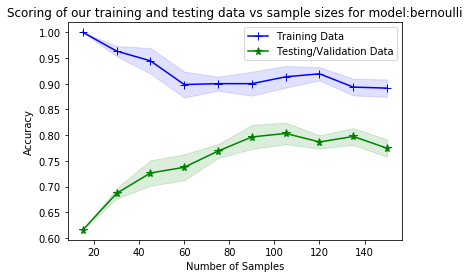

Confusion matrix, without normalization
[[19  8]
 [ 8 40]]


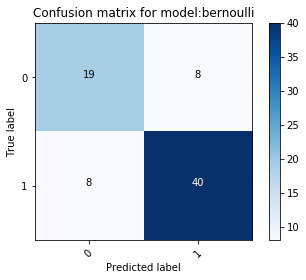

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.343498
inside decision function


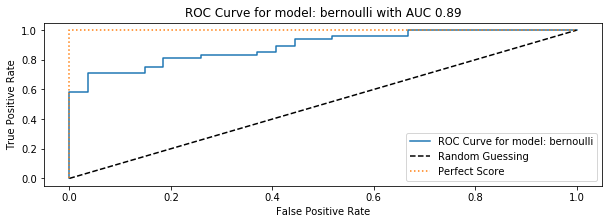

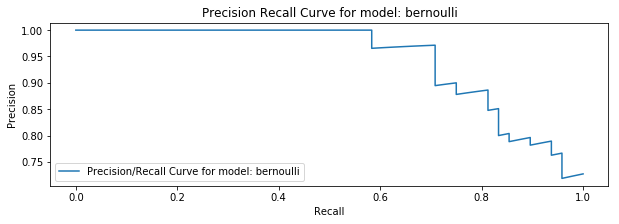

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.216679
Grid Search Best parameters  {'bagging_logistic__base_estimator__C': 2.2, 'bagging_logistic__base_estimator__penalty': 'l1', 'bagging_logistic__n_estimators': 10}
Grid Search Best score  0.945174864817722
Code block 'training' took(HH:MM:SS): 0:00:01.922211
Code block 'testing' took(HH:MM:SS): 0:00:00.002600
F1 score 0.8426666666666666
Classification report  
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.93      0.81      0.87        48

   micro avg       0.84      0.84      0.84        75
   macro avg       0.83      0.85      0.83        75
weighted avg       0.86      0.84      0.84        75



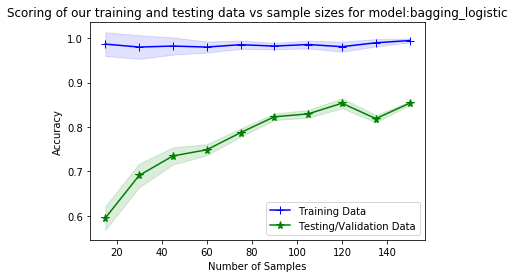

Confusion matrix, without normalization
[[24  3]
 [ 9 39]]


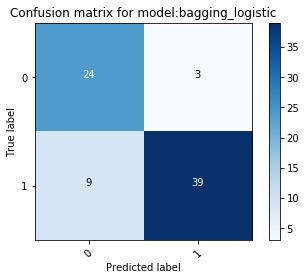

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.808320
inside decision function


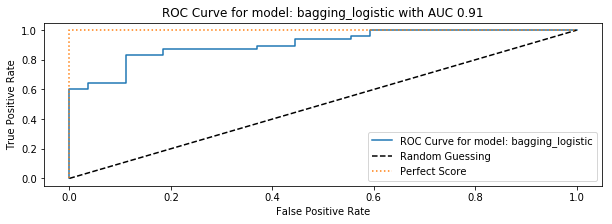

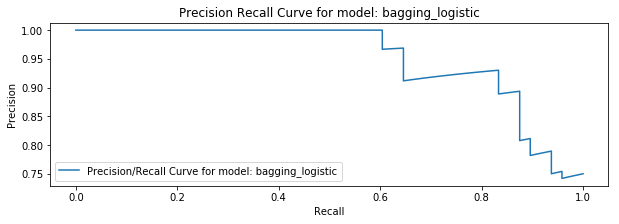

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.291706
Grid Search Best parameters  {'bagging_bernoulli__base_estimator__alpha': 4, 'bagging_bernoulli__n_estimators': 8}
Grid Search Best score  0.9001013867085296
Code block 'training' took(HH:MM:SS): 0:00:00.744554
Code block 'testing' took(HH:MM:SS): 0:00:00.003781
F1 score 0.8096
Classification report  
               precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.83      0.90      0.86        48

   micro avg       0.81      0.81      0.81        75
   macro avg       0.80      0.78      0.79        75
weighted avg       0.81      0.81      0.81        75



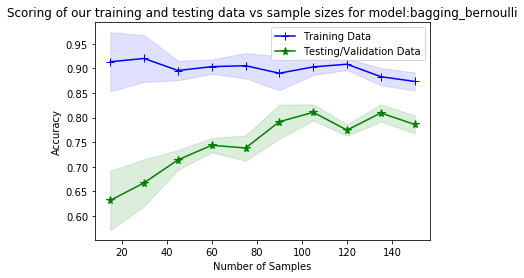

Confusion matrix, without normalization
[[18  9]
 [ 5 43]]


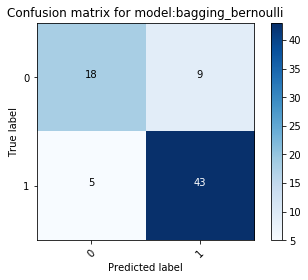

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.242230
inside decision function


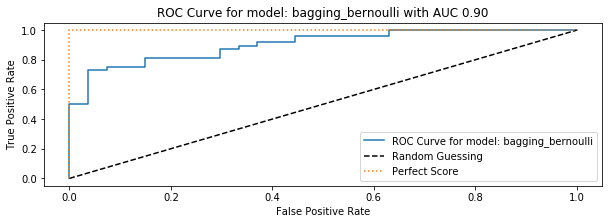

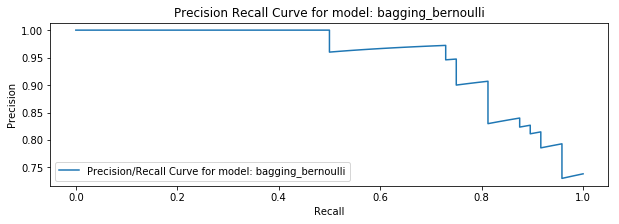

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.216150
Code block 'overalltime' took(HH:MM:SS): 0:00:17.919472
17919.471570938185


In [234]:
response1 = execute(
        _x_train_tomek,
        _y_train_tomek,
        x_test,
        y_test,
        classifiers,
        classifier_names,
        classifier_param_grid,
        cv=cv,
        score=score,
        scaler=None)

In [235]:
results = panda.DataFrame(response1).transpose()
results.head()
results[['f1_score',
         'f1_score_macro',
         'f1_score_micro',
         'learning_curve_time',
         'roc_auc_score',
         'testing_time',
         'training_time',
        ]]\
.sort_values(by=['roc_auc_score',],ascending=False)

f1_score f1_score_macro f1_score_micro  \
logisticregression_liblinear_l2  0.817064        0.80923       0.813333   
logisticregression               0.862255       0.846814       0.866667   
logisticregression_newton_cg     0.862255       0.846814       0.866667   
logisticregression_sag           0.862255       0.846814       0.866667   
bagging_logistic                 0.842667       0.833333           0.84   
bagging_bernoulli                  0.8096           0.79       0.813333   
bernoulli                        0.786667       0.768519       0.786667   
randomforestclassifier           0.763058       0.747001           0.76   
kneighborsclassifier             0.685624       0.677188           0.68   
gaussian_process                 0.710857       0.705357       0.706667   
decisiontreeclassifier           0.526857       0.517857           0.52   
extra_trees                      0.485297       0.448217           0.48   
perceptron                       0.803941       0.794745            0.8   
ridge                            0.738416       0.725073       0.733333   
linear_svc                       0.829249       0.818402       0.826667   
gamma_svc                        0.499512       0.390244           0.64   

                                learning_curve_time roc_auc_score  \
logisticregression_liblinear_l2             330.571      0.931327   
logisticregression                          457.327      0.928241   
logisticregression_newton_cg                619.588      0.928241   
logisticregression_sag                      406.595      0.928241   
bagging_logistic                            1808.32      0.907407   
bagging_bernoulli                           1242.23      0.902778   
bernoulli                                   343.498      0.890432   
randomforestclassifier                      1250.71      0.796296   
kneighborsclassifier                        520.127      0.790895   
gaussian_process                            790.005      0.768904   
decisiontreeclassifier                      328.039      0.523148   
extra_trees                                  361.75       0.45409   
perceptron                                   339.51             0   
ridge                                       404.127             0   
linear_svc                                  374.081             0   
gamma_svc                                   423.486             0   

                                testing_time training_time  
logisticregression_liblinear_l2     0.529066       97.5251  
logisticregression                  0.530773       675.344  
logisticregression_newton_cg        0.919893        182.87  
logisticregression_sag              0.592213       211.075  
bagging_logistic                     2.60039       1922.21  
bagging_bernoulli                     3.7814       744.554  
bernoulli                            1.10251       49.0069  
randomforestclassifier               1.43872       334.806  
kneighborsclassifier                 2.01785       81.3186  
gaussian_process                     1.74649       137.398  
decisiontreeclassifier              0.515982        238.24  
extra_trees                         0.658204       83.0514  
perceptron                           0.90567       52.6791  
ridge                                0.72647       144.822  
linear_svc                          0.967679       24.8121  
gamma_svc                             1.3221       112.982

Grid Search Best parameters  {'perceptron__eta0': 0.1, 'perceptron__max_iter': 5}
Grid Search Best score  0.9408004842787452
Code block 'training' took(HH:MM:SS): 0:00:00.066205
Code block 'testing' took(HH:MM:SS): 0:00:00.001052
F1 score 0.8036102412967397
Classification report  
               precision    recall  f1-score   support

           0       0.68      0.85      0.75        27
           1       0.90      0.77      0.83        48

   micro avg       0.80      0.80      0.80        75
   macro avg       0.79      0.81      0.79        75
weighted avg       0.82      0.80      0.80        75



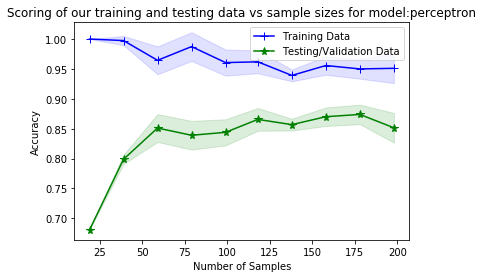

Confusion matrix, without normalization
[[23  4]
 [11 37]]


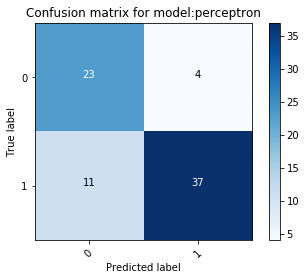

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.372662
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000026
Grid Search Best parameters  {'logisticregression__C': 0.02, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Grid Search Best score  0.9612220916568741
Code block 'training' took(HH:MM:SS): 0:00:01.017480
Code block 'testing' took(HH:MM:SS): 0:00:00.000527
F1 score 0.7909302325581397
Classification report  
               precision    recall  f1-score   support

           0       0.65      0.89      0.75        27
           1       0.92      0.73      0.81        48

   micro avg       0.79      0.79      0.79        75
   macro avg       0.78      0.81      0.78        75
weighted avg       0.82      0.79      0.79        75



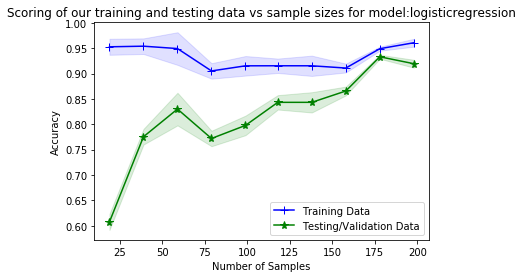

Confusion matrix, without normalization
[[24  3]
 [13 35]]


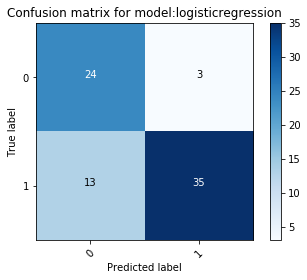

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.619247
inside decision function


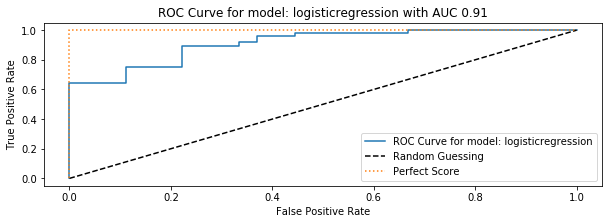

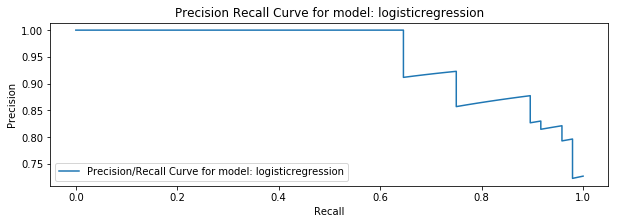

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.230542
Grid Search Best parameters  {'logisticregression_liblinear_l2__C': 0.01, 'logisticregression_liblinear_l2__dual': True, 'logisticregression_liblinear_l2__penalty': 'l2'}
Grid Search Best score  0.9604208952035038
Code block 'training' took(HH:MM:SS): 0:00:00.144210
Code block 'testing' took(HH:MM:SS): 0:00:00.000528
F1 score 0.7646753246753247
Classification report  
               precision    recall  f1-score   support

           0       0.62      0.89      0.73        27
           1       0.92      0.69      0.79        48

   micro avg       0.76      0.76      0.76        75
   macro avg       0.77      0.79      0.76        75
weighted avg       0.81      0.76      0.76        75



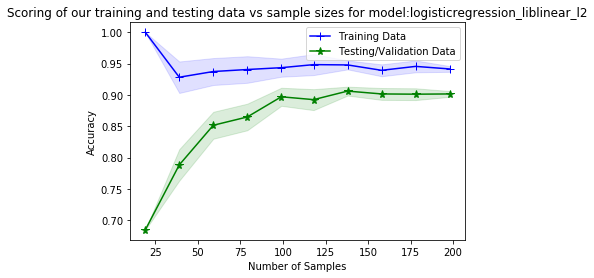

Confusion matrix, without normalization
[[24  3]
 [15 33]]


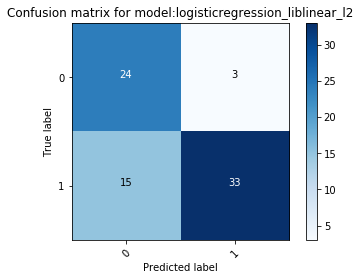

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.441892
inside decision function


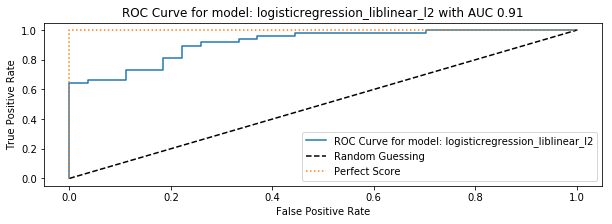

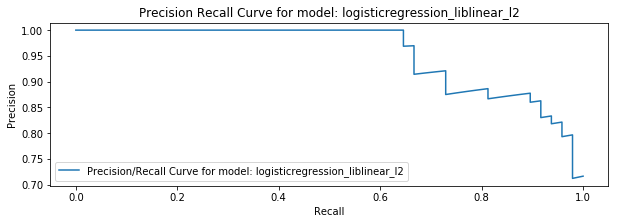

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.229414
Grid Search Best parameters  {'logisticregression_newton_cg__C': 0.02, 'logisticregression_newton_cg__penalty': 'l2'}
Grid Search Best score  0.9612220916568741
Code block 'training' took(HH:MM:SS): 0:00:00.248673
Code block 'testing' took(HH:MM:SS): 0:00:00.000539
F1 score 0.7909302325581397
Classification report  
               precision    recall  f1-score   support

           0       0.65      0.89      0.75        27
           1       0.92      0.73      0.81        48

   micro avg       0.79      0.79      0.79        75
   macro avg       0.78      0.81      0.78        75
weighted avg       0.82      0.79      0.79        75



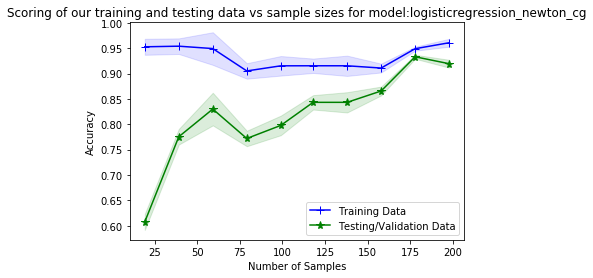

Confusion matrix, without normalization
[[24  3]
 [13 35]]


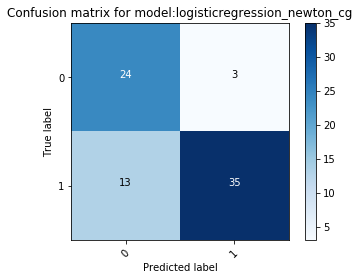

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.688089
inside decision function


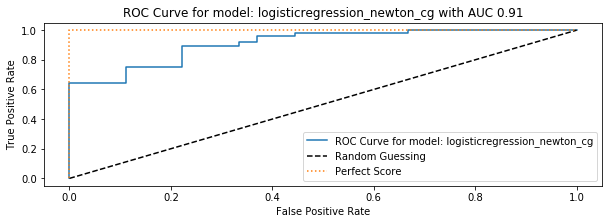

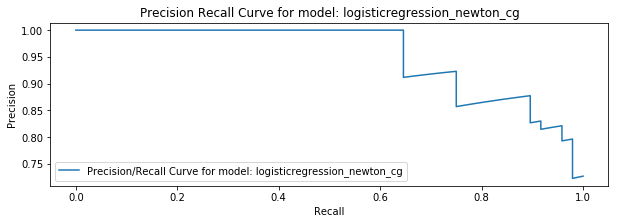

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.221220
Grid Search Best parameters  {'logisticregression_sag__C': 0.02, 'logisticregression_sag__penalty': 'l2'}
Grid Search Best score  0.9612220916568741
Code block 'training' took(HH:MM:SS): 0:00:00.279975
Code block 'testing' took(HH:MM:SS): 0:00:00.000637
F1 score 0.7909302325581397
Classification report  
               precision    recall  f1-score   support

           0       0.65      0.89      0.75        27
           1       0.92      0.73      0.81        48

   micro avg       0.79      0.79      0.79        75
   macro avg       0.78      0.81      0.78        75
weighted avg       0.82      0.79      0.79        75



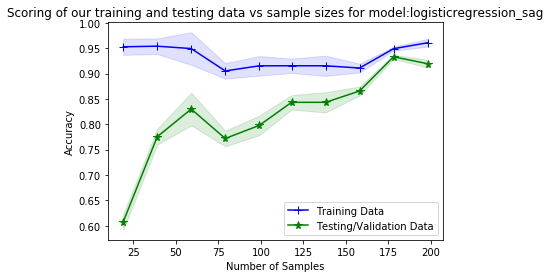

Confusion matrix, without normalization
[[24  3]
 [13 35]]


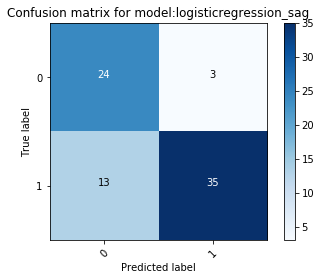

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.520140
inside decision function


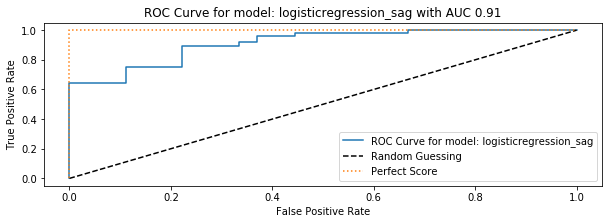

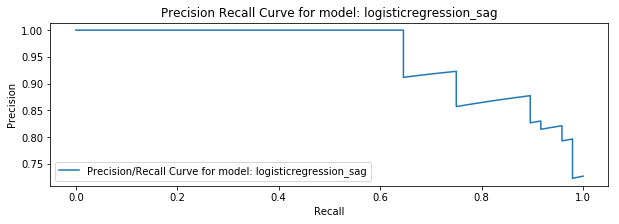

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.227203
Grid Search Best parameters  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': 'sqrt'}
Grid Search Best score  0.7467239967239966
Code block 'training' took(HH:MM:SS): 0:00:00.259835
Code block 'testing' took(HH:MM:SS): 0:00:00.000765
F1 score 0.5787706146926537
Classification report  
               precision    recall  f1-score   support

           0       0.42      0.48      0.45        27
           1       0.68      0.62      0.65        48

   micro avg       0.57      0.57      0.57        75
   macro avg       0.55      0.55      0.55        75
weighted avg       0.59      0.57      0.58        75



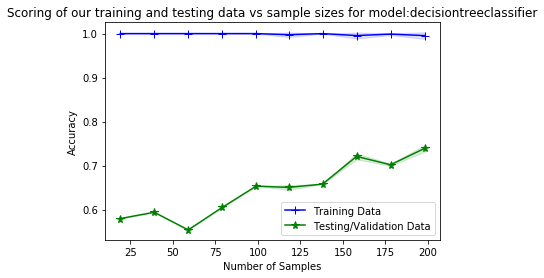

Confusion matrix, without normalization
[[13 14]
 [18 30]]


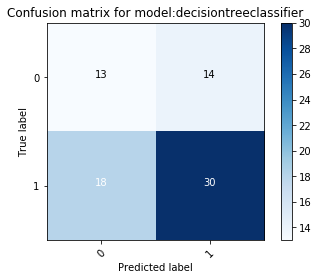

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.374575
inside decision function


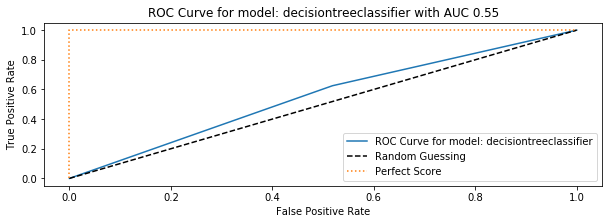

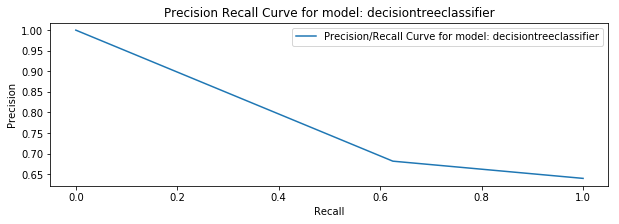

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.290338
Grid Search Best parameters  {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 12}
Grid Search Best score  0.9093935833066267
Code block 'training' took(HH:MM:SS): 0:00:00.394137
Code block 'testing' took(HH:MM:SS): 0:00:00.001705
F1 score 0.6853333333333335
Classification report  
               precision    recall  f1-score   support

           0       0.55      0.67      0.60        27
           1       0.79      0.69      0.73        48

   micro avg       0.68      0.68      0.68        75
   macro avg       0.67      0.68      0.67        75
weighted avg       0.70      0.68      0.69        75



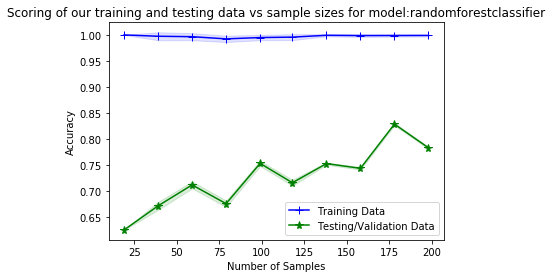

Confusion matrix, without normalization
[[18  9]
 [15 33]]


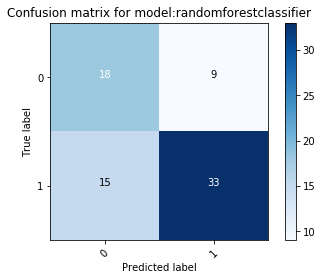

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.431604
inside decision function


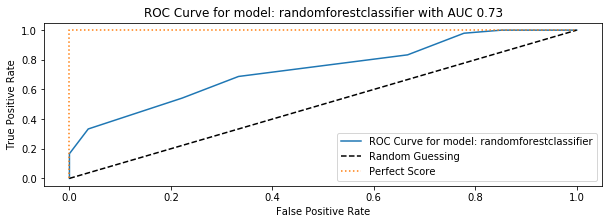

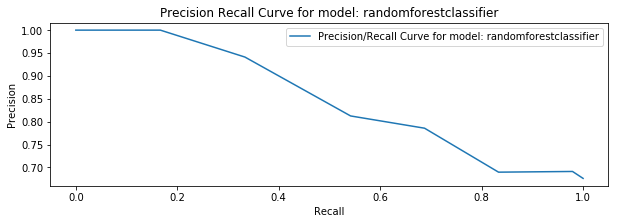

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.228766
Grid Search Best parameters  {'kneighborsclassifier__n_neighbors': 10}
Grid Search Best score  0.8268703486094791
Code block 'training' took(HH:MM:SS): 0:00:00.109576
Code block 'testing' took(HH:MM:SS): 0:00:00.002188
F1 score 0.2716577540106952
Classification report  
               precision    recall  f1-score   support

           0       0.38      1.00      0.55        27
           1       1.00      0.06      0.12        48

   micro avg       0.40      0.40      0.40        75
   macro avg       0.69      0.53      0.33        75
weighted avg       0.78      0.40      0.27        75



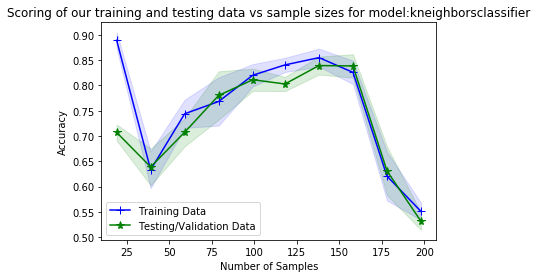

Confusion matrix, without normalization
[[27  0]
 [45  3]]


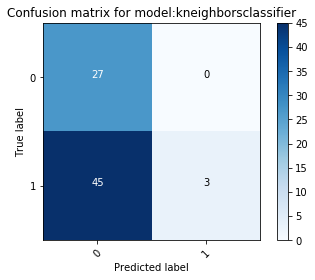

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.635540
inside decision function


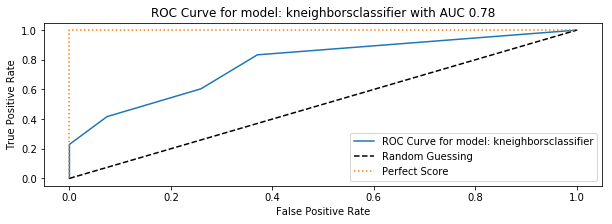

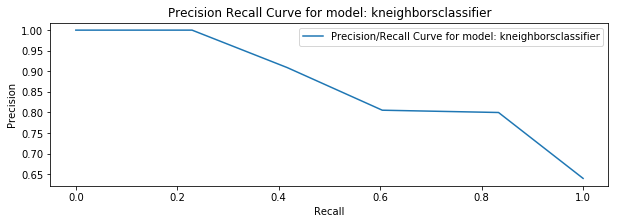

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.232962
Grid Search Best parameters  {'ridge__alpha': 1, 'ridge__max_iter': 100}
Grid Search Best score  0.9386105473061996
Code block 'training' took(HH:MM:SS): 0:00:00.149508
Code block 'testing' took(HH:MM:SS): 0:00:00.000528
F1 score 0.7255172413793103
Classification report  
               precision    recall  f1-score   support

           0       0.58      0.78      0.67        27
           1       0.85      0.69      0.76        48

   micro avg       0.72      0.72      0.72        75
   macro avg       0.71      0.73      0.71        75
weighted avg       0.75      0.72      0.73        75



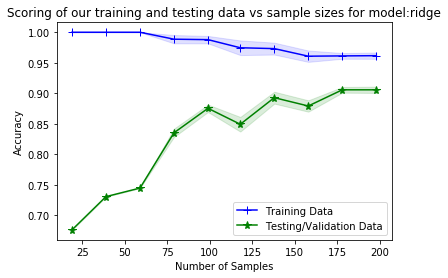

Confusion matrix, without normalization
[[21  6]
 [15 33]]


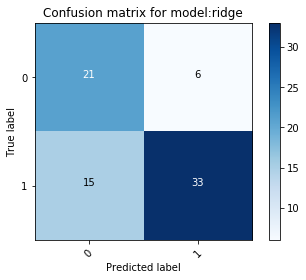

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.409622
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000015
Grid Search Best parameters  {'linear_svc__C': 0.025}
Grid Search Best score  0.948153687284122
Code block 'training' took(HH:MM:SS): 0:00:00.028917
Code block 'testing' took(HH:MM:SS): 0:00:00.001518
F1 score 0.8036102412967397
Classification report  
               precision    recall  f1-score   support

           0       0.68      0.85      0.75        27
           1       0.90      0.77      0.83        48

   micro avg       0.80      0.80      0.80        75
   macro avg       0.79      0.81      0.79        75
weighted avg       0.82      0.80      0.80        75



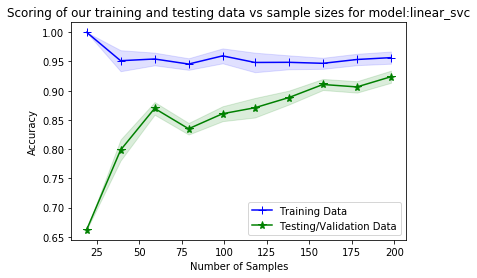

Confusion matrix, without normalization
[[23  4]
 [11 37]]


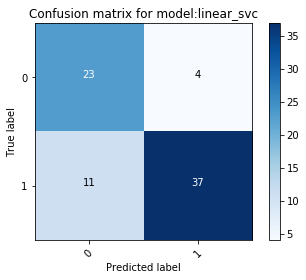

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.480879
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000017
Grid Search Best parameters  {'gamma_svc__C': 5, 'gamma_svc__gamma': 2}
Grid Search Best score  0.7837837837837838
Code block 'training' took(HH:MM:SS): 0:00:00.170634
Code block 'testing' took(HH:MM:SS): 0:00:00.001565
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



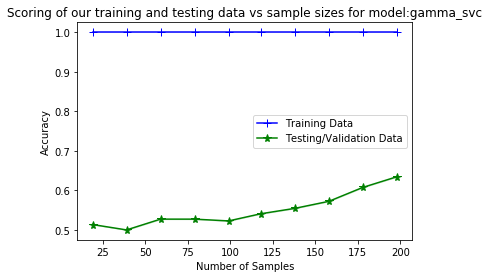

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


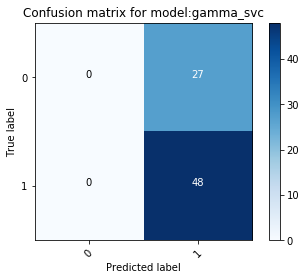

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.548711
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000015
Grid Search Best parameters  {'extra_trees__criterion': 'entropy', 'extra_trees__max_depth': 8}
Grid Search Best score  0.7299878930313713
Code block 'training' took(HH:MM:SS): 0:00:00.079467
Code block 'testing' took(HH:MM:SS): 0:00:00.000572
F1 score 0.6192
Classification report  
               precision    recall  f1-score   support

           0       0.48      0.41      0.44        27
           1       0.69      0.75      0.72        48

   micro avg       0.63      0.63      0.63        75
   macro avg       0.59      0.58      0.58        75
weighted avg       0.62      0.63      0.62        75



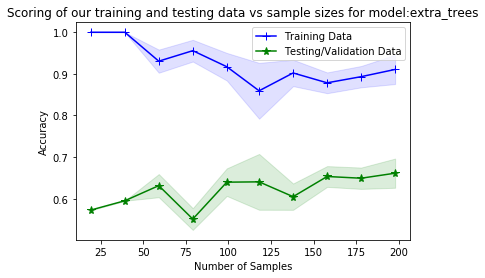

Confusion matrix, without normalization
[[11 16]
 [12 36]]


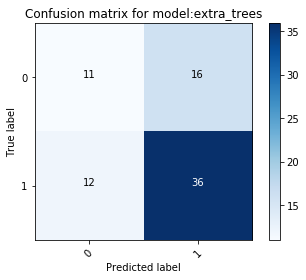

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.313401
inside decision function


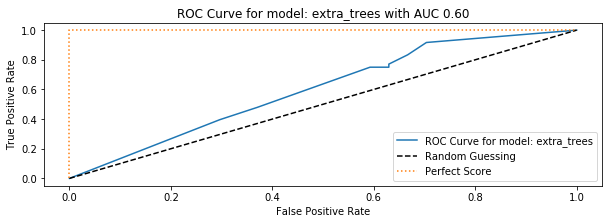

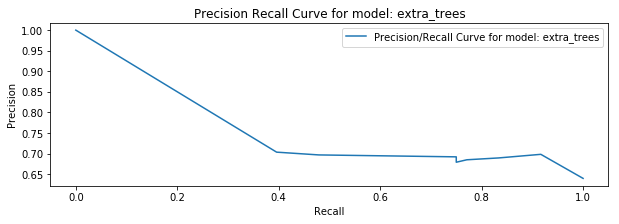

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.234135
Grid Search Best parameters  {'gaussian_process__max_iter_predict': 200}
Grid Search Best score  0.8999305629740412
Code block 'training' took(HH:MM:SS): 0:00:00.182255
Code block 'testing' took(HH:MM:SS): 0:00:00.002331
F1 score 0.5099413489736071
Classification report  
               precision    recall  f1-score   support

           0       0.44      1.00      0.61        27
           1       1.00      0.29      0.45        48

   micro avg       0.55      0.55      0.55        75
   macro avg       0.72      0.65      0.53        75
weighted avg       0.80      0.55      0.51        75



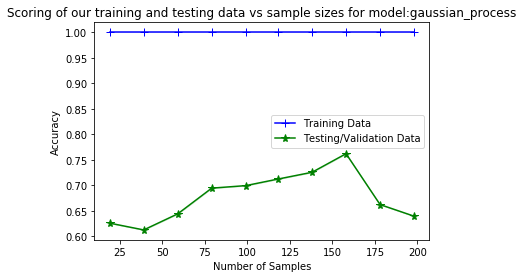

Confusion matrix, without normalization
[[27  0]
 [34 14]]


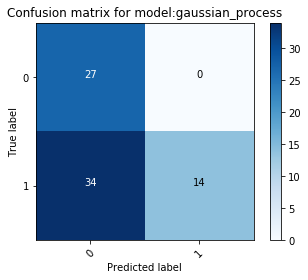

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.933830
inside decision function


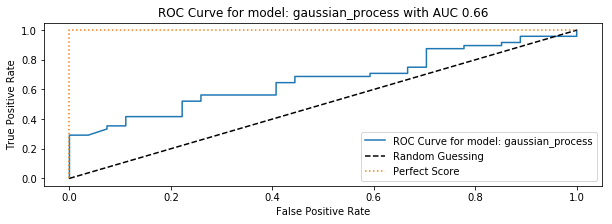

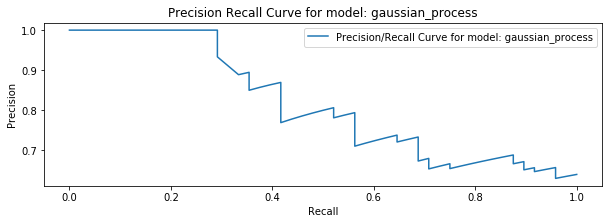

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.255822
Grid Search Best parameters  {'bernoulli__alpha': 0.2}
Grid Search Best score  0.9074172987216467
Code block 'training' took(HH:MM:SS): 0:00:00.050693
Code block 'testing' took(HH:MM:SS): 0:00:00.001073
F1 score 0.777424940136305
Classification report  
               precision    recall  f1-score   support

           0       0.65      0.81      0.72        27
           1       0.88      0.75      0.81        48

   micro avg       0.77      0.77      0.77        75
   macro avg       0.76      0.78      0.77        75
weighted avg       0.79      0.77      0.78        75



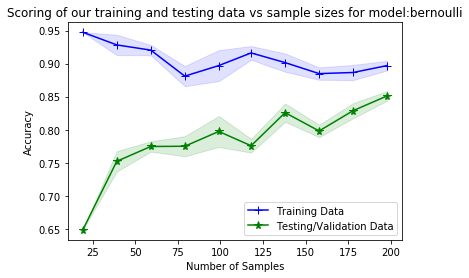

Confusion matrix, without normalization
[[22  5]
 [12 36]]


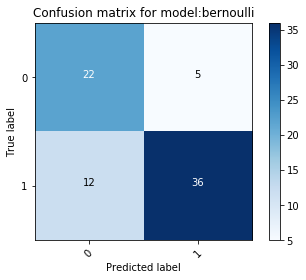

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.351431
inside decision function


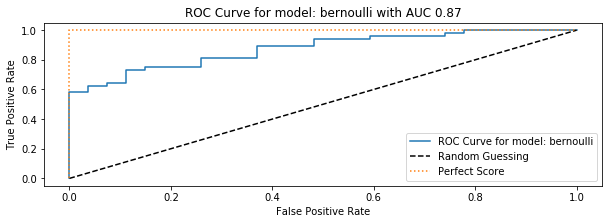

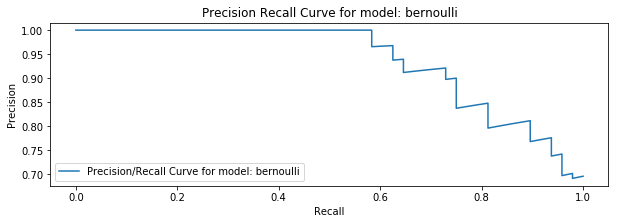

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.279065
Grid Search Best parameters  {'bagging_logistic__base_estimator__C': 1.2, 'bagging_logistic__base_estimator__penalty': 'l1', 'bagging_logistic__n_estimators': 8}
Grid Search Best score  0.9607235694192215
Code block 'training' took(HH:MM:SS): 0:00:02.206867
Code block 'testing' took(HH:MM:SS): 0:00:00.001975
F1 score 0.777846153846154
Classification report  
               precision    recall  f1-score   support

           0       0.63      0.89      0.74        27
           1       0.92      0.71      0.80        48

   micro avg       0.77      0.77      0.77        75
   macro avg       0.78      0.80      0.77        75
weighted avg       0.82      0.77      0.78        75



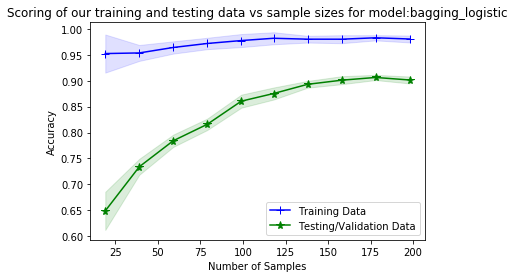

Confusion matrix, without normalization
[[24  3]
 [14 34]]


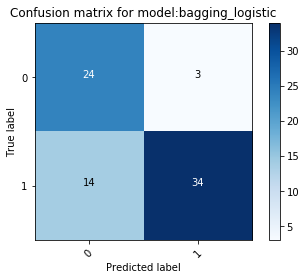

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.747676
inside decision function


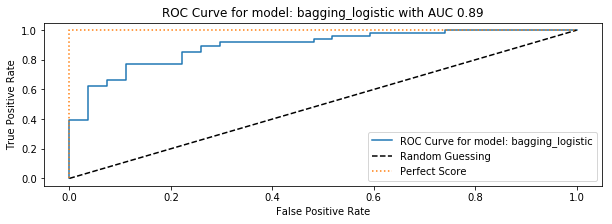

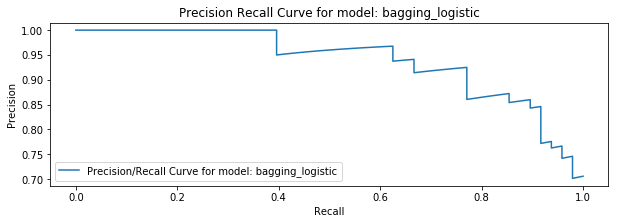

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.226725
Grid Search Best parameters  {'bagging_bernoulli__base_estimator__alpha': 2.2, 'bagging_bernoulli__n_estimators': 8}
Grid Search Best score  0.9106933019976498
Code block 'training' took(HH:MM:SS): 0:00:00.790106
Code block 'testing' took(HH:MM:SS): 0:00:00.003792
F1 score 0.7767107468802386
Classification report  
               precision    recall  f1-score   support

           0       0.66      0.78      0.71        27
           1       0.86      0.77      0.81        48

   micro avg       0.77      0.77      0.77        75
   macro avg       0.76      0.77      0.76        75
weighted avg       0.79      0.77      0.78        75



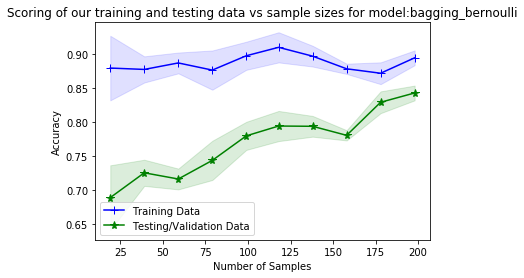

Confusion matrix, without normalization
[[21  6]
 [11 37]]


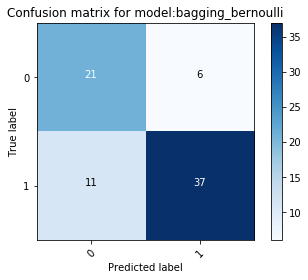

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.275418
inside decision function


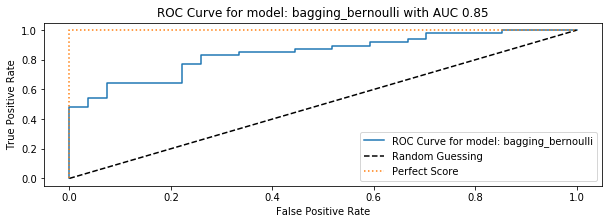

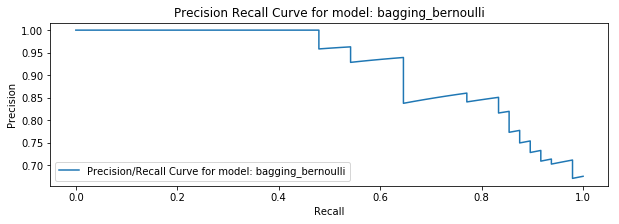

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.227269
Code block 'overalltime' took(HH:MM:SS): 0:00:20.314218
20314.217545201245


In [236]:
response = execute(
        _x_train_smt,
        _y_train_smt ,
        x_test,
        y_test,
        classifiers,
        classifier_names,
        classifier_param_grid,
        cv=cv,
        score=score,
        scaler=None)

In [237]:
results = panda.DataFrame(response).transpose()
results.head()
results[['f1_score',
         'f1_score_macro',
         'f1_score_micro',
         'learning_curve_time',
         'roc_auc_score',
         'testing_time',
         'training_time',
        ]]\
.sort_values(by=['roc_auc_score',],ascending=False)

f1_score f1_score_macro f1_score_micro  \
logisticregression_liblinear_l2  0.764675       0.756494           0.76   
logisticregression                0.79093       0.781977       0.786667   
logisticregression_newton_cg      0.79093       0.781977       0.786667   
logisticregression_sag            0.79093       0.781977       0.786667   
bagging_logistic                 0.777846       0.769231       0.773333   
bernoulli                        0.777425        0.76515       0.773333   
bagging_bernoulli                0.776711       0.762526       0.773333   
kneighborsclassifier             0.271658       0.331551            0.4   
randomforestclassifier           0.685333       0.666667           0.68   
gaussian_process                 0.509941       0.532625       0.546667   
extra_trees                        0.6192           0.58       0.626667   
decisiontreeclassifier           0.578771       0.550225       0.573333   
perceptron                        0.80361        0.79278            0.8   
ridge                            0.725517       0.712644           0.72   
linear_svc                        0.80361        0.79278            0.8   
gamma_svc                        0.499512       0.390244           0.64   

                                learning_curve_time roc_auc_score  \
logisticregression_liblinear_l2             441.892      0.914352   
logisticregression                          619.247      0.910494   
logisticregression_newton_cg                688.089      0.910494   
logisticregression_sag                       520.14      0.910494   
bagging_logistic                            1747.68      0.892747   
bernoulli                                   351.431      0.873457   
bagging_bernoulli                           1275.42      0.845679   
kneighborsclassifier                         635.54      0.775463   
randomforestclassifier                       1431.6      0.734182   
gaussian_process                             933.83      0.662037   
extra_trees                                 313.401      0.601466   
decisiontreeclassifier                      374.575      0.553241   
perceptron                                  372.662             0   
ridge                                       409.622             0   
linear_svc                                  480.879             0   
gamma_svc                                   548.711             0   

                                testing_time training_time  
logisticregression_liblinear_l2     0.528497        144.21  
logisticregression                  0.526791       1017.48  
logisticregression_newton_cg        0.539306       248.673  
logisticregression_sag              0.636586       279.975  
bagging_logistic                     1.97461       2206.87  
bernoulli                            1.07349       50.6925  
bagging_bernoulli                    3.79164       790.106  
kneighborsclassifier                 2.18794       109.576  
randomforestclassifier               1.70496       394.137  
gaussian_process                     2.33074       182.255  
extra_trees                         0.571733       79.4675  
decisiontreeclassifier              0.764586       259.835  
perceptron                           1.05244        66.205  
ridge                               0.528497       149.508  
linear_svc                           1.51779       28.9166  
gamma_svc                            1.56501       170.634

Grid Search Best parameters  {'perceptron__eta0': 0.1, 'perceptron__max_iter': 30}
Grid Search Best score  0.9467108977978543
Code block 'training' took(HH:MM:SS): 0:00:00.070187
Code block 'testing' took(HH:MM:SS): 0:00:00.000931
F1 score 0.7907331378299121
Classification report  
               precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.90      0.75      0.82        48

   micro avg       0.79      0.79      0.79        75
   macro avg       0.78      0.80      0.78        75
weighted avg       0.81      0.79      0.79        75



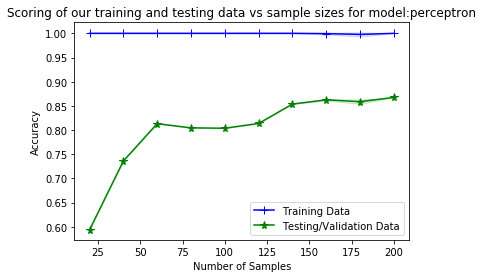

Confusion matrix, without normalization
[[23  4]
 [12 36]]


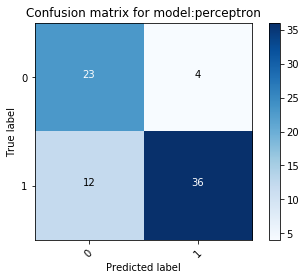

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.473008
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000017
Grid Search Best parameters  {'logisticregression__C': 0.05, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Grid Search Best score  0.9640563241106719
Code block 'training' took(HH:MM:SS): 0:00:01.117681
Code block 'testing' took(HH:MM:SS): 0:00:00.000882
F1 score 0.777799671592775
Classification report  
               precision    recall  f1-score   support

           0       0.64      0.85      0.73        27
           1       0.90      0.73      0.80        48

   micro avg       0.77      0.77      0.77        75
   macro avg       0.77      0.79      0.77        75
weighted avg       0.80      0.77      0.78        75



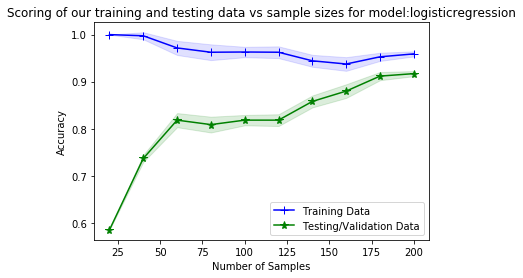

Confusion matrix, without normalization
[[23  4]
 [13 35]]


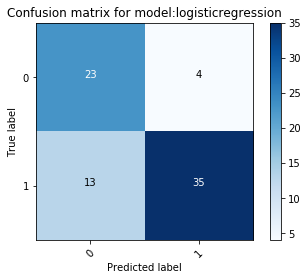

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.743265
inside decision function


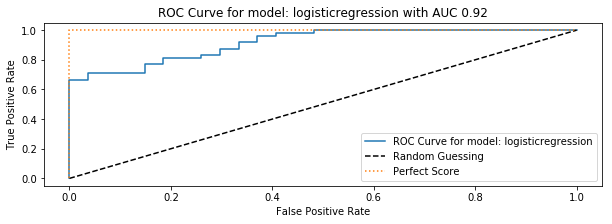

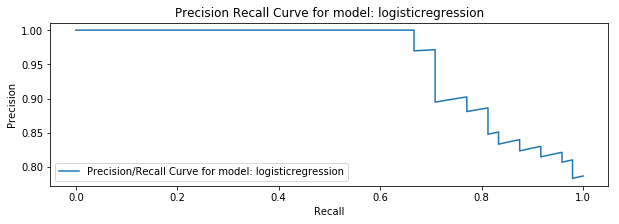

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.224572
Grid Search Best parameters  {'logisticregression_liblinear_l2__C': 0.05, 'logisticregression_liblinear_l2__dual': True, 'logisticregression_liblinear_l2__penalty': 'l2'}
Grid Search Best score  0.9636328345567478
Code block 'training' took(HH:MM:SS): 0:00:00.143799
Code block 'testing' took(HH:MM:SS): 0:00:00.000539
F1 score 0.7908225108225109
Classification report  
               precision    recall  f1-score   support

           0       0.64      0.93      0.76        27
           1       0.94      0.71      0.81        48

   micro avg       0.79      0.79      0.79        75
   macro avg       0.79      0.82      0.78        75
weighted avg       0.84      0.79      0.79        75



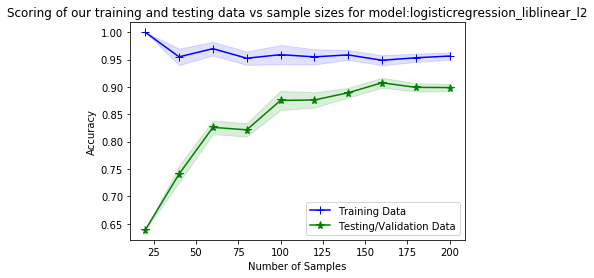

Confusion matrix, without normalization
[[25  2]
 [14 34]]


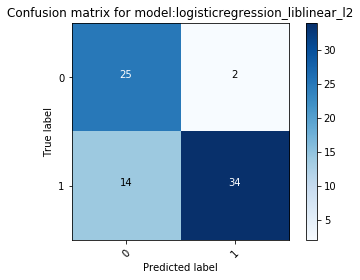

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.394083
inside decision function


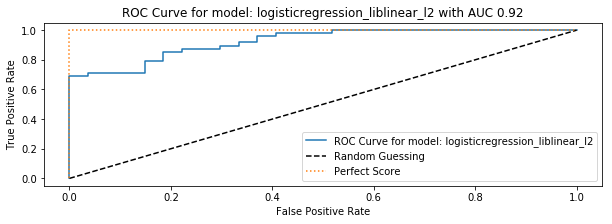

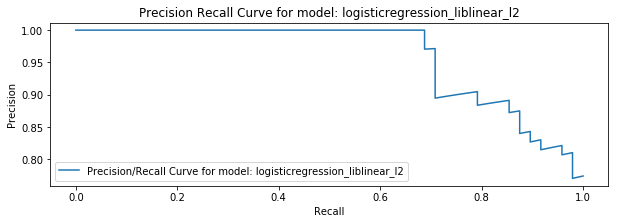

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.231411
Grid Search Best parameters  {'logisticregression_newton_cg__C': 0.05, 'logisticregression_newton_cg__penalty': 'l2'}
Grid Search Best score  0.9640563241106719
Code block 'training' took(HH:MM:SS): 0:00:00.271543
Code block 'testing' took(HH:MM:SS): 0:00:00.000531
F1 score 0.777799671592775
Classification report  
               precision    recall  f1-score   support

           0       0.64      0.85      0.73        27
           1       0.90      0.73      0.80        48

   micro avg       0.77      0.77      0.77        75
   macro avg       0.77      0.79      0.77        75
weighted avg       0.80      0.77      0.78        75



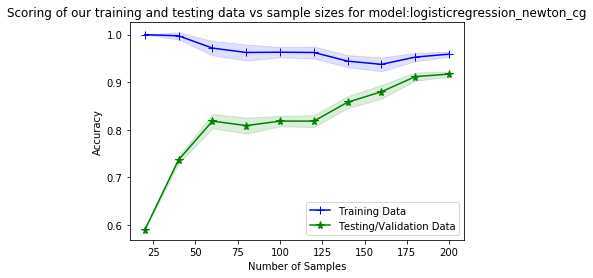

Confusion matrix, without normalization
[[23  4]
 [13 35]]


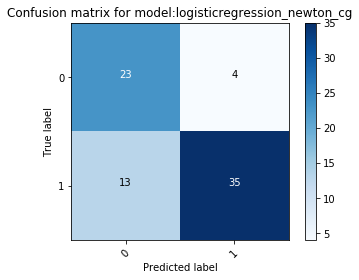

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.775096
inside decision function


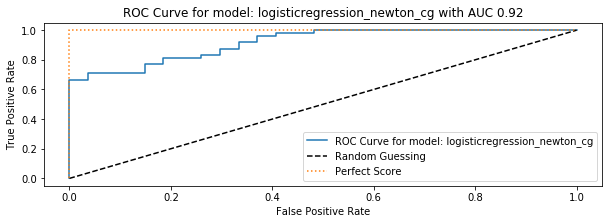

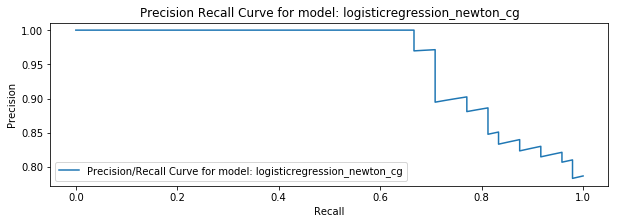

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.238225
Grid Search Best parameters  {'logisticregression_sag__C': 0.05, 'logisticregression_sag__penalty': 'l2'}
Grid Search Best score  0.9640563241106719
Code block 'training' took(HH:MM:SS): 0:00:00.353607
Code block 'testing' took(HH:MM:SS): 0:00:00.000534
F1 score 0.777799671592775
Classification report  
               precision    recall  f1-score   support

           0       0.64      0.85      0.73        27
           1       0.90      0.73      0.80        48

   micro avg       0.77      0.77      0.77        75
   macro avg       0.77      0.79      0.77        75
weighted avg       0.80      0.77      0.78        75



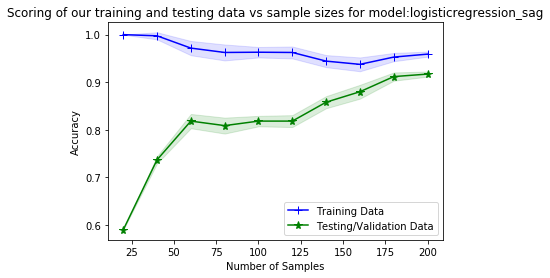

Confusion matrix, without normalization
[[23  4]
 [13 35]]


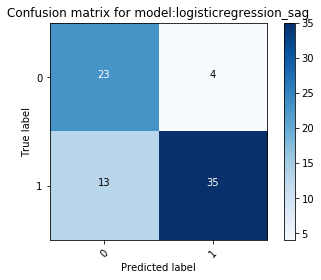

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.546718
inside decision function


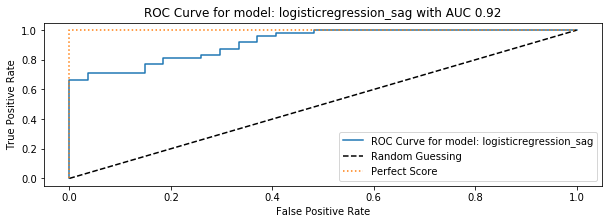

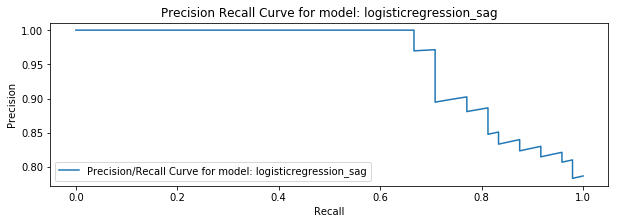

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.287652
Grid Search Best parameters  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__max_features': 'auto'}
Grid Search Best score  0.7846555618294749
Code block 'training' took(HH:MM:SS): 0:00:00.281221
Code block 'testing' took(HH:MM:SS): 0:00:00.000559
F1 score 0.5557267441860464
Classification report  
               precision    recall  f1-score   support

           0       0.41      0.56      0.47        27
           1       0.68      0.54      0.60        48

   micro avg       0.55      0.55      0.55        75
   macro avg       0.54      0.55      0.54        75
weighted avg       0.58      0.55      0.56        75



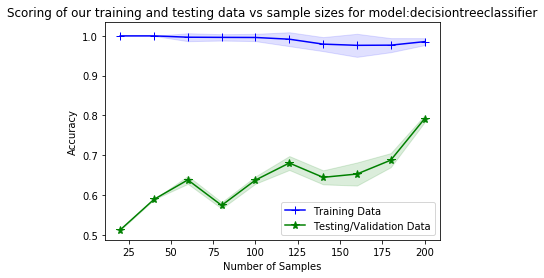

Confusion matrix, without normalization
[[15 12]
 [22 26]]


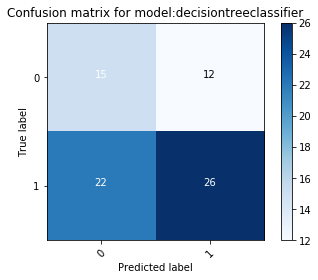

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.364439
inside decision function


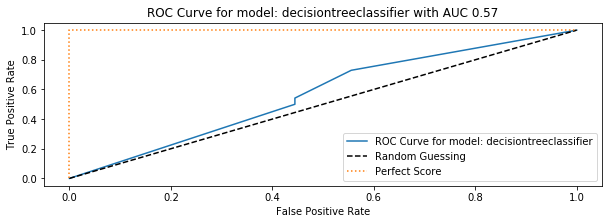

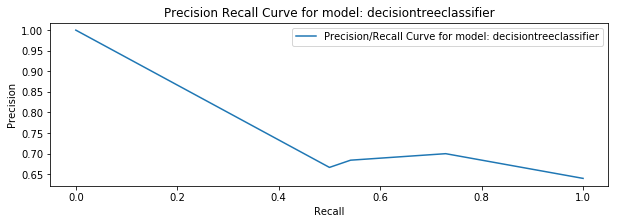

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.231845
Grid Search Best parameters  {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 12}
Grid Search Best score  0.930777103331451
Code block 'training' took(HH:MM:SS): 0:00:00.380606
Code block 'testing' took(HH:MM:SS): 0:00:00.001797
F1 score 0.5943966912425823
Classification report  
               precision    recall  f1-score   support

           0       0.45      0.67      0.54        27
           1       0.74      0.54      0.63        48

   micro avg       0.59      0.59      0.59        75
   macro avg       0.60      0.60      0.58        75
weighted avg       0.64      0.59      0.59        75



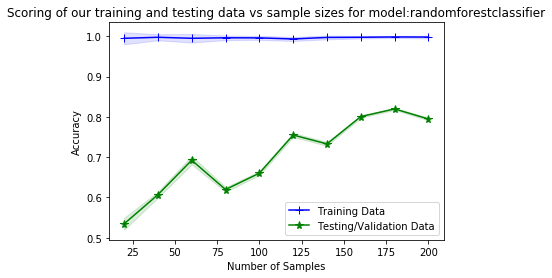

Confusion matrix, without normalization
[[18  9]
 [22 26]]


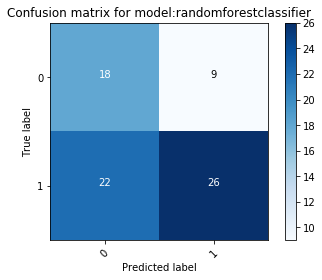

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.426207
inside decision function


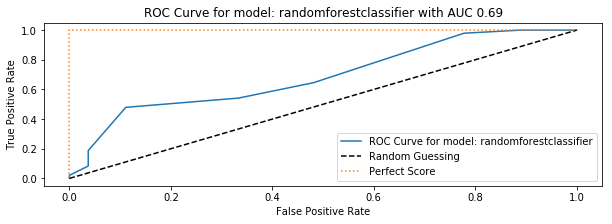

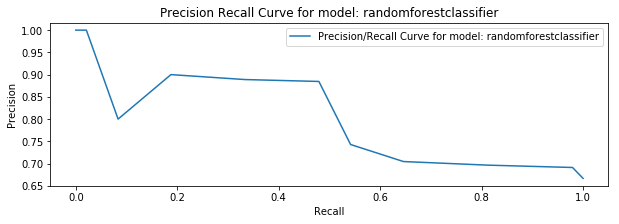

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.233390
Grid Search Best parameters  {'kneighborsclassifier__n_neighbors': 10}
Grid Search Best score  0.8572928430265386
Code block 'training' took(HH:MM:SS): 0:00:00.100963
Code block 'testing' took(HH:MM:SS): 0:00:00.002321
F1 score 0.2185976965043443
Classification report  
               precision    recall  f1-score   support

           0       0.36      1.00      0.53        27
           1       1.00      0.02      0.04        48

   micro avg       0.37      0.37      0.37        75
   macro avg       0.68      0.51      0.29        75
weighted avg       0.77      0.37      0.22        75



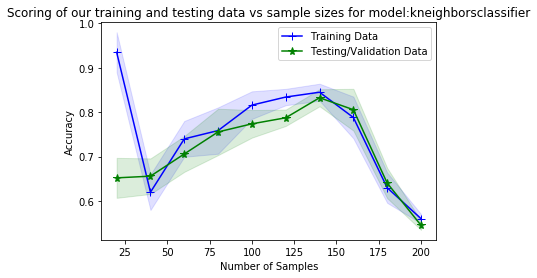

Confusion matrix, without normalization
[[27  0]
 [47  1]]


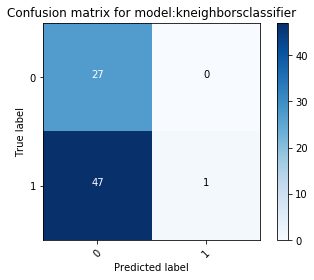

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.612953
inside decision function


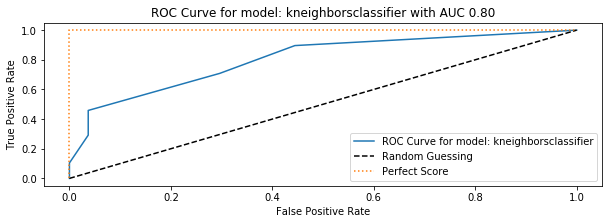

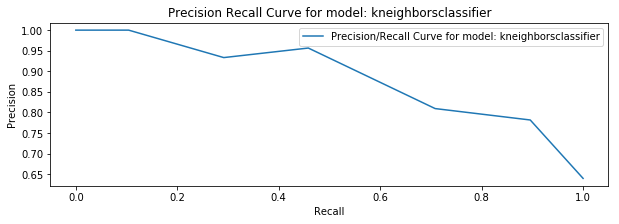

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.228665
Grid Search Best parameters  {'ridge__alpha': 1, 'ridge__max_iter': 100}
Grid Search Best score  0.9395468661773011
Code block 'training' took(HH:MM:SS): 0:00:00.148748
Code block 'testing' took(HH:MM:SS): 0:00:00.000522
F1 score 0.7125290697674419
Classification report  
               precision    recall  f1-score   support

           0       0.57      0.78      0.66        27
           1       0.84      0.67      0.74        48

   micro avg       0.71      0.71      0.71        75
   macro avg       0.70      0.72      0.70        75
weighted avg       0.74      0.71      0.71        75



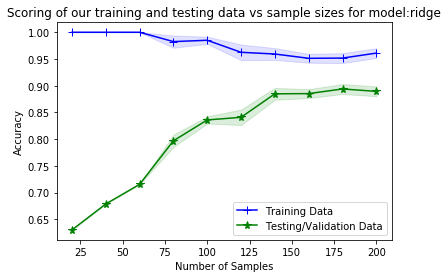

Confusion matrix, without normalization
[[21  6]
 [16 32]]


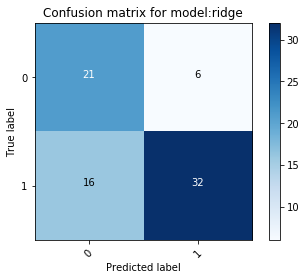

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.471182
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000015
Grid Search Best parameters  {'linear_svc__C': 0.025}
Grid Search Best score  0.9566981931112367
Code block 'training' took(HH:MM:SS): 0:00:00.029646
Code block 'testing' took(HH:MM:SS): 0:00:00.002878
F1 score 0.7516584564860426
Classification report  
               precision    recall  f1-score   support

           0       0.61      0.81      0.70        27
           1       0.87      0.71      0.78        48

   micro avg       0.75      0.75      0.75        75
   macro avg       0.74      0.76      0.74        75
weighted avg       0.78      0.75      0.75        75



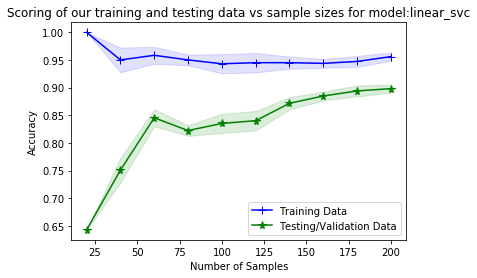

Confusion matrix, without normalization
[[22  5]
 [14 34]]


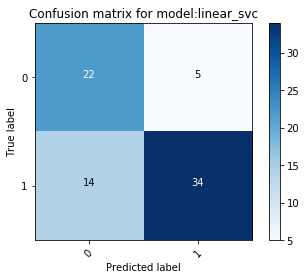

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.430422
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000018
Grid Search Best parameters  {'gamma_svc__C': 1, 'gamma_svc__gamma': 2}
Grid Search Best score  0.8526785714285714
Code block 'training' took(HH:MM:SS): 0:00:00.169153
Code block 'testing' took(HH:MM:SS): 0:00:00.001584
F1 score 0.49951219512195116
Classification report  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      1.00      0.78        48

   micro avg       0.64      0.64      0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



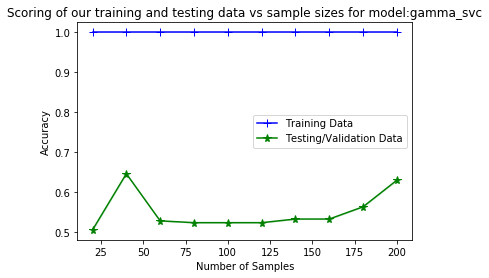

Confusion matrix, without normalization
[[ 0 27]
 [ 0 48]]


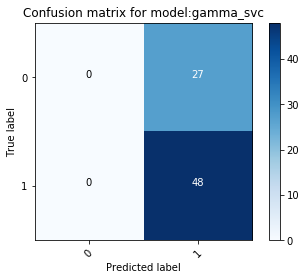

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.556877
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000020
Grid Search Best parameters  {'extra_trees__criterion': 'entropy', 'extra_trees__max_depth': 12}
Grid Search Best score  0.7918195934500282
Code block 'training' took(HH:MM:SS): 0:00:00.117134
Code block 'testing' took(HH:MM:SS): 0:00:00.000577
F1 score 0.5928254796051406
Classification report  
               precision    recall  f1-score   support

           0       0.44      0.52      0.47        27
           1       0.70      0.62      0.66        48

   micro avg       0.59      0.59      0.59        75
   macro avg       0.57      0.57      0.57        75
weighted avg       0.60      0.59      0.59        75



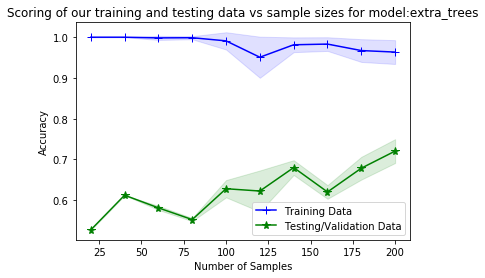

Confusion matrix, without normalization
[[14 13]
 [18 30]]


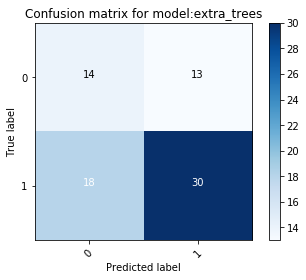

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.332062
inside decision function


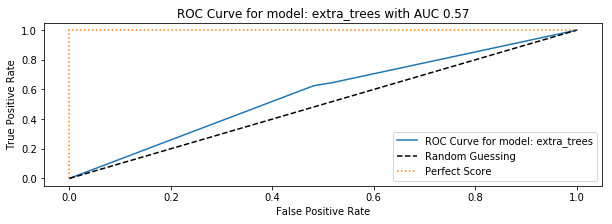

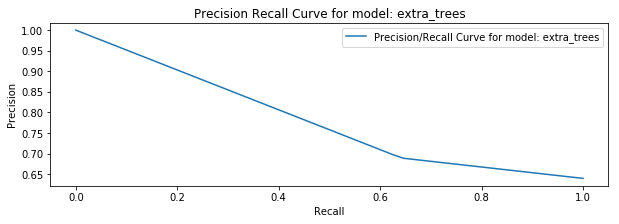

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.202227
Grid Search Best parameters  {'gaussian_process__max_iter_predict': 200}
Grid Search Best score  0.9201545736871823
Code block 'training' took(HH:MM:SS): 0:00:00.185180
Code block 'testing' took(HH:MM:SS): 0:00:00.002339
F1 score 0.5099413489736071
Classification report  
               precision    recall  f1-score   support

           0       0.44      1.00      0.61        27
           1       1.00      0.29      0.45        48

   micro avg       0.55      0.55      0.55        75
   macro avg       0.72      0.65      0.53        75
weighted avg       0.80      0.55      0.51        75



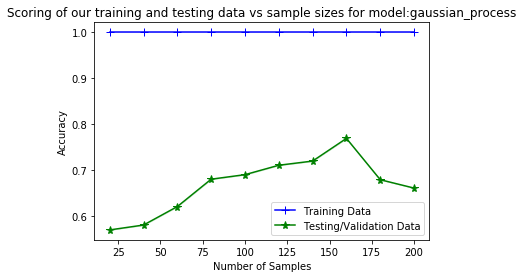

Confusion matrix, without normalization
[[27  0]
 [34 14]]


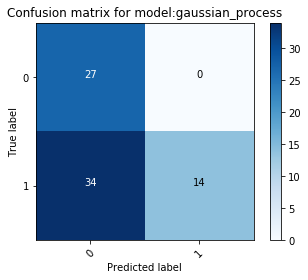

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.978953
inside decision function


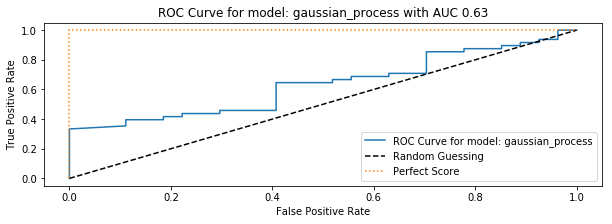

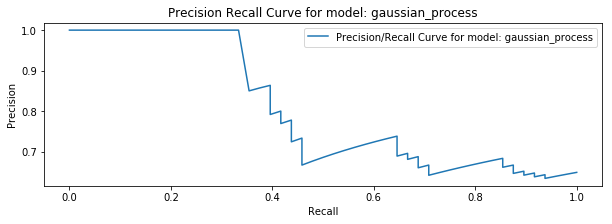

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.242558
Grid Search Best parameters  {'bernoulli__alpha': 0.2}
Grid Search Best score  0.9194840485601355
Code block 'training' took(HH:MM:SS): 0:00:00.049944
Code block 'testing' took(HH:MM:SS): 0:00:00.001050
F1 score 0.8029800707766809
Classification report  
               precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.88      0.79      0.84        48

   micro avg       0.80      0.80      0.80        75
   macro avg       0.79      0.80      0.79        75
weighted avg       0.81      0.80      0.80        75



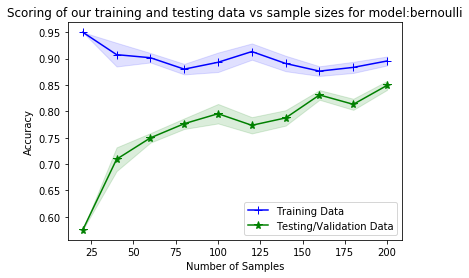

Confusion matrix, without normalization
[[22  5]
 [10 38]]


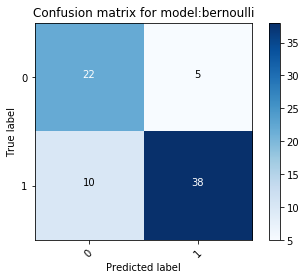

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.409780
inside decision function


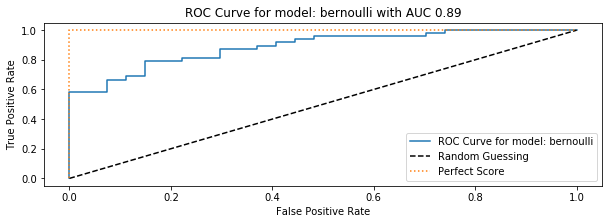

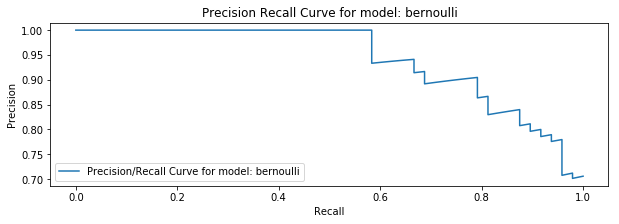

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.219854
Grid Search Best parameters  {'bagging_logistic__base_estimator__C': 4, 'bagging_logistic__base_estimator__penalty': 'l1', 'bagging_logistic__n_estimators': 10}
Grid Search Best score  0.9679030208921512
Code block 'training' took(HH:MM:SS): 0:00:02.267450
Code block 'testing' took(HH:MM:SS): 0:00:00.002578
F1 score 0.8037403344722172
Classification report  
               precision    recall  f1-score   support

           0       0.65      0.96      0.78        27
           1       0.97      0.71      0.82        48

   micro avg       0.80      0.80      0.80        75
   macro avg       0.81      0.84      0.80        75
weighted avg       0.86      0.80      0.80        75



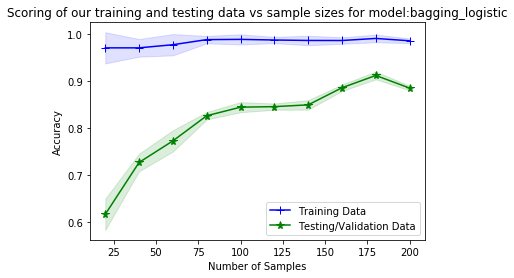

Confusion matrix, without normalization
[[26  1]
 [14 34]]


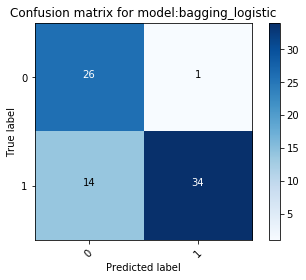

Code block 'learning_curve' took(HH:MM:SS): 0:00:02.401266
inside decision function


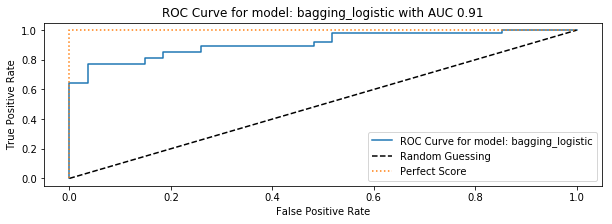

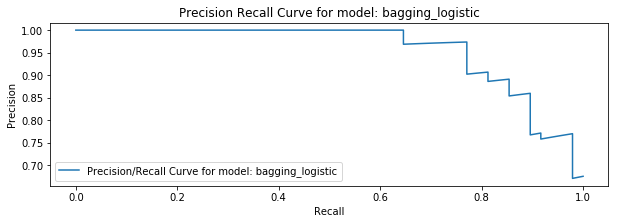

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.228930
Grid Search Best parameters  {'bagging_bernoulli__base_estimator__alpha': 1.2, 'bagging_bernoulli__n_estimators': 10}
Grid Search Best score  0.9228719649915301
Code block 'training' took(HH:MM:SS): 0:00:00.793850
Code block 'testing' took(HH:MM:SS): 0:00:00.003939
F1 score 0.7617325227963526
Classification report  
               precision    recall  f1-score   support

           0       0.66      0.70      0.68        27
           1       0.83      0.79      0.81        48

   micro avg       0.76      0.76      0.76        75
   macro avg       0.74      0.75      0.74        75
weighted avg       0.76      0.76      0.76        75



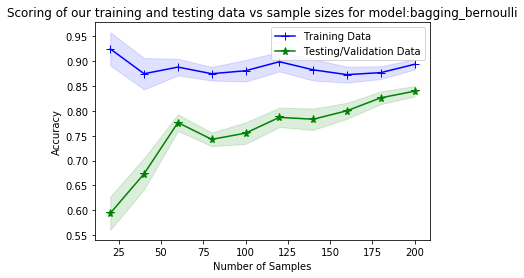

Confusion matrix, without normalization
[[19  8]
 [10 38]]


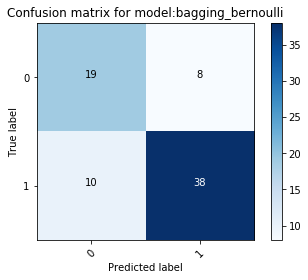

Code block 'learning_curve' took(HH:MM:SS): 0:00:01.511805
inside decision function


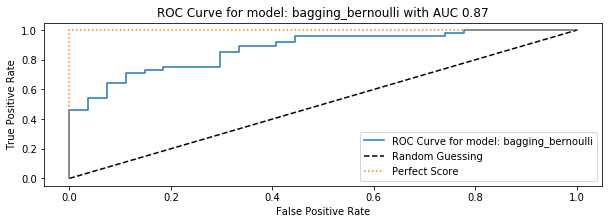

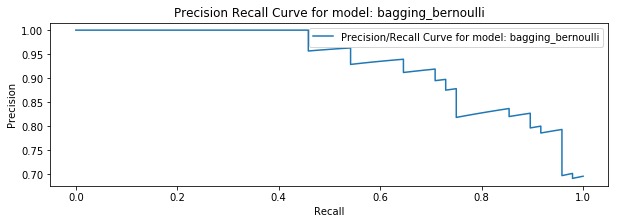

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.226316
Code block 'overalltime' took(HH:MM:SS): 0:00:21.823471
21823.471083971526


In [238]:
response2 = execute(
        x_train_smote,
        y_train_smote ,
        x_test,
        y_test,
        classifiers,
        classifier_names,
        classifier_param_grid,
        cv=cv,
        score=score,
        scaler=None)

In [239]:
results = panda.DataFrame(response2).transpose()
results.head()
results[['f1_score',
         'f1_score_macro',
         'f1_score_micro',
         'learning_curve_time',
         'roc_auc_score',
         'testing_time',
         'training_time',
        ]]\
.sort_values(by=['roc_auc_score',],ascending=False)

f1_score f1_score_macro f1_score_micro  \
logisticregression_liblinear_l2  0.790823        0.78355       0.786667   
logisticregression                 0.7778       0.767378       0.773333   
logisticregression_newton_cg       0.7778       0.767378       0.773333   
logisticregression_sag             0.7778       0.767378       0.773333   
bagging_logistic                  0.80374       0.797698            0.8   
bernoulli                         0.80298       0.790464            0.8   
bagging_bernoulli                0.761733       0.743541           0.76   
kneighborsclassifier             0.218598       0.287735       0.373333   
randomforestclassifier           0.594397        0.58191       0.586667   
gaussian_process                 0.509941       0.532625       0.546667   
extra_trees                      0.592825       0.566958       0.586667   
decisiontreeclassifier           0.555727       0.536701       0.546667   
perceptron                       0.790733       0.780059       0.786667   
ridge                            0.712529       0.700218       0.706667   
linear_svc                       0.751658       0.740011       0.746667   
gamma_svc                        0.499512       0.390244           0.64   

                                learning_curve_time roc_auc_score  \
logisticregression_liblinear_l2             394.083       0.92284   
logisticregression                          743.265      0.915895   
logisticregression_newton_cg                775.096      0.915895   
logisticregression_sag                      546.718      0.915895   
bagging_logistic                            2401.27      0.910494   
bernoulli                                    409.78      0.887346   
bagging_bernoulli                           1511.81      0.871914   
kneighborsclassifier                        612.953      0.804012   
randomforestclassifier                      1426.21      0.689815   
gaussian_process                            978.953      0.633102   
extra_trees                                 332.062      0.570216   
decisiontreeclassifier                      364.439      0.565972   
perceptron                                  473.008             0   
ridge                                       471.182             0   
linear_svc                                  430.422             0   
gamma_svc                                   556.877             0   

                                testing_time training_time  
logisticregression_liblinear_l2     0.538737       143.799  
logisticregression                  0.882346       1117.68  
logisticregression_newton_cg        0.531342       271.543  
logisticregression_sag              0.534186       353.607  
bagging_logistic                     2.57763       2267.45  
bernoulli                             1.0496       49.9439  
bagging_bernoulli                    3.93898        793.85  
kneighborsclassifier                 2.32106       100.963  
randomforestclassifier               1.79655       380.606  
gaussian_process                      2.3387        185.18  
extra_trees                         0.576853       117.134  
decisiontreeclassifier              0.559217       281.221  
perceptron                          0.930701       70.1872  
ridge                                0.52224       148.748  
linear_svc                           2.87801       29.6465  
gamma_svc                            1.58379       169.153

### Conclusion : We got the best performing model as Liblinear L2 Logistic Regression with a ROC-AUC score of 0.93 and f1 score of 0.82 using TomekLink downsampling

In [240]:
logistic_regression_liblinear_2 = response1.get('logisticregression_liblinear_l2',{}).get('best_estimator')

In [241]:
_x_tomek, _y_tomek, id_tl = tl.fit_sample(x, y)

In [242]:
test_data_x.shape

(19750, 50)

In [243]:
logistic_regression_liblinear_2.fit(_x_tomek, _y_tomek)

Pipeline(memory=None,
     steps=[('logisticregression_liblinear_l2', LogisticRegression(C=0.05, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [244]:
test_target = logistic_regression_liblinear_2.predict(test_data_x)

In [245]:
np.bincount(test_target)


array([ 7051, 12699], dtype=int64)

In [246]:
final_submission = panda.DataFrame({'target':test_target})
final_submission['id'] = test_data['id']
final_submission[['id','target']].head() 

# np.bincount(test_target)

final_submission[['id','target']].to_csv('sample_submission_8.csv', index = False)